<center>
<h2>CS3654 Project - <i>Technical Analysis in the Stock Market</i></h2>

</center>

# Part 1

# Project Introduction

### Initial description of topic:
> We plan on measuring if buy and sell signals can beat the market and return gains in the S&P 500 index and determine the movement of other tech companies.
> For visuals, we plan on showing the representation of the buy and sell signals and the returns that it predicted.

Potential research questions we plan to address:
* Can we beat the market through technical analysis?
* Can we draw predictions about the behaviors of certain stocks with relation to the behaviors of others?
* How accurately can the S&P predict the behaviors of other stocks (fin, tech, etc.)?
* Can we visualize the impact of more powerful (bigger) companies over other similar companies?
* Can we visualize the weight of every stock in the S&P 500? 

Description of potential sourcce that woiuld be relevant:
> https://twelvedata.com/ For the stock price historical data

# Part 2

# Concept of Project #
## Question ##
**Can we use technical analysis (TA) on stocks to beat the market?**

### Thesis ###
**If we can use TA to beat a bear market, we can beat a bull market.**

In this case, we will be analyzing the 2021-2022 current bear market.

---

## Terminology ##

**Bull Market**: A market that is constantly going up and good for longer term investments.

**Bear Market**: A market that is temporarily going down and only good for short term investments.

**Technical Analysis**: Study of historical market data, including price and volume using statistical or behavioral notions.

**Moving Average**: An average of the price over n timeframes. For ex: For the 10MA, n = 10 and the average from timeframe[0:10] = **258.44**, then the n+1 timeframe the moving average which is depicted as a line will be **258.44**.
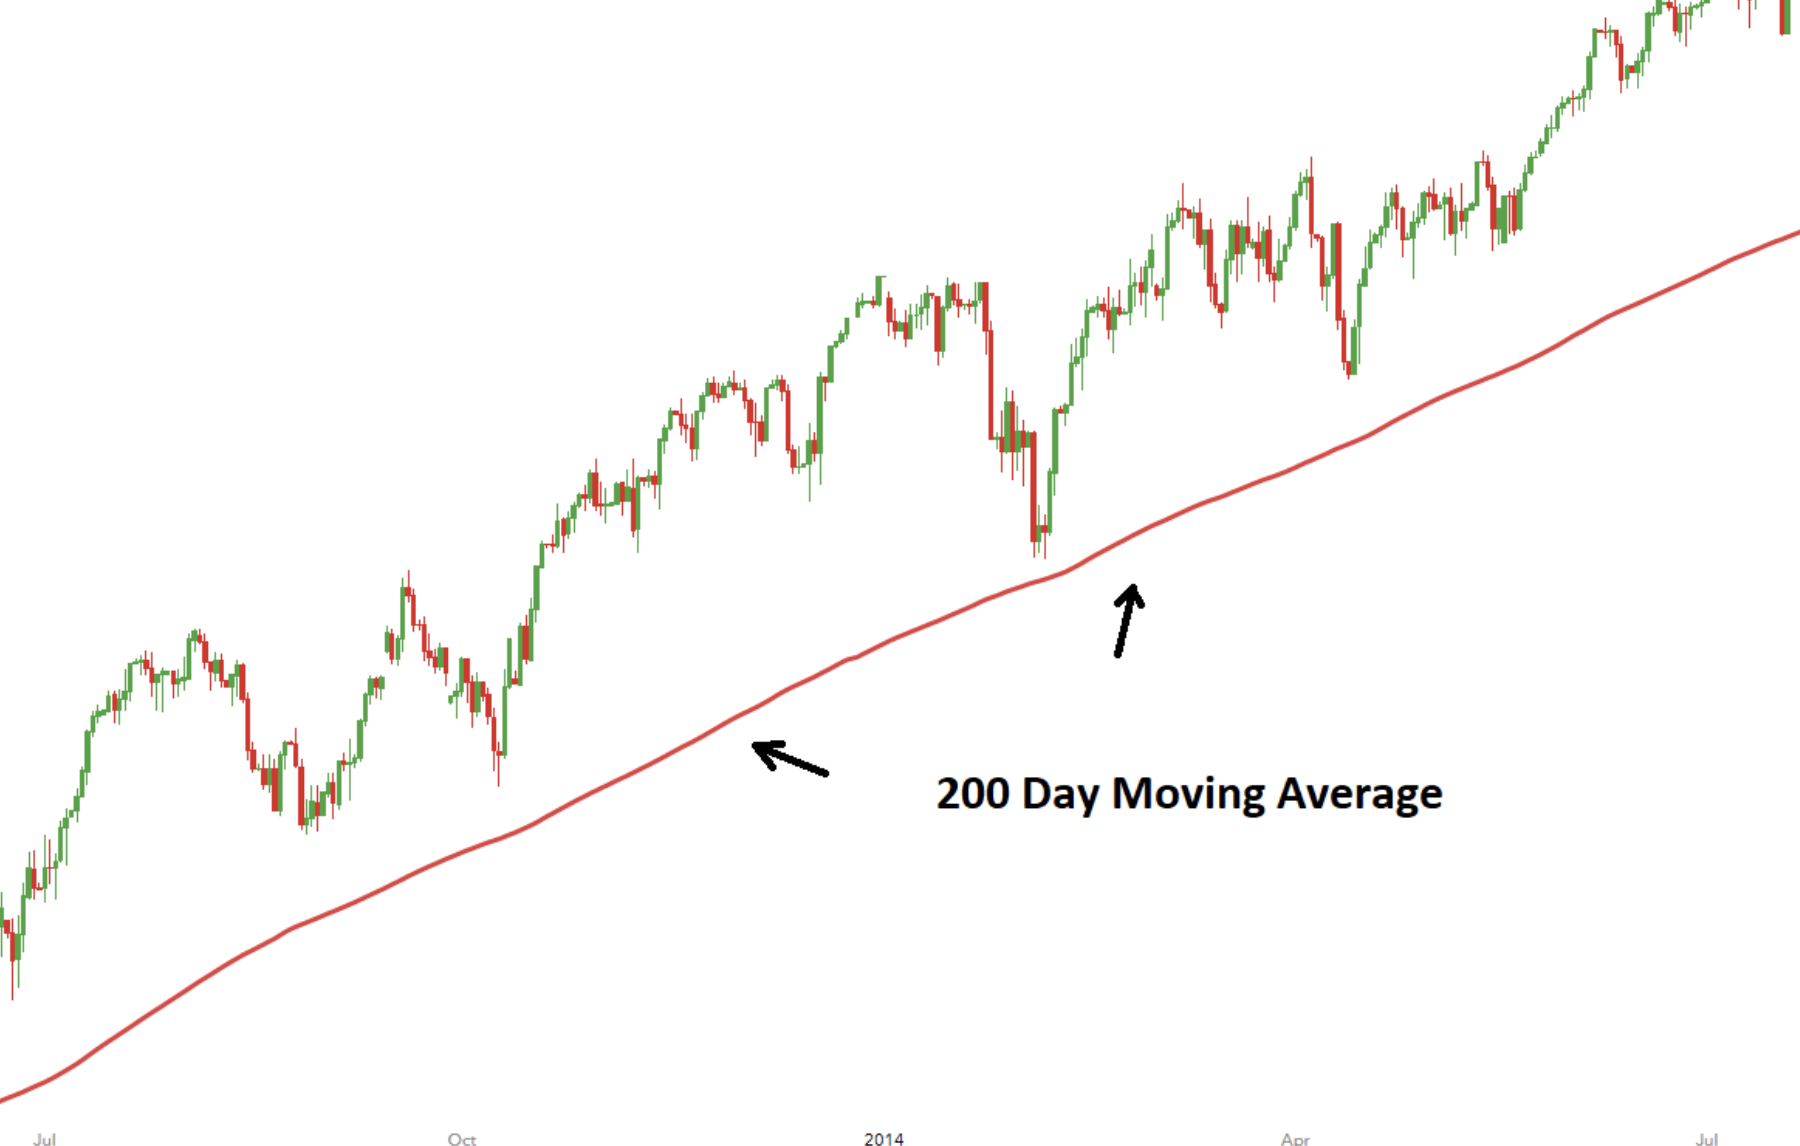![200MA.png]()


In [ ]:
#Install mplfinance package
!pip install mplfinance
#Install twelvedata
!pip install twelvedata

In [ ]:
import pandas as pd, numpy as np, mplfinance as mpf, matplotlib.pyplot as plt

# Data Collected #
> The data collected was from https://twelvedata.com, a historical stock market API.

> We collected the last 5000 30 minute data points of the major indexes such as **SPY**, **IXIC**, and **DIA** which correspond to the S&P500, NASDAQ, and Dow Jones.

>We collected the last 5000 30 minute data pooints of the major companies such as **AAPL**, **TSLA**, **NFLX**, **MSFT**, and **GOOG**.

>For each of the stocks, we also collected their MA10 and MA50 over 30 minutes.

## What are we measuring? ##
We want to see if a stock's chart trend can be determined by the buy and sell signal we determine.

<b>Concept</b>
<ul>

<li>Each data point is <b>30 minutes</b> of data.</li>
<li>Whenever the MA10 <i>crosses above</i> or goes above the MA50, that is a buy signal.</li>
<li>Whenever the MA10 <i>crosses below</i> or goes below the MA50, that is a sell signal.</li>
<li>As soon as the buy signal occurs, it is time to buy until the price (close) closes below the MA50 or the sell signal occurs.</li>
</ul>

## How We collected the Data ##

We used https://twelvedata.com to collect the data of 10 companies, then converted them to CSV files for us to import for later use.

**Why did we choose this measure?**

There is a widely known notion in the market that High Frequency Trading (HFT) occurs in the stock market using algorithmic trading to determine buy and sell signals. However, while the exact algorithm and analysis used remains unknown except by those on Wall Street, many well known prominent figures have expressed that at least for the major market - the crosses of the 10MA and the 50MA that create the "Golden Cross Pattern" alert professionals and HFT computers of the current direction.

*Note that the real **apikey** below has been obfuscated for demonstration purposes.*

In [ ]:
# #DO NOT RUN THIS
# from twelvedata import TDClient
# import pandas as pd

# apikey = "+cca026bd17a6450186ceff39ae4487d3"
# td = TDClient(apikey=apikey)

# tickers = ["SPY", "SPX", "NFLX", "QQQ", "IXIC", "NFLX", "AAPL", "MSFT", "TSLA", "GOOG"]
# for ticker in tickers:
#     ts = td.time_series(
#         symbol=ticker,
#         interval="30min",
#         outputsize=5000,
#         timezone="America/New_York",
#     ).with_ma(time_period=10).with_ma(time_period=50)
#     df = ts.as_pandas()
#     df.rename(columns={"ma1":"MA10", "ma2":"MA50"}).to_csv('{0}_Data.csv'.format(ticker))

<b>Components of the project</b>
<p>Component 1</p>
<ul>
  <li>Group all occurences of when the S&P has a buy and sell signal over all the data, collect those dates.</li>
  <li>Determine if those buy signals predicted gains.</li>
  <li>Determine if those sell signals predicted losses (or gains if shorting the market).</li>
</ul>


<p>Component 2</p>
<ul>
  <li>Determine if longer signals produce more gains.</li>
</ul>

<p>Component 3</p>
<ul>
  <li>Determine if buy and sell signals on the S&P or mother major indexes determine the signals on other stocks.</li>
</ul>

# **Component 1** # (Sidney)
We will be working mostly with **$SPY** data here since the S&P500 determines the movements of most of the markets.

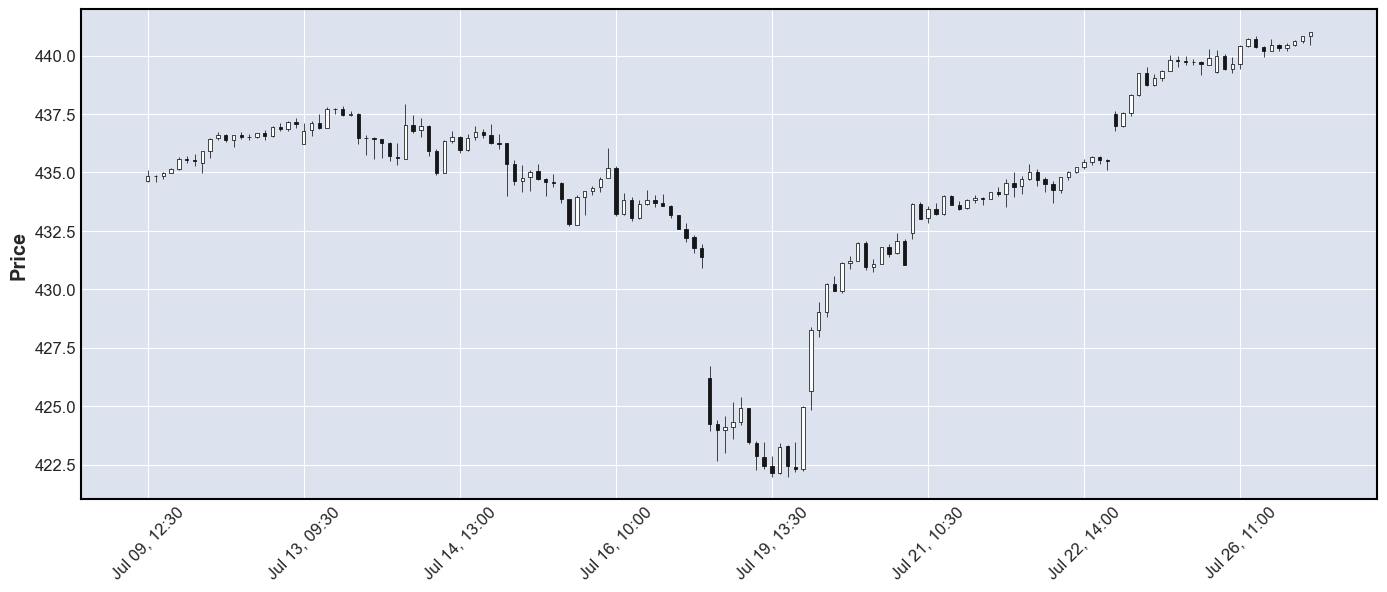

In [ ]:
SPY_DF = pd.read_csv("SPY_Data.csv", index_col=0, parse_dates=True)[::-1]
mpf.plot(SPY_DF[800:950], figsize=(18, 7), type='candle')

In [ ]:
#SPY each timeframe grouped in whether it was in a buy or sell signal
buy_signals = SPY_DF[SPY_DF.MA10 >= SPY_DF.MA50]
sell_signals = SPY_DF[SPY_DF.MA50 >= SPY_DF.MA10]
buy_signals[["close", "MA10"]][::-1].head(10)

close       MA10
datetime                                 
2022-10-21 15:30:00  374.28000  371.68398
2022-10-21 15:00:00  374.64001  370.93438
2022-10-21 14:30:00  372.89999  370.20538
2022-10-21 14:00:00  372.60999  369.82338
2022-10-21 13:30:00  372.60001  369.10438
2022-10-20 14:00:00  364.76001  368.78292
2022-10-20 13:30:00  366.10999  369.16192
2022-10-20 13:00:00  367.14001  369.32392
2022-10-20 12:30:00  367.93900  369.32892
2022-10-20 12:00:00  368.17001  369.34702

> We make note that we can see the MA10 is above the MA50, and as the day goes on, the price of the stock keeps going higher.

> Next, we want to group all buy and sell signals into a single array, so if a buy signal occurs for 15 timeframes we want to know all the points associated in that timeframe before a sell signal occurs.

In [ ]:
buy_sig_closes = []
sell_sig_closes = []

sig = 0
signal_data = []
for index, row in SPY_DF.iterrows():
    new_sig = (1 if row.MA10 >= row.MA50 else 0)
    if new_sig != sig and len(signal_data) > 0:
        if sig == 0:
            sell_sig_closes.append(signal_data)
        elif sig == 1:
            buy_sig_closes.append(signal_data)
        signal_data = []
        sig = new_sig
    signal_data.append(row.close)


In [ ]:
print(len(buy_sig_closes), len(sell_sig_closes))

68 69


> For SPY, over the last 5000 dataframes we have an even amount of buy and sell signals. Now let's go through each of the grouped signals and determine if they predicted gains, from the lowest price to the highest price of that signal's length.

> Our data is organized as a tuple, (if the signal worked and predicted moves of at least $1, the percentage of the max move in the signal, and the timeframes the signal lasted)

> The reason we want to check if the minimum and maximum price moved at least $1 is to accomodate for false signals.

In [ ]:
gains_on_buy_sig = [((max(x) - min(x)) > 5, ((max(x)/min(x)-1)*100), len(x)) for x in buy_sig_closes]
gains_on_sell_sig = [((max(x) - min(x)) >= 5, (1-(min(x)/max(x)))*100, len(x)) for x in sell_sig_closes]
gains_on_buy_sig[:10]

[(True, 1.6336741500821983, 69),
 (False, 1.192210567210572, 16),
 (False, 0.8633214254212485, 68),
 (True, 1.2648569633710194, 9),
 (False, 0.5364160048116906, 5),
 (True, 2.5980283453192143, 30),
 (True, 1.271903945048214, 35),
 (True, 1.5461767807801285, 90),
 (False, 0.30873865316602966, 10),
 (False, 1.0302121622577154, 110)]

**Let's measure each signal in different ways.**


*   Let's group the signals if and only if it's minimum and maximum close is more than **1%**.
*   Let's group the signals if and only if it's minimum and maximum close is more than **$1**.



In [ ]:
#Group by 1%
gains_on_buy_sig_1p = [(((max(x)/min(x)-1)*100) >= 1, ((max(x)/min(x)-1)*100), len(x)) for x in buy_sig_closes]
gains_on_sell_sig_1p = [(((max(x)/min(x)-1)*100) >= 1, (1-(min(x)/max(x)))*100, len(x)) for x in sell_sig_closes]

#Group by $1
gains_on_buy_sig_1d = [((max(x)-min(x)) >= 1, ((max(x)/min(x)-1)*100), len(x)) for x in buy_sig_closes]
gains_on_sell_sig_1d = [((max(x)-min(x)) >= 1, (1-(min(x)/max(x)))*100, len(x)) for x in sell_sig_closes]

In [ ]:
#Create DF for each one
gainsBuySigDf_1p = pd.DataFrame(gains_on_buy_sig_1p, columns=["Signal Worked", "Gains", "Length of Signal"])
gainsSellSigDf_1p = pd.DataFrame(gains_on_sell_sig_1p, columns=["Signal Worked", "Gains", "Length of Signal"])
gainsBuySigDf_1d = pd.DataFrame(gains_on_buy_sig_1d, columns=["Signal Worked", "Gains", "Length of Signal"])
gainsSellSigDf_1d = pd.DataFrame(gains_on_sell_sig_1d, columns=["Signal Worked", "Gains", "Length of Signal"])
gainsSellSigDf_1p

Signal Worked     Gains  Length of Signal
0           False  0.000000                 1
1            True  1.064374                26
2           False  0.457650                 4
3           False  0.671843                10
4            True  1.300441                21
..            ...       ...               ...
64           True  4.141604                60
65           True  2.324437                29
66           True  3.956776                60
67           True  2.238503                 3
68           True  1.629205                11

[69 rows x 3 columns]

In [ ]:
gainsSellSigDf_1d

Signal Worked     Gains  Length of Signal
0           False  0.000000                 1
1            True  1.064374                26
2            True  0.457650                 4
3            True  0.671843                10
4            True  1.300441                21
..            ...       ...               ...
64           True  4.141604                60
65           True  2.324437                29
66           True  3.956776                60
67           True  2.238503                 3
68           True  1.629205                11

[69 rows x 3 columns]

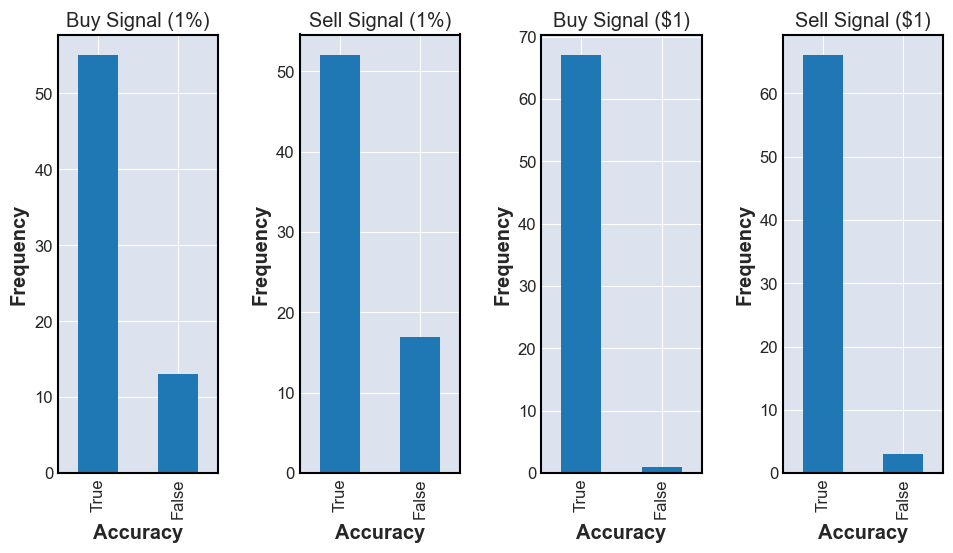

In [ ]:
fig, axs = plt.subplots(1,4)
a1 = gainsBuySigDf_1p["Signal Worked"].value_counts().plot.bar(ax=axs[0], title="Buy Signal (1%)", xlabel="Accuracy", ylabel="Frequency", figsize=(10, 6))
a2 = gainsSellSigDf_1p["Signal Worked"].value_counts().plot.bar(ax=axs[1], title="Sell Signal (1%)", xlabel="Accuracy", ylabel="Frequency")

a3 = gainsBuySigDf_1d["Signal Worked"].value_counts().plot.bar(ax=axs[2], title="Buy Signal ($1)", xlabel="Accuracy", ylabel="Frequency")
a4 = gainsSellSigDf_1d["Signal Worked"].value_counts().plot.bar(ax=axs[3], title="Sell Signal ($1)", xlabel="Accuracy", ylabel="Frequency")
fig.tight_layout(pad=2)



> This tells us that measuring the buy and sell signal in this way does indeed yield gains, however, only counting the accuracy of the signal based on if the signal yielded a 1% or more gain seems to be a more accurate measure.

# **Component 2** # (Sidney)

## Measuring if Length of Signal contributes to gain potential ##

<AxesSubplot:title={'center':'Gains on Sell Signal ($1)'}, xlabel='Length of Signal', ylabel='Gains'>

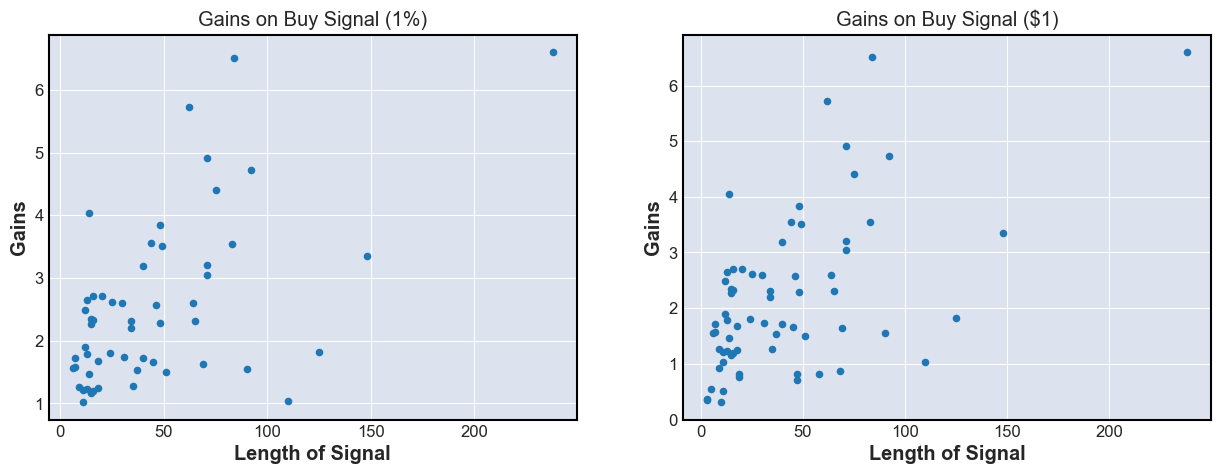

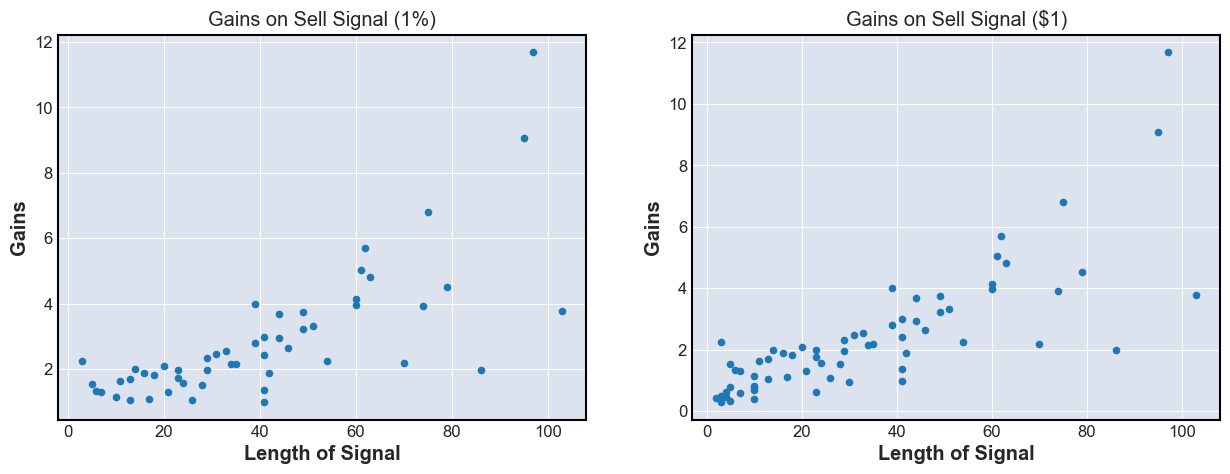

In [ ]:
fig, axs = plt.subplots(1,2)
gainsBuySigDf_1p[gainsBuySigDf_1p["Signal Worked"] == True].plot.scatter(ax=axs[0], figsize=(15, 5), x='Length of Signal', y='Gains', title="Gains on Buy Signal (1%)")
gainsBuySigDf_1d[gainsBuySigDf_1d["Signal Worked"] == True].plot.scatter(ax=axs[1], figsize=(15, 5), x='Length of Signal', y='Gains', title="Gains on Buy Signal ($1)")

fig, axs = plt.subplots(1,2)
gainsSellSigDf_1p[gainsSellSigDf_1p["Signal Worked"] == True].plot.scatter(ax=axs[0], figsize=(15, 5), x='Length of Signal', y='Gains', title="Gains on Sell Signal (1%)")
gainsSellSigDf_1d[gainsSellSigDf_1d["Signal Worked"] == True].plot.scatter(ax=axs[1], figsize=(15, 5), x='Length of Signal', y='Gains', title="Gains on Sell Signal ($1)")

As we can see, with the buy signal, especially over the past year (the bear market), positive buy gains have been quick and short, but sell gains have been more linear.

### Here is something we tried and didn't work. ###
> We wanted to model if we could see noticable similarities in the SPY chart compared to te AAPL and MSFT chart.

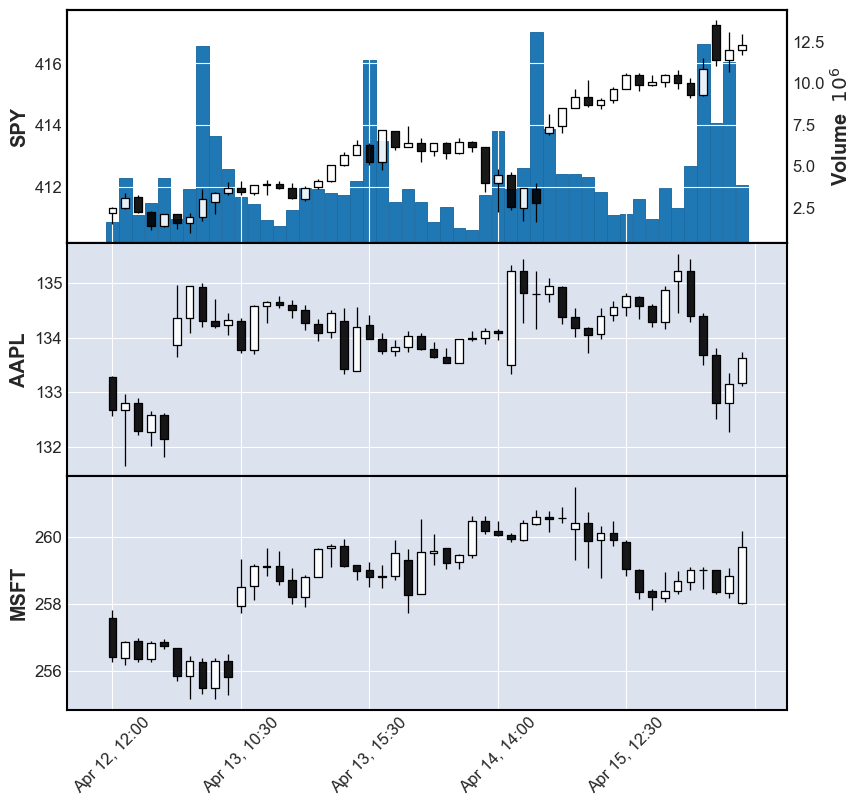

In [ ]:
df = pd.read_csv("SPY_Data.csv", index_col=0, parse_dates=True)[::-1]
df1 = pd.read_csv("AAPL_Data.csv", index_col=0, parse_dates=True)[::-1]
df2 = pd.read_csv("MSFT_Data.csv", index_col=0, parse_dates=True)[::-1]
fig, axs = mpf.plot(df[:50], type='candle', figsize=(10,10), volume=True, volume_panel=0, ylabel="SPY", returnfig=True, panel_ratios=(3, 3, 3), 
                    addplot=[mpf.make_addplot(df1[:50],panel=1, type='candle', ylabel="AAPL"), 
                             mpf.make_addplot(df2[:50],panel=2, type='candle', ylabel="MSFT")])

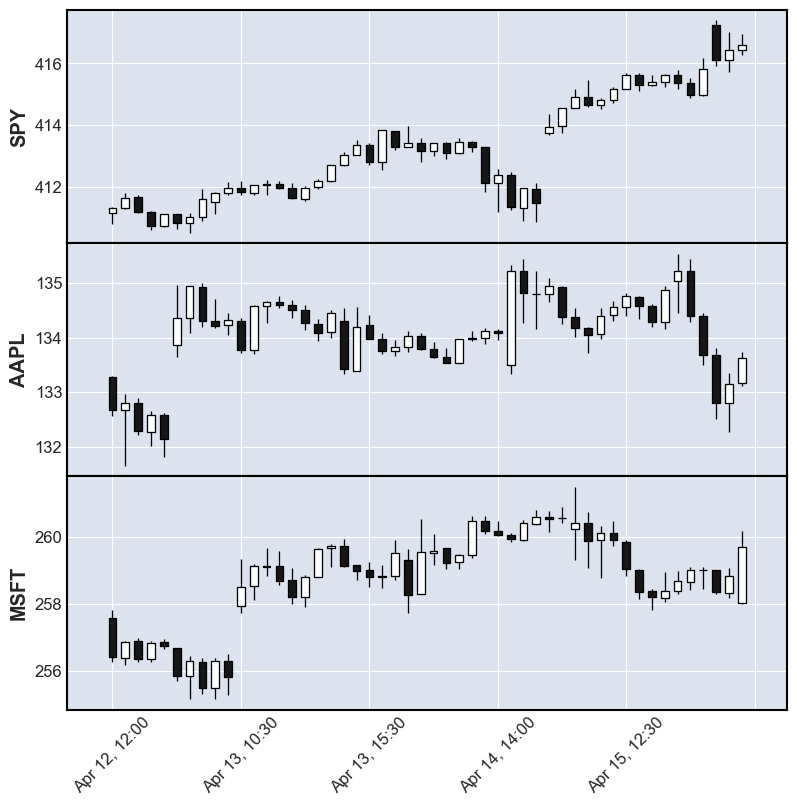

In [ ]:
fig, axs = mpf.plot(df[:50], type='candle', figsize=(10,10), ylabel="SPY", returnfig=True, panel_ratios=(3, 3, 3), 
                    addplot=[mpf.make_addplot(df1[:50],panel=1, type='candle', ylabel="AAPL"), 
                             mpf.make_addplot(df2[:50],panel=2, type='candle', ylabel="MSFT")])

# **Component 3** #

## Moving Averages (Roshan)

In [ ]:
#Sort by most recent
SPY = pd.read_csv("SPX_Data.csv")[::-1]
SPY.index = pd.DatetimeIndex(SPY['datetime'])

goog = pd.read_csv("GOOG_Data.csv")[::-1]
goog.index = pd.DatetimeIndex(goog['datetime'])

appl = pd.read_csv("AAPL_Data.csv")[::-1]
appl.index = pd.DatetimeIndex(appl['datetime'])

amzn = pd.read_csv("AMZN_Data.csv")[::-1]
amzn.index = pd.DatetimeIndex(amzn['datetime'])

ixic = pd.read_csv("IXIC_Data.csv")[::-1]
ixic.index = pd.DatetimeIndex(ixic['datetime'])

nflx = pd.read_csv("NFLX_Data.csv")[::-1]
nflx.index = pd.DatetimeIndex(nflx['datetime'])

msft = pd.read_csv("MSFT_Data.csv")[::-1]
msft.index = pd.DatetimeIndex(msft['datetime'])

qqq = pd.read_csv("QQQ_Data.csv")[::-1]
qqq.index = pd.DatetimeIndex(qqq['datetime'])

tsla = pd.read_csv("TSLA_Data.csv")[::-1]
tsla.index = pd.DatetimeIndex(tsla['datetime'])

(<Figure size 1200x1200 with 8 Axes>,
 [<Axes:ylabel='SPY'>,
  <Axes:>,
  <Axes:ylabel='GOOG'>,
  <Axes:>,
  <Axes:ylabel='APPL'>,
  <Axes:>,
  <Axes:ylabel='AMZN'>,
  <Axes:>])

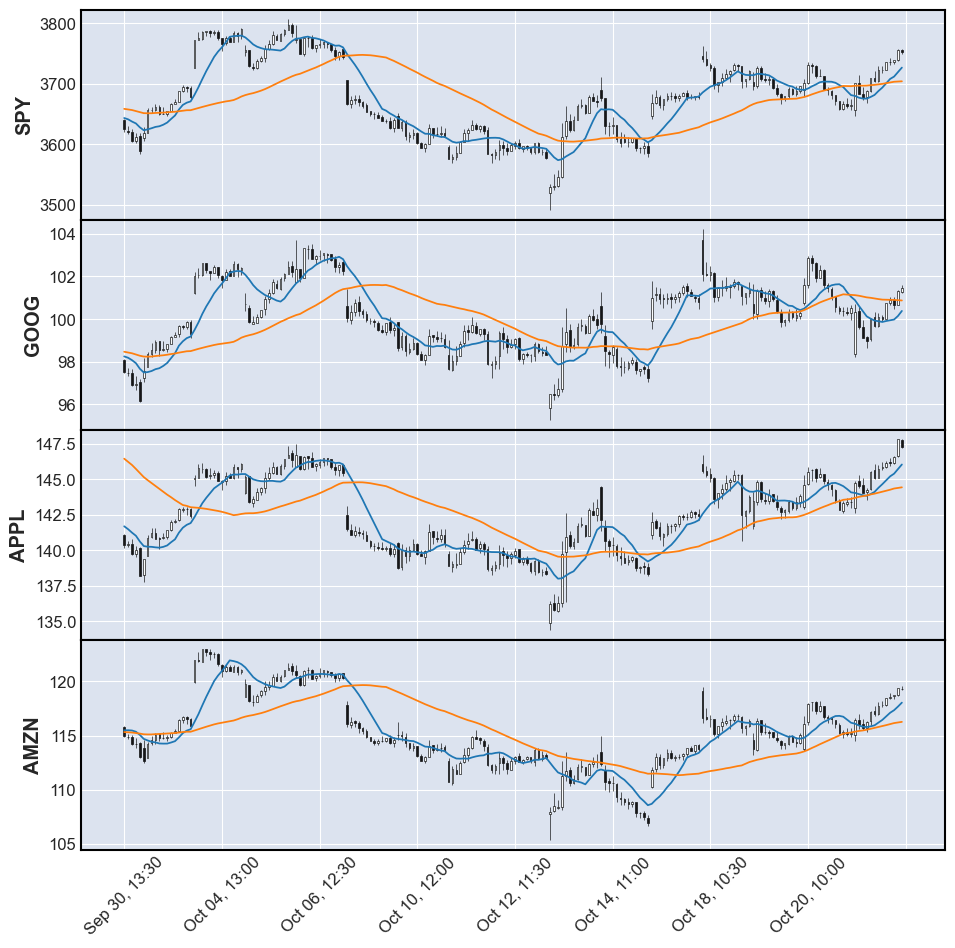

In [ ]:
iday = SPY.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]
iday_goog = goog.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]
iday_aapl = appl.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]
iday_amzn = amzn.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]

mpf.plot(iday, type='candle', figsize=(12,12), ylabel="SPY", returnfig=True, panel_ratios=(4, 4, 4, 4), 
                    addplot=[mpf.make_addplot(iday_goog,panel=1, type='candle', ylabel="GOOG"), 
                             mpf.make_addplot(iday_aapl,panel=2, type='candle', ylabel="APPL"),
                             mpf.make_addplot(iday_amzn,panel=3, type='candle', ylabel="AMZN"),
                             mpf.make_addplot(iday[['MA10','MA50']], panel= 0),
                             mpf.make_addplot(iday_goog[['MA10','MA50']], panel= 1),
                             mpf.make_addplot(iday_aapl[['MA10','MA50']], panel= 2),
                             mpf.make_addplot(iday_amzn[['MA10','MA50']], panel=3)])

(<Figure size 1200x1200 with 10 Axes>,
 [<Axes:ylabel='IXIC'>,
  <Axes:>,
  <Axes:ylabel='MSFT'>,
  <Axes:>,
  <Axes:ylabel='QQQ'>,
  <Axes:>,
  <Axes:ylabel='NFLX'>,
  <Axes:>,
  <Axes:ylabel='TSLA'>,
  <Axes:>])

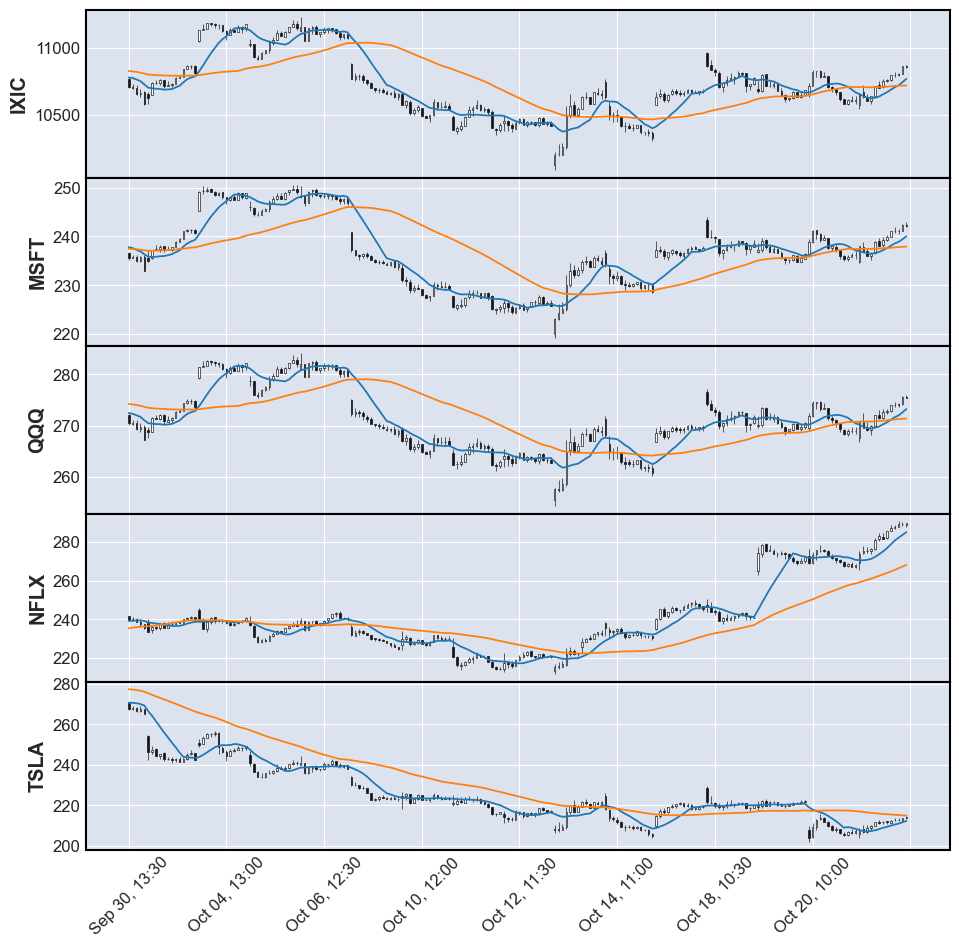

In [ ]:
iday_ixic = ixic.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]
iday_msft = msft.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]
iday_qqq = qqq.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]
iday_nflx = nflx.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]
iday_tsla = tsla.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]

mpf.plot(iday_ixic, type='candle', figsize=(12,12), ylabel="IXIC", returnfig=True, panel_ratios=(5, 5, 5, 5, 5), 
                    addplot=[mpf.make_addplot(iday_msft,panel=1, type='candle', ylabel="MSFT"), 
                             mpf.make_addplot(iday_qqq,panel=2, type='candle', ylabel="QQQ"),
                             mpf.make_addplot(iday_nflx,panel=3, type='candle', ylabel="NFLX"),
                             mpf.make_addplot(iday_tsla,panel=4, type='candle', ylabel="TSLA"),
                             mpf.make_addplot(iday_ixic[['MA10','MA50']], panel= 0),
                             mpf.make_addplot(iday_msft[['MA10','MA50']], panel= 1),
                             mpf.make_addplot(iday_qqq[['MA10','MA50']], panel= 2),
                             mpf.make_addplot(iday_nflx[['MA10','MA50']], panel=3),
                             mpf.make_addplot(iday_tsla[['MA10','MA50']], panel=4)])

In [ ]:
weights_of_SPX = pd.read_csv('SPX_Weights.csv')
weights_of_SPX
### To remove for part 3

Symbol   Weight
0     AAPL  7.02554
1     MSFT  5.71218
2     AMZN  3.31304
3    GOOGL  1.94415
4     TSLA  1.79061
..     ...      ...
498    FOX  0.01304
499     RL  0.01249
500   DISH  0.01117
501    VNO  0.01111
502    NWS  0.00672

[503 rows x 2 columns]

# Linear Regression (Jake)

Here, we decided to run a linear regression analysis, comparing the stock price data of all other companies with the S&P 500. The purpose of this was to see if we can determine a sort of linear relationship between the trend behavior of companies with large industry influence, and the overall behavior of the S&P 500.

In [ ]:
#Import libraries
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Read raw datasets
apple = pd.read_csv('AAPL_Data.csv')
amazon = pd.read_csv('AMZN_Data.csv')
google = pd.read_csv('GOOG_Data.csv')
nasdaq = pd.read_csv('IXIC_Data.csv')
netflix = pd.read_csv('NFLX_Data.csv')
msoft = pd.read_csv('MSFT_Data.csv')
qqq = pd.read_csv('QQQ_Data.csv')
snp = pd.read_csv('SPY_Data.csv')
tesla = pd.read_csv('TSLA_Data.csv')

In [ ]:
#Narrow datasets
apple.rename(columns = {'close':'AAPLclose'}, inplace = True)
amazon.rename(columns = {'close':'AMZNclose'}, inplace = True)
google.rename(columns = {'close':'GOOGclose'}, inplace = True)
nasdaq.rename(columns = {'close':'IXICclose'}, inplace = True)
netflix.rename(columns = {'close':'NFLXclose'}, inplace = True)
msoft.rename(columns = {'close':'MSFTclose'}, inplace = True)
qqq.rename(columns = {'close':'QQQclose'}, inplace = True)
snp.rename(columns = {'close':'SPYclose'}, inplace = True)
tesla.rename(columns = {'close':'TSLAclose'}, inplace = True)

aapl = apple[['datetime','AAPLclose']]
amzn = amazon[['datetime','AMZNclose']]
goog = google[['datetime','GOOGclose']]
ixic = nasdaq[['datetime','IXICclose']]
nflx = netflix[['datetime','NFLXclose']]
msft = msoft[['datetime','MSFTclose']]
qqq = qqq[['datetime','QQQclose']]
spy = snp[['datetime','SPYclose']]
tsla = tesla[['datetime','TSLAclose']]

#Merge all on datetime
result = pd.merge(aapl, amzn, on = 'datetime')
result = pd.merge(result, goog, on = 'datetime')
result = pd.merge(result, ixic, on = 'datetime')
result = pd.merge(result, nflx, on = 'datetime')
result = pd.merge(result, msft, on = 'datetime')
result = pd.merge(result, qqq, on = 'datetime')
result = pd.merge(result, spy, on = 'datetime')
result = pd.merge(result, tsla, on = 'datetime')
result

datetime  AAPLclose   AMZNclose   GOOGclose    IXICclose  \
0     2022-10-21 15:30:00  147.27000   119.32000   101.48000  10859.95996   
1     2022-10-21 15:00:00  147.83000   119.37000   101.31000  10862.30762   
2     2022-10-21 14:30:00  146.61000   118.72000   100.68000  10807.11719   
3     2022-10-21 14:00:00  146.14000   118.60000   100.88000  10799.58984   
4     2022-10-21 13:30:00  146.17999   118.43000   100.74000  10800.02344   
...                   ...        ...         ...         ...          ...   
4922  2021-04-15 11:30:00  134.31190  3360.27319  2279.90576  13994.39355   
4923  2021-04-15 11:00:00  134.21500  3364.26782  2285.91992  13993.19141   
4924  2021-04-15 10:30:00  134.30000  3368.14990  2284.27002  14011.11328   
4925  2021-04-15 10:00:00  134.93500  3383.00000  2278.67993  14011.80664   
4926  2021-04-15 09:30:00  134.35989  3380.30371  2271.38989  13992.80371   

      NFLXclose  MSFTclose   QQQclose   SPYclose  TSLAclose  
0     289.57001  242.12000  275.48001  374.28000  214.44000  
1     289.07001  242.39000  275.67999  374.64001  213.58000  
2     289.45001  241.10001  274.25000  372.89999  212.66000  
3     287.66000  241.03000  274.07001  372.60999  212.82001  
4     287.22000  241.02000  273.98499  372.60001  212.38000  
...         ...        ...        ...        ...        ...  
4922  549.96997  258.20999  340.24109  414.81812  730.14001  
4923  549.88000  258.67819  340.47501  414.64569  729.53998  
4924  546.88000  259.10999  340.75989  414.91010  737.96503  
4925  546.16748  259.12000  340.91000  414.56000  732.81000  
4926  547.02502  258.51001  340.10999  413.95001  725.65302  

[4927 rows x 10 columns]

> We can see here that by merging the data by datetime, we lose some of the information. Initially each stock held 5000 rows of data, but after merging we are left with only 4927 rows. This could be due to the fact that certain stocks underwent a trading halt, pausing all trades for however long was necessary. The price data would not be included at these times due to the fact that their price was forced to stagnate.


In [ ]:
#Normalize data
norm = abs((result.iloc[:,1:10]-result.iloc[:,1:10].mean())/result.iloc[:,1:10].std())
norm

AAPLclose  AMZNclose  GOOGclose  IXICclose  NFLXclose  MSFTclose  \
0      0.317033   1.664646   2.074332   1.774165   0.763576   1.441029   
1      0.278216   1.664610   2.074503   1.772632   0.766556   1.431501   
2      0.362781   1.665079   2.075136   1.808671   0.764291   1.477023   
3      0.395359   1.665166   2.074935   1.813586   0.774961   1.479494   
4      0.392587   1.665288   2.075076   1.813303   0.777584   1.479847   
...         ...        ...        ...        ...        ...        ...   
4922   1.215223   0.674062   0.114091   0.272606   0.788625   0.873228   
4923   1.221940   0.676945   0.120133   0.271821   0.788089   0.856706   
4924   1.216048   0.679746   0.118475   0.283524   0.770207   0.841468   
4925   1.172033   0.690462   0.112860   0.283976   0.765959   0.841115   
4926   1.211897   0.688516   0.105536   0.271568   0.771071   0.862641   

      QQQclose  SPYclose  TSLAclose  
0     1.758503  1.796018   2.371174  
1     1.753077  1.783544   2.374885  
2     1.791875  1.843835   2.378855  
3     1.796759  1.853884   2.378165  
4     1.799066  1.854229   2.380064  
...        ...       ...        ...  
4922  0.001408  0.391385   0.145822  
4923  0.004939  0.397360   0.148411  
4924  0.012668  0.388198   0.112056  
4925  0.016741  0.400329   0.134301  
4926  0.004965  0.421465   0.165185  

[4927 rows x 9 columns]

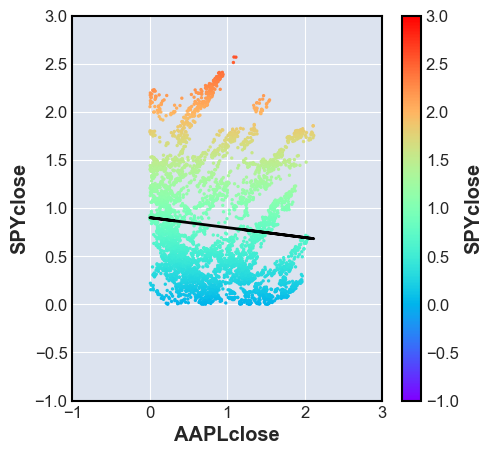

In [ ]:
#Apple
#Find linear regression parameters
lm = LinearRegression().fit(norm[['AAPLclose']], norm.SPYclose)
float(lm.coef_), lm.intercept_

#Plot
ax = norm.plot.scatter(
    x='AAPLclose', y='SPYclose', 
    s=2, c='SPYclose', colormap=plt.cm.rainbow, 
    vmin = -1, vmax = 3, sharex=False, figsize=(5,5)
)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
xdata = norm.AAPLclose
ydata = norm.SPYclose

#Linear Regression line
ax.add_line(matplotlib.lines.Line2D(xdata, ydata = float(lm.coef_)*xdata + lm.intercept_, c = 'black'))

> As we can see from the plot displayed, a linear regression analysis was run comparing Apple stock prices to S&P 500 stock prices. However, as we can see, there isn't much of a relationship to be observed. 

> We can interpret this graph as showing the average linear behavior of each stock over the long term as it relates to the other stock (Apple and S&P500). However, while analyzing the data in this way may tell us if there is some sort of long term correlation between the behavior of the two stocks, it won't tell us if using the behavior of one can predict the behavior of the other, and it cannot help us to beat the market.

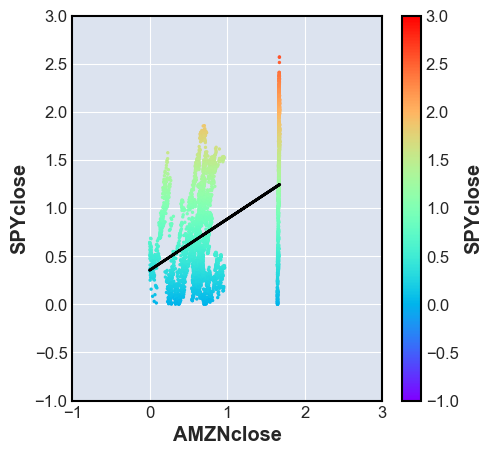

In [ ]:
#Amazon
#Find linear regression parameters
lm = LinearRegression().fit(norm[['AMZNclose']], norm.SPYclose)
float(lm.coef_), lm.intercept_

#Plot
ax = norm.plot.scatter(
    x='AMZNclose', y='SPYclose', 
    s=2, c='SPYclose', colormap=plt.cm.rainbow, 
    vmin = -1, vmax = 3, sharex=False, figsize=(5,5)
)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
xdata = norm.AMZNclose
ydata = norm.SPYclose

#Linear Regression line
ax.add_line(matplotlib.lines.Line2D(xdata, ydata = float(lm.coef_)*xdata + lm.intercept_, c = 'black'))

> This plot also represented a certain lack of relationship between Amazon and the S&P 500. However, what's different about this plot is that it demonstrates a split in the stock price. A split is what happens when a company decides to divide all existing shares by a chosen factor (2 for 1, 3 for 1) in order to lower the price of each share for potential investors. This will cause complications in trend visualization as we observe a rapid decrease in stock price.

> One way to mitigate this kind of visualization would be to limit the observable values to only those during an interval where no split occurred.

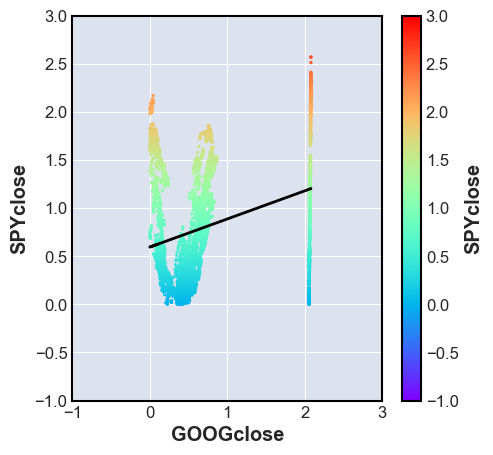

In [ ]:
#Google
#Find linear regression parameters
lm = LinearRegression().fit(norm[['GOOGclose']], norm.SPYclose)
float(lm.coef_), lm.intercept_

#Plot
ax = norm.plot.scatter(
    x='GOOGclose', y='SPYclose', 
    s=2, c='SPYclose', colormap=plt.cm.rainbow, 
    vmin = -1, vmax = 3, sharex=False, figsize=(5,5)
)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
xdata = norm.GOOGclose
ydata = norm.SPYclose

#Liner Regression line
ax.add_line(matplotlib.lines.Line2D(xdata, ydata = float(lm.coef_)*xdata + lm.intercept_, c = 'black'))

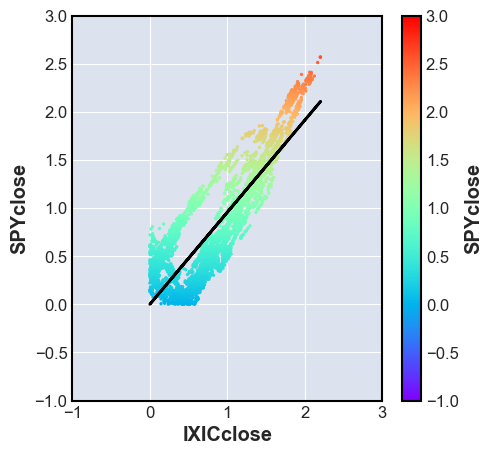

In [ ]:
#Nasdaq
#Find linear regression parameters
lm = LinearRegression().fit(norm[['IXICclose']], norm.SPYclose)
float(lm.coef_), lm.intercept_

#Plot
ax = norm.plot.scatter(
    x='IXICclose', y='SPYclose', 
    s=2, c='SPYclose', colormap=plt.cm.rainbow, 
    vmin = -1, vmax = 3, sharex=False, figsize=(5,5)
)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
xdata = norm.IXICclose
ydata = norm.SPYclose

#Linear Regression line
ax.add_line(matplotlib.lines.Line2D(xdata, ydata = float(lm.coef_)*xdata + lm.intercept_, c = 'black'))

> Certain plots may appear to demonstrate a linear relationship between each of the stock price behaviors. This may be due to the fact that there exists some sort of long term correlation between the behavior of the two stocks (both overall trend upward). However, this sort of conclusion does not provide us with a lot of background information or context about the individual behaviors of each stock or anything about what is happening in the short term.

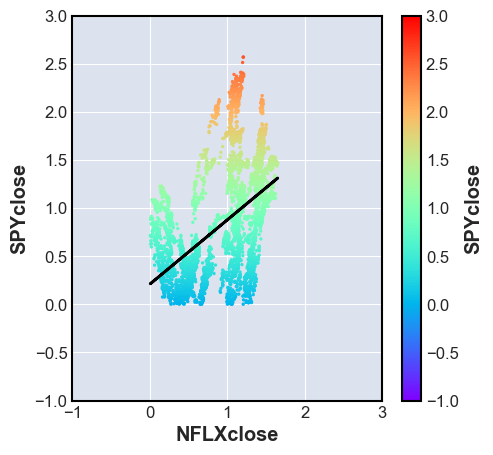

In [ ]:
#Netflix
#Find linear regression parameters
lm = LinearRegression().fit(norm[['NFLXclose']], norm.SPYclose)
float(lm.coef_), lm.intercept_

#Plot
ax = norm.plot.scatter(
    x='NFLXclose', y='SPYclose', 
    s=2, c='SPYclose', colormap=plt.cm.rainbow, 
    vmin = -1, vmax = 3, sharex=False, figsize=(5,5)
)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
xdata = norm.NFLXclose
ydata = norm.SPYclose

#Linear Regression line
ax.add_line(matplotlib.lines.Line2D(xdata, ydata = float(lm.coef_)*xdata + lm.intercept_, c = 'black'))

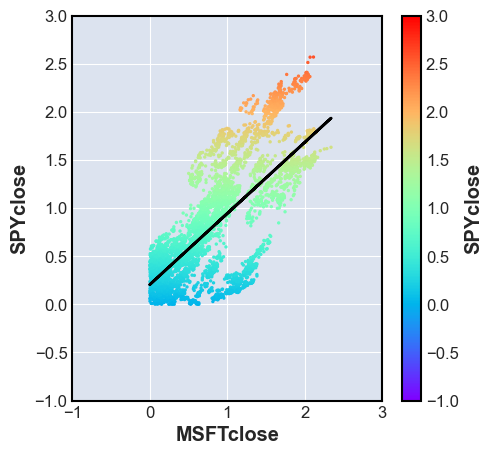

In [ ]:
#Microsoft
#Find linear regression parameters
lm = LinearRegression().fit(norm[['MSFTclose']], norm.SPYclose)
float(lm.coef_), lm.intercept_

#Plot
ax = norm.plot.scatter(
    x='MSFTclose', y='SPYclose', 
    s=2, c='SPYclose', colormap=plt.cm.rainbow, 
    vmin = -1, vmax = 3, sharex=False, figsize=(5,5)
)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
xdata = norm.MSFTclose
ydata = norm.SPYclose

#Linear Regression line
ax.add_line(matplotlib.lines.Line2D(xdata, ydata = float(lm.coef_)*xdata + lm.intercept_, c = 'black'))

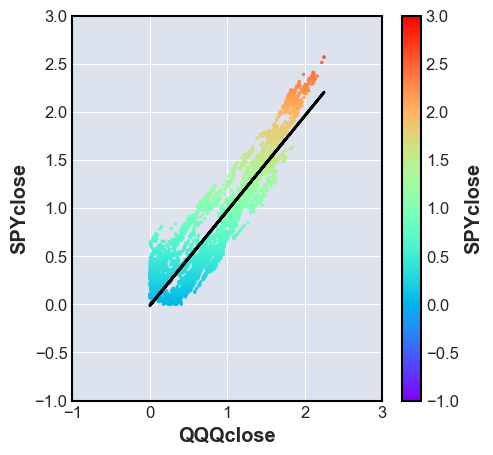

In [ ]:
#Invesco QQQ
#Find linear regression parameters
lm = LinearRegression().fit(norm[['QQQclose']], norm.SPYclose)
float(lm.coef_), lm.intercept_

#Plot
ax = norm.plot.scatter(
    x='QQQclose', y='SPYclose', 
    s=2, c='SPYclose', colormap=plt.cm.rainbow, 
    vmin = -1, vmax = 3, sharex=False, figsize=(5,5)
)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
xdata = norm.QQQclose
ydata = norm.SPYclose

#Linear Regression line
ax.add_line(matplotlib.lines.Line2D(xdata, ydata = float(lm.coef_)*xdata + lm.intercept_, c = 'black'))

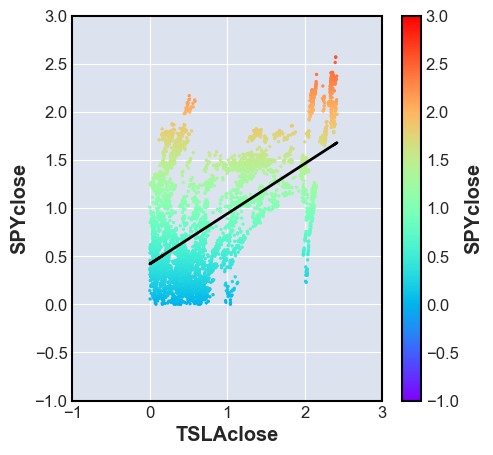

In [ ]:
#Tesla
#Find linear regression parameters
lm = LinearRegression().fit(norm[['TSLAclose']], norm.SPYclose)
float(lm.coef_), lm.intercept_

#Plot
ax = norm.plot.scatter(
    x='TSLAclose', y='SPYclose', 
    s=2, c='SPYclose', colormap=plt.cm.rainbow, 
    vmin = -1, vmax = 3, sharex=False, figsize=(5,5)
)
plt.xlim(-1, 3)
plt.ylim(-1, 3)
xdata = norm.TSLAclose
ydata = norm.SPYclose

#Linear Regression line
ax.add_line(matplotlib.lines.Line2D(xdata, ydata = float(lm.coef_)*xdata + lm.intercept_, c = 'black'))

# Distance Matrix and Clusters (Matt)

In [ ]:
#Narrow datasets
apple.rename(columns = {'close':'AAPLclose'}, inplace = True)
amazon.rename(columns = {'close':'AMZNclose'}, inplace = True)
google.rename(columns = {'close':'GOOGclose'}, inplace = True)
nasdaq.rename(columns = {'close':'IXICclose'}, inplace = True)
netflix.rename(columns = {'close':'NFLXclose'}, inplace = True)
msoft.rename(columns = {'close':'MSFTclose'}, inplace = True)
qqq.rename(columns = {'close':'QQQclose'}, inplace = True)
snp.rename(columns = {'close':'SPYclose'}, inplace = True)
tesla.rename(columns = {'close':'TSLAclose'}, inplace = True)

aapl = apple[['datetime','AAPLclose']]
amzn = amazon[['datetime','AMZNclose']]
goog = google[['datetime','GOOGclose']]
ixic = nasdaq[['datetime','IXICclose']]
nflx = netflix[['datetime','NFLXclose']]
msft = msoft[['datetime','MSFTclose']]
qqq = qqq[['datetime','QQQclose']]
spy = snp[['datetime','SPYclose']]
tsla = tesla[['datetime','TSLAclose']]

#Merge all on datetime
result = pd.merge(aapl, amzn, on = 'datetime')
result = pd.merge(result, goog, on = 'datetime')
result = pd.merge(result, ixic, on = 'datetime')
result = pd.merge(result, nflx, on = 'datetime')
result = pd.merge(result, msft, on = 'datetime')
result = pd.merge(result, qqq, on = 'datetime')
result = pd.merge(result, spy, on = 'datetime')
result = pd.merge(result, tsla, on = 'datetime')
result

datetime  AAPLclose   AMZNclose   GOOGclose    IXICclose  \
0     2022-10-21 15:30:00  147.27000   119.32000   101.48000  10859.95996   
1     2022-10-21 15:00:00  147.83000   119.37000   101.31000  10862.30762   
2     2022-10-21 14:30:00  146.61000   118.72000   100.68000  10807.11719   
3     2022-10-21 14:00:00  146.14000   118.60000   100.88000  10799.58984   
4     2022-10-21 13:30:00  146.17999   118.43000   100.74000  10800.02344   
...                   ...        ...         ...         ...          ...   
4922  2021-04-15 11:30:00  134.31190  3360.27319  2279.90576  13994.39355   
4923  2021-04-15 11:00:00  134.21500  3364.26782  2285.91992  13993.19141   
4924  2021-04-15 10:30:00  134.30000  3368.14990  2284.27002  14011.11328   
4925  2021-04-15 10:00:00  134.93500  3383.00000  2278.67993  14011.80664   
4926  2021-04-15 09:30:00  134.35989  3380.30371  2271.38989  13992.80371   

      NFLXclose  MSFTclose   QQQclose   SPYclose  TSLAclose  
0     289.57001  242.12000  275.48001  374.28000  214.44000  
1     289.07001  242.39000  275.67999  374.64001  213.58000  
2     289.45001  241.10001  274.25000  372.89999  212.66000  
3     287.66000  241.03000  274.07001  372.60999  212.82001  
4     287.22000  241.02000  273.98499  372.60001  212.38000  
...         ...        ...        ...        ...        ...  
4922  549.96997  258.20999  340.24109  414.81812  730.14001  
4923  549.88000  258.67819  340.47501  414.64569  729.53998  
4924  546.88000  259.10999  340.75989  414.91010  737.96503  
4925  546.16748  259.12000  340.91000  414.56000  732.81000  
4926  547.02502  258.51001  340.10999  413.95001  725.65302  

[4927 rows x 10 columns]

In [ ]:
# Extract Data From AMZN data - normalize 
result_copy = result.copy()
quant = result_copy.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

norm

AAPLclose  AMZNclose  GOOGclose  IXICclose  NFLXclose  MSFTclose  \
0     -0.317033  -1.664646  -2.074332  -1.774165  -0.763576  -1.441029   
1     -0.278216  -1.664610  -2.074503  -1.772632  -0.766556  -1.431501   
2     -0.362781  -1.665079  -2.075136  -1.808671  -0.764291  -1.477023   
3     -0.395359  -1.665166  -2.074935  -1.813586  -0.774961  -1.479494   
4     -0.392587  -1.665288  -2.075076  -1.813303  -0.777584  -1.479847   
...         ...        ...        ...        ...        ...        ...   
4922  -1.215223   0.674062   0.114091   0.272606   0.788625  -0.873228   
4923  -1.221940   0.676945   0.120133   0.271821   0.788089  -0.856706   
4924  -1.216048   0.679746   0.118475   0.283524   0.770207  -0.841468   
4925  -1.172033   0.690462   0.112860   0.283976   0.765959  -0.841115   
4926  -1.211897   0.688516   0.105536   0.271568   0.771071  -0.862641   

      QQQclose  SPYclose  TSLAclose  
0    -1.758503 -1.796018  -2.371174  
1    -1.753077 -1.783544  -2.374885  
2    -1.791875 -1.843835  -2.378855  
3    -1.796759 -1.853884  -2.378165  
4    -1.799066 -1.854229  -2.380064  
...        ...       ...        ...  
4922 -0.001408 -0.391385  -0.145822  
4923  0.004939 -0.397360  -0.148411  
4924  0.012668 -0.388198  -0.112056  
4925  0.016741 -0.400329  -0.134301  
4926 -0.004965 -0.421465  -0.165185  

[4927 rows x 9 columns]

In [ ]:
# calculate the Euclidean Distance Matrix that will be 
# used to sort in likeness based on datetime
import sklearn.metrics.pairwise
# Calculate the distance matrix - EUCLIDEAN BITCHES
e_mat = sklearn.metrics.pairwise.euclidean_distances(norm)
e_mat = pd.DataFrame(e_mat, index = norm.index, columns = norm.index)
# create a new row in the data frame to sort with
e_mat['mean'] = e_mat.mean()
# add the index back
#e_mat["datetime"] =  norm.datetime
# Finish the Euclidean MUTHAFUCKing matrix
e_mat = e_mat.sort_values(by='mean')
e_mat = e_mat.drop(columns=['mean'])

e_mat

0         1         2         3         4         5         6     \
2388  5.576065  5.564480  5.634589  5.646731  5.648562  5.699965  5.714383   
2387  5.679081  5.667097  5.738568  5.750992  5.752813  5.805026  5.819753   
2390  5.474809  5.463416  5.532511  5.544465  5.546288  5.596902  5.611035   
2397  5.595595  5.582751  5.655819  5.668810  5.670543  5.723127  5.738097   
2386  5.823228  5.810887  5.883634  5.896389  5.898209  5.951205  5.966228   
...        ...       ...       ...       ...       ...       ...       ...   
106   1.217023  1.248084  1.135633  1.107318  1.106683  1.036750  1.007136   
105   1.221658  1.252457  1.140296  1.112130  1.111456  1.041393  1.011768   
88    1.416709  1.449395  1.332292  1.302514  1.302106  1.231380  1.204592   
89    1.495913  1.528477  1.411008  1.381428  1.381022  1.309837  1.283415   
90    1.503005  1.535041  1.418182  1.389245  1.388779  1.317050  1.290023   

          7         8         9     ...      4917      4918      4919  \
2388  5.776371  5.748240  5.856930  ...  2.370351  2.368684  2.365285   
2387  5.882737  5.854078  5.964439  ...  2.439462  2.437816  2.434589   
2390  5.672167  5.644332  5.751642  ...  2.359621  2.357855  2.354375   
2397  5.801963  5.772542  5.884498  ...  2.503453  2.501335  2.495974   
2386  6.030160  6.001116  6.113052  ...  2.504021  2.502459  2.499789   
...        ...       ...       ...  ...       ...       ...       ...   
106   0.921290  0.962229  0.804581  ...  5.942298  5.941495  5.927362   
105   0.925969  0.966642  0.809108  ...  5.951397  5.950581  5.936441   
88    1.114156  1.157317  0.995513  ...  6.063986  6.063122  6.048865   
89    1.192081  1.235546  1.073151  ...  6.118303  6.117422  6.103258   
90    1.198705  1.242227  1.079461  ...  6.129432  6.128565  6.114556   

          4920      4921      4922      4923      4924      4925      4926  
2388  2.365724  2.413148  2.396602  2.395203  2.367374  2.347098  2.397103  
2387  2.434593  2.483823  2.468481  2.466756  2.438193  2.418141  2.469691  
2390  2.355367  2.400418  2.382441  2.381369  2.354266  2.333845  2.381903  
2397  2.497061  2.546489  2.529718  2.527996  2.501714  2.479219  2.529035  
2386  2.499065  2.550621  2.536669  2.534749  2.505327  2.485634  2.539250  
...        ...       ...       ...       ...       ...       ...       ...  
106   5.940477  5.908563  5.883837  5.889691  5.911267  5.899141  5.863347  
105   5.949563  5.917713  5.892951  5.898794  5.920335  5.908162  5.872428  
88    6.062002  6.028377  6.004648  6.010146  6.032136  6.021179  5.983872  
89    6.116394  6.082306  6.058684  6.064146  6.086246  6.075509  6.037821  
90    6.127673  6.093660  6.069772  6.075366  6.097504  6.086599  6.048997  

[4927 rows x 4927 columns]

In [ ]:
import sklearn.cluster as cluster

intertia = list()

for i in range(1, 52):
    km = cluster.KMeans(n_clusters=i, max_iter = 10, n_init=1)
    km.init = norm.iloc[:i,:]
    km.n_clusters = i
    km.fit(norm)
    intertia.append([i, km.inertia_])

intertia_pd = pd.DataFrame(intertia, columns=["K","Inertia"])
intertia_pd

K       Inertia
0    1  44334.000000
1    2  20952.887414
2    3  14437.926336
3    4  11262.395490
4    5  10802.679089
5    6  10744.126767
6    7  10700.414869
7    8   8739.902984
8    9   8753.779975
9   10   8721.291617
10  11   6185.687655
11  12   6182.046499
12  13   6047.192006
13  14   5390.731021
14  15   6178.962556
15  16   6178.588515
16  17   6178.217577
17  18   6178.424832
18  19   6178.699892
19  20   6177.751001
20  21   3352.589539
21  22   8158.570650
22  23   8705.716702
23  24   6045.459029
24  25   4390.464230
25  26   4021.673333
26  27   5743.991043
27  28   3138.846502
28  29   4055.343709
29  30   4133.691161
30  31   4133.892144
31  32   4133.881796
32  33   4133.879440
33  34   4133.881552
34  35   3707.399449
35  36   2580.933935
36  37   2567.633961
37  38   2686.226379
38  39   2686.221054
39  40   5960.311359
40  41   5903.633348
41  42   2839.030980
42  43   2745.603315
43  44   2841.038025
44  45   2851.123946
45  46   2895.001760
46  47   2895.136842
47  48   2792.216574
48  49   3259.495569
49  50   2808.806369
50  51   2949.350767

In [ ]:
# Now we are going to assign each datetime to a cluster
new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

import sklearn.cluster

km = sklearn.cluster.KMeans(n_clusters=10, max_iter = 10, n_init=1)
km.init=norm.iloc[:10,:]
labels = km.fit_predict(norm)
labels = pd.DataFrame(labels, columns = ['Cluster'], index=norm.index)
labels = labels.sort_values("Cluster", ascending = True)

labels

Cluster
4926        0
3859        0
3860        0
3861        0
3862        0
...       ...
99          9
100         9
101         9
103         9
98          9

[4927 rows x 1 columns]

In [ ]:
# Sort by distance
new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant / quant.mean()) / quant.std()
norm["Cluster"] = labels.Cluster
norm.sort_values(by='Cluster')

# create the clusters and sort them by distance
clusters = norm.Cluster.value_counts().index
counts = norm.Cluster.value_counts().values
new_norm = norm.groupby("Cluster")
md = new_norm.apply(lambda x: sklearn.metrics.pairwise.euclidean_distances(x.iloc[:,:-1]).max())

# Create a dataframe that lists each cluster by size 
df = pd.DataFrame()
df["Cluster"] = clusters
df["Size"] = counts
df = df.sort_values(by="Cluster")

# give each cluster its max distance
df["MaxDistance"] = md

df

Cluster  Size  MaxDistance
1        0  1593     0.018496
0        1  1678     0.020460
9        2    47     0.002837
2        3   759     0.002997
6        4   102     0.014246
7        5    65     0.003366
3        6   359     0.019142
5        7   119     0.003586
4        8   143     0.007413
8        9    62     0.005730

In [ ]:
# crate the x and y data frame for each row of the normalized data
new_result = result.copy()
quant = new_result.iloc[:,2:]
norm = (quant - quant.mean())/quant.std()

import sklearn.decomposition
PCA = sklearn.decomposition.PCA(svd_solver='full')
tablePCA = PCA.fit_transform(norm)
tablePCA = pd.DataFrame(tablePCA, index = norm.index)
tablePCA
Answer5 = pd.DataFrame()
Answer5["DateTime"] = new_result.datetime
Answer5["X"] = tablePCA[0]
Answer5["Y"] = tablePCA[1]
Answer5


DateTime         X         Y
0     2022-10-21 15:30:00  4.777149 -0.713245
1     2022-10-21 15:00:00  4.768547 -0.708217
2     2022-10-21 14:30:00  4.837230 -0.736613
3     2022-10-21 14:00:00  4.849178 -0.733956
4     2022-10-21 13:30:00  4.851784 -0.734236
...                   ...       ...       ...
4922  2021-04-15 11:30:00 -0.151995 -1.202984
4923  2021-04-15 11:00:00 -0.159533 -1.200033
4924  2021-04-15 10:30:00 -0.181039 -1.164614
4925  2021-04-15 10:00:00 -0.172029 -1.181416
4926  2021-04-15 09:30:00 -0.132687 -1.211413

[4927 rows x 3 columns]

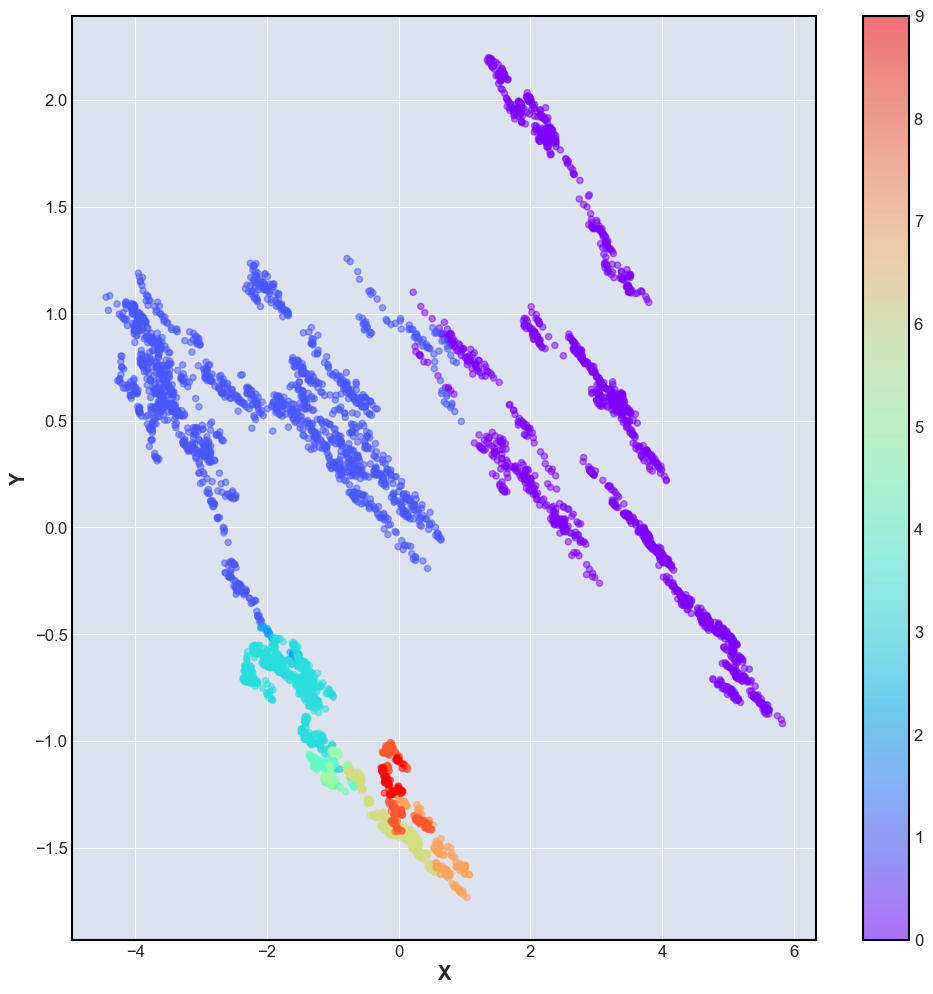

In [ ]:
ax = Answer5.plot.scatter(x="X",y="Y", c=labels.Cluster,colormap = plt.cm.rainbow, 
                          sharex=False, alpha=.5, figsize = (12, 12))

# Plot each x and y of the rows of normalized data based on cluster value

# MPLFinance Visualization and Comparison (Gurleen)

In [ ]:
import pandas as pd, numpy as np, mplfinance as mpf

Import the csv files for SPY and various tech stocks (and reverse the order from oldest to most recent points).

In [ ]:
SPY_Data = pd.read_csv("SPX_Data.csv")[::-1]
SPY_Data.index = pd.DatetimeIndex(SPY_Data['datetime'])

appl = pd.read_csv("AAPL_Data.csv")[::-1]
appl.index = pd.DatetimeIndex(appl['datetime'])

amzn = pd.read_csv("AMZN_Data.csv")[::-1]
amzn.index = pd.DatetimeIndex(amzn['datetime'])

goog = pd.read_csv("GOOG_Data.csv")[::-1]
goog.index = pd.DatetimeIndex(goog['datetime'])

ixic = pd.read_csv("IXIC_Data.csv")[::-1]
ixic.index = pd.DatetimeIndex(ixic['datetime'])

msft = pd.read_csv("MSFT_Data.csv")[::-1]
msft.index = pd.DatetimeIndex(msft['datetime'])

nflx = pd.read_csv("NFLX_Data.csv")[::-1]
nflx.index = pd.DatetimeIndex(nflx['datetime'])

qqq = pd.read_csv("QQQ_Data.csv")[::-1]
qqq.index = pd.DatetimeIndex(qqq['datetime'])

tsla = pd.read_csv("TSLA_Data.csv")[::-1]
tsla.index = pd.DatetimeIndex(tsla['datetime'])

Try various different plot types available from the mplfinance package to see how the data looks.

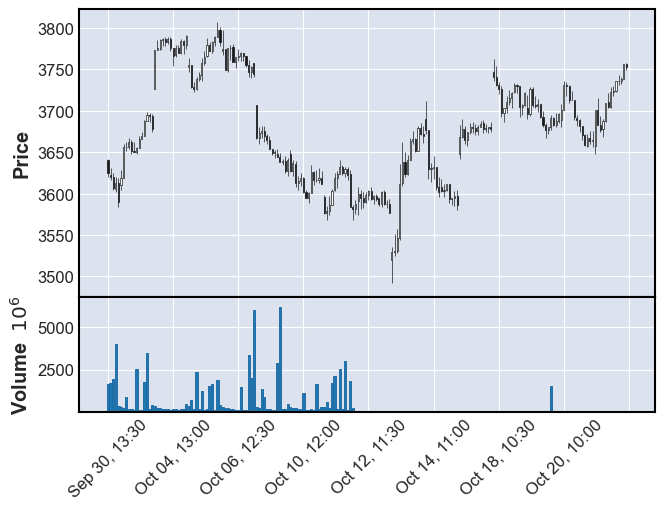

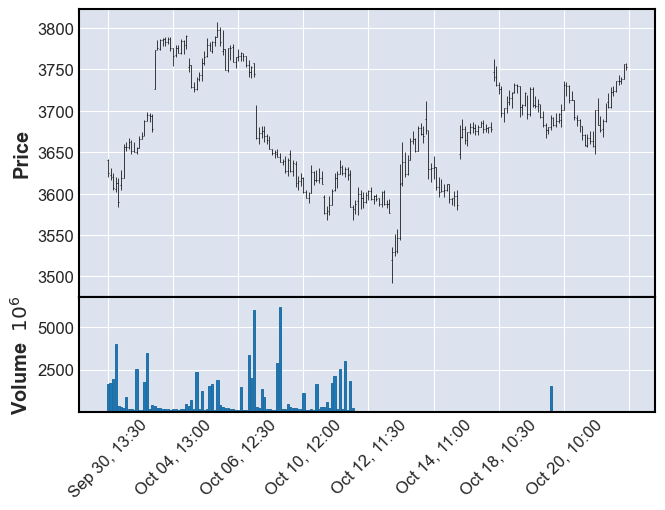

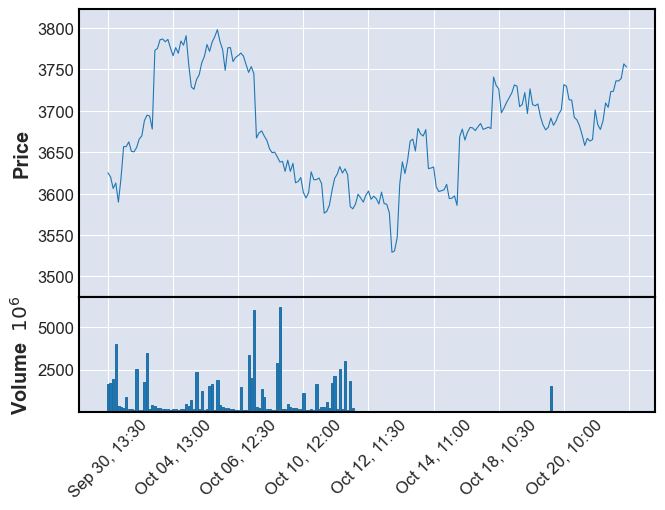

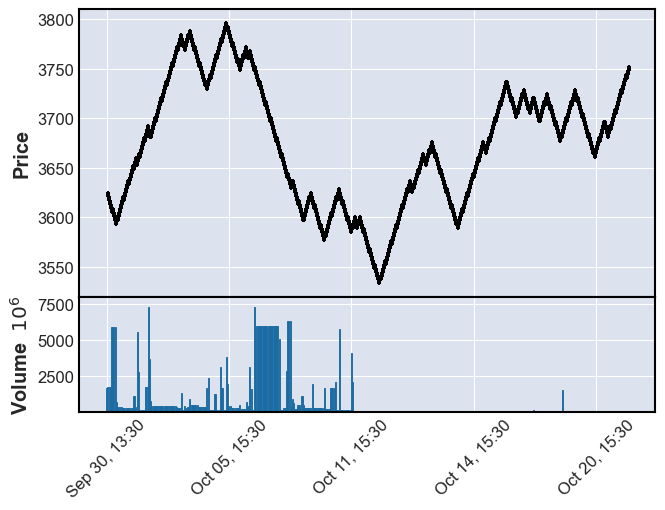

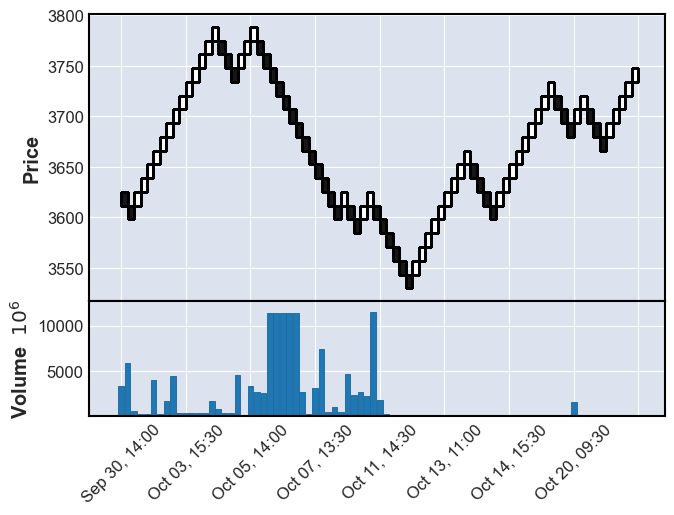

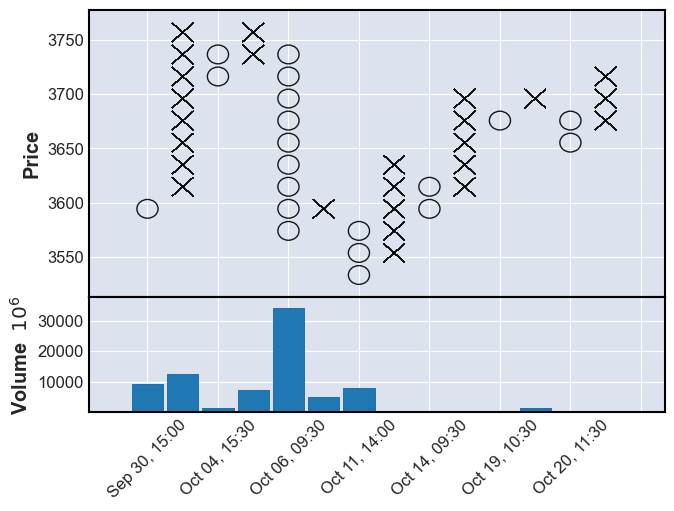

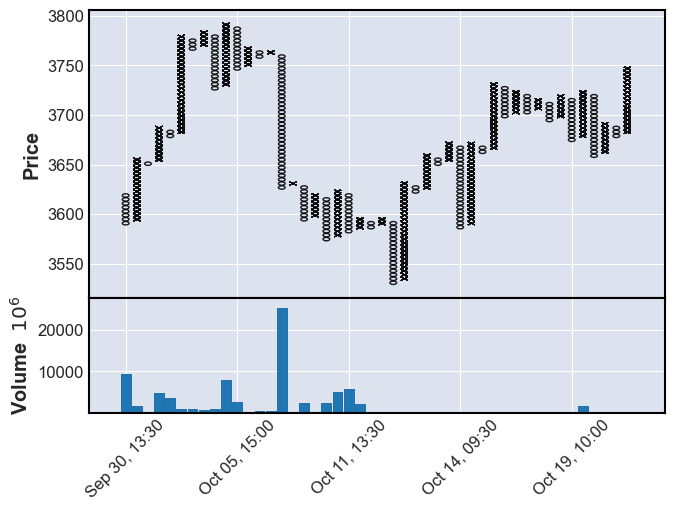

In [ ]:
# SPY Data for October 2022
iday1 = SPY_Data.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]

# Candlestick
mpf.plot(iday1, type='candle',volume=True)

# Open High Low Close (OHLC)
mpf.plot(iday1, type = 'ohlc',volume=True)

# Line
mpf.plot(iday1, type = 'line',volume=True)

# Renko
mpf.plot(iday1, type='renko',renko_params=dict(brick_size=4), volume=True)
mpf.plot(iday1, type='renko',renko_params=dict(brick_size='atr', atr_length=2), volume=True)

# Point & Figure (P&F)
mpf.plot(iday1, type = 'pnf',volume=True)
mpf.plot(iday1, type = 'pnf',pnf_params=dict(box_size=4),volume=True)

Here we can see that the Candlestick and OHLC plots show us essentially the same information, which is the ohlc data and the gaps between trading. The Line plot eliminates the gaps where there is no trading, which implies that there is a large rise or drop in the price and may be a bit misleading if it is not made clear that this happens between trading. The price-movement Renko and P&F plots do not account for time intervals, and filter out minor changes in price to better visualize trends. The first Renko plot's brick size is fixed, whereas the second plot's brick size is based on the ATR, a measure of volatility that fluctuates over time. The smaller brick size clearly shows more price variation. The volume measure is inconsistent, which may indicate that the data doesn't account for the volume for all the data points or that the volume is outside of the range of the plot.

Try different dates and interval lengths.

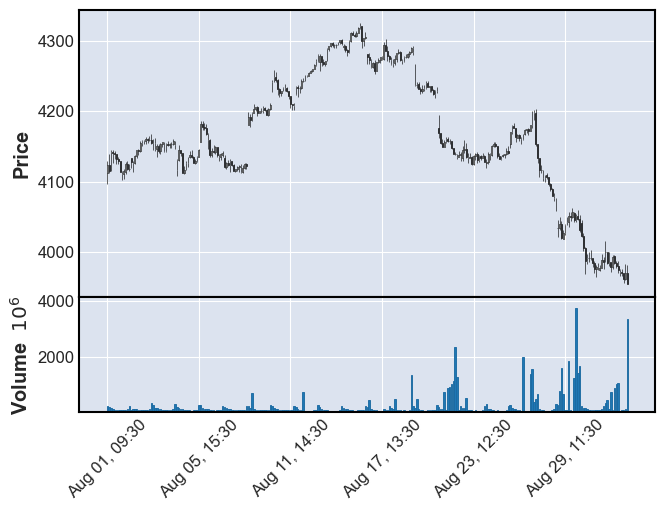

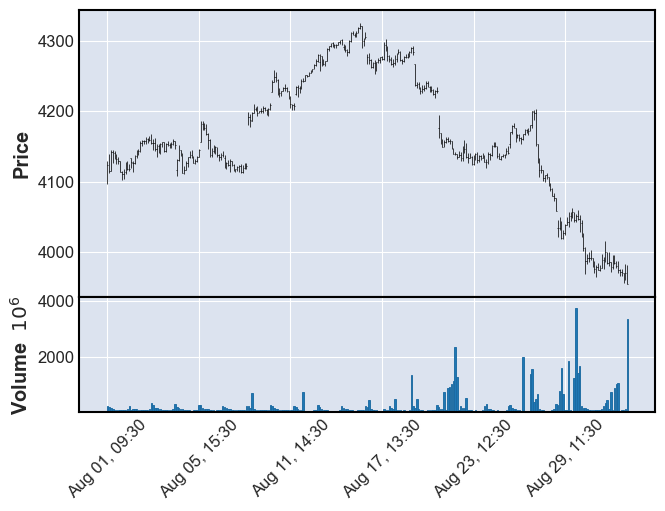

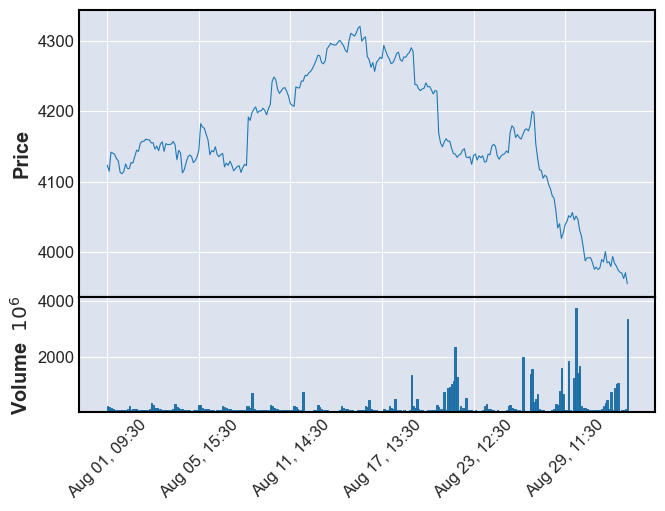

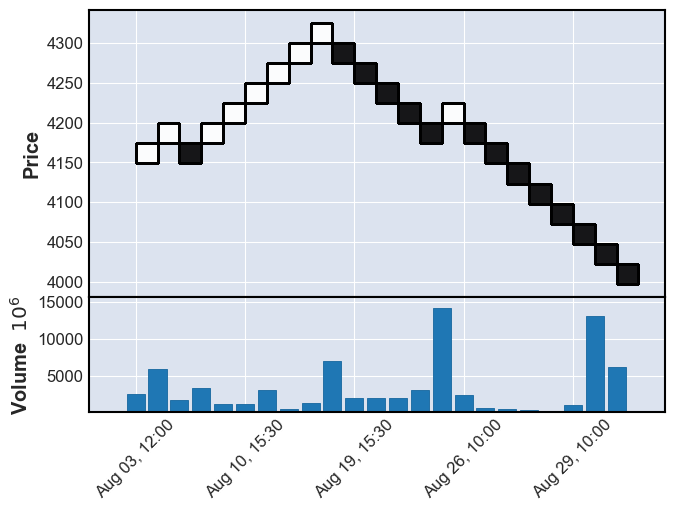

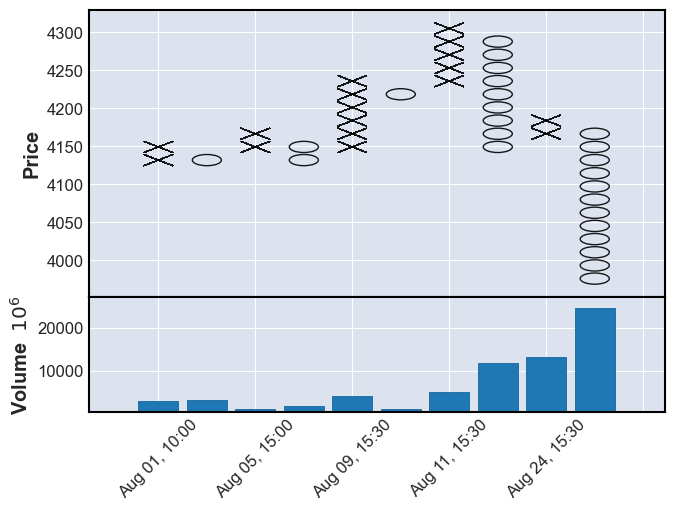

In [ ]:
# SPY Data for August 2022
iday = SPY_Data.loc['2022-07-31 13:30:00':'2022-8-31 15:30:00',:]

# Candlestick
mpf.plot(iday, type='candle',volume=True)

# Open High Low Close (OHLC)
mpf.plot(iday, type = 'ohlc',volume=True)

# Line
mpf.plot(iday, type = 'line',volume=True)

# Renko
mpf.plot(iday, type='renko',renko_params=dict(brick_size='atr', atr_length=2), volume=True)

# Point & Figure (P&F)
mpf.plot(iday, type = 'pnf',volume=True)

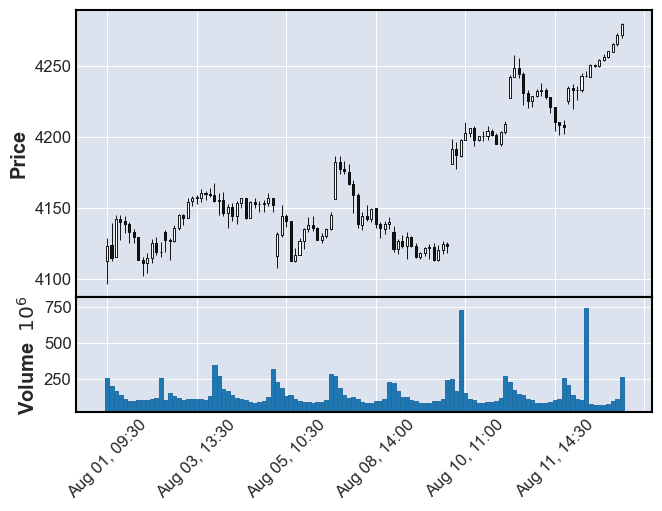

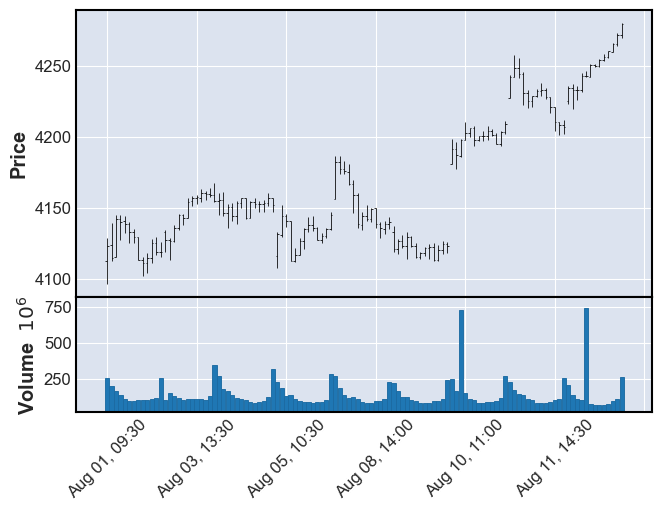

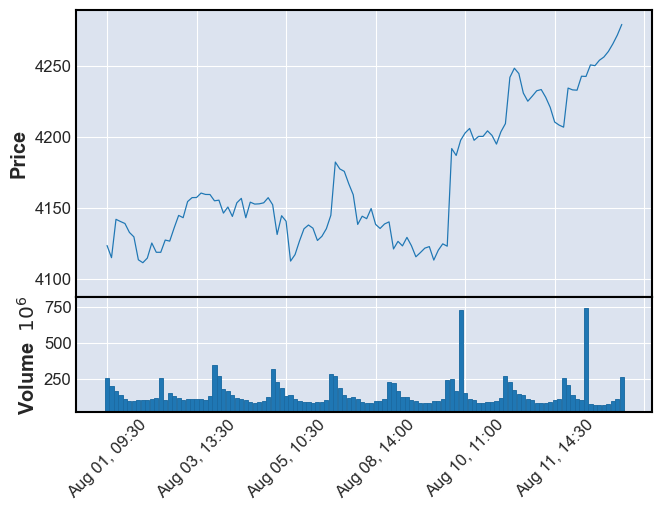

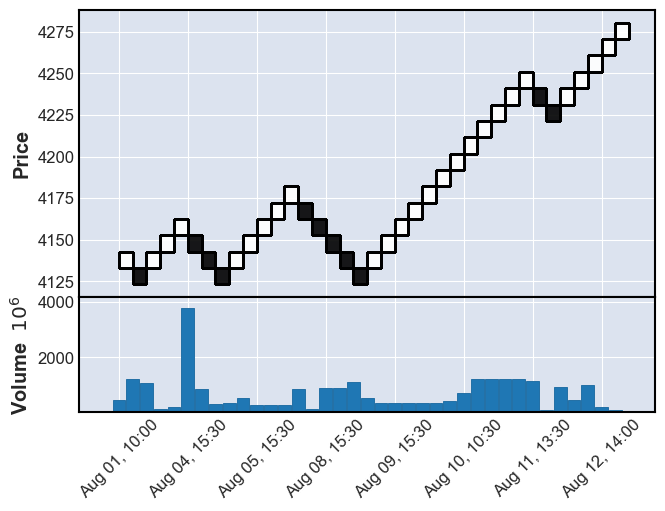

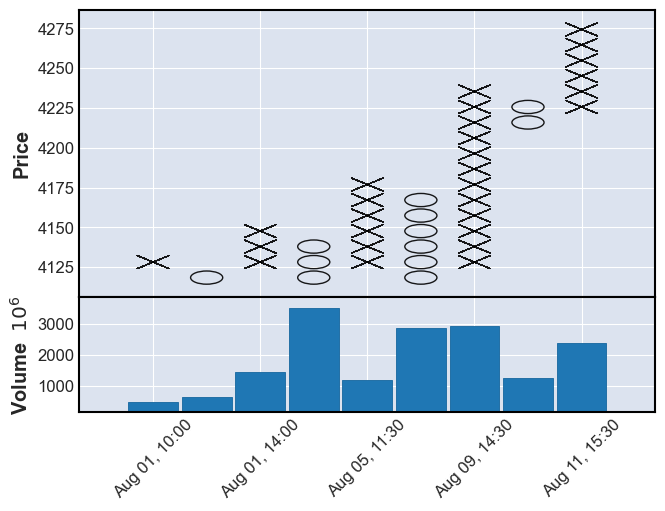

In [ ]:
# SPY Data for two weeks in August
iday = SPY_Data.loc['2022-07-31 13:30:00':'2022-8-14 15:30:00',:]

# Candlestick
mpf.plot(iday, type='candle',volume=True)

# Open High Low Close (OHLC)
mpf.plot(iday, type = 'ohlc',volume=True)

# Line
mpf.plot(iday, type = 'line',volume=True)

# Renko
mpf.plot(iday, type='renko',renko_params=dict(brick_size='atr', atr_length=2), volume=True)

# Point & Figure (P&F)
mpf.plot(iday, type = 'pnf',volume=True)

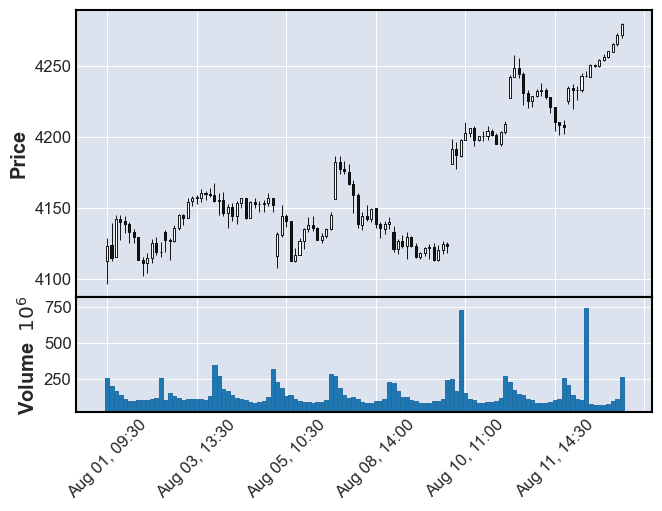

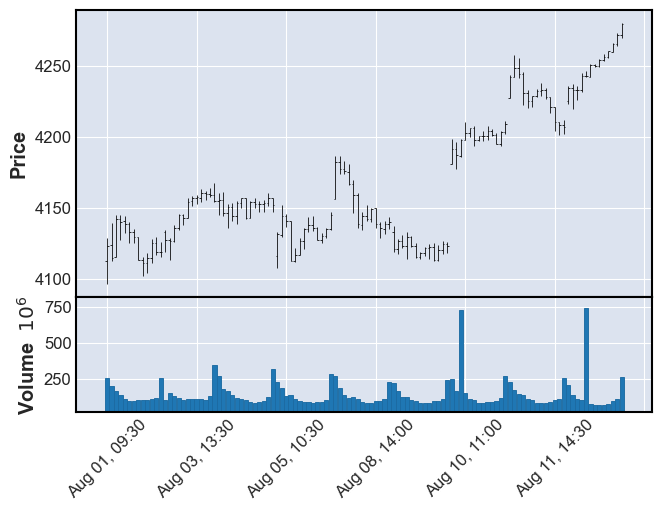

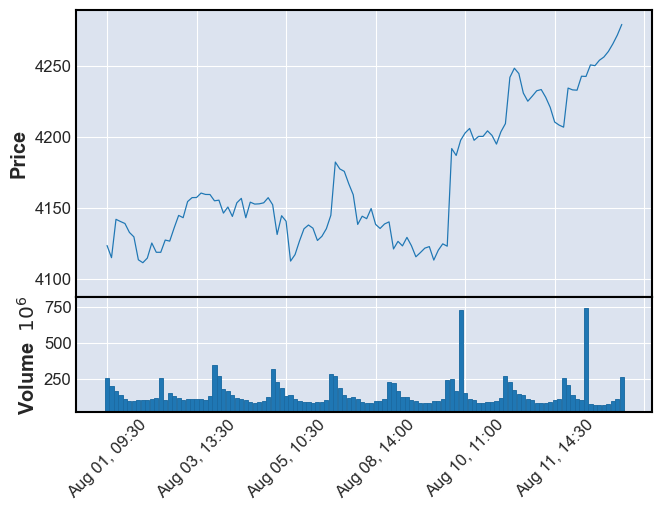

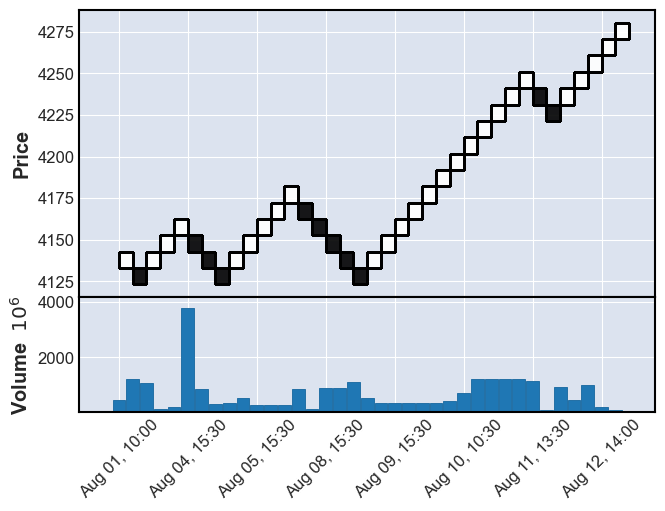

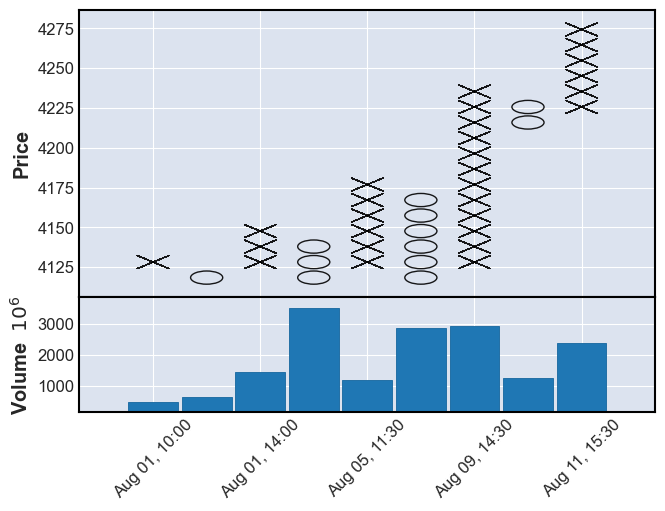

In [ ]:
# SPY Data for one day in August
iday = SPY_Data.loc['2022-08-01 08:30:00':'2022-8-14 17:30:00',:]

# Candlestick
mpf.plot(iday, type='candle',volume=True)

# Open High Low Close (OHLC)
mpf.plot(iday, type = 'ohlc',volume=True)

# Line
mpf.plot(iday, type = 'line',volume=True)

# Renko
mpf.plot(iday, type='renko',renko_params=dict(brick_size='atr', atr_length=2), volume=True)

# Point & Figure (P&F)
mpf.plot(iday, type = 'pnf',volume=True)

C:\Users\jaker\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


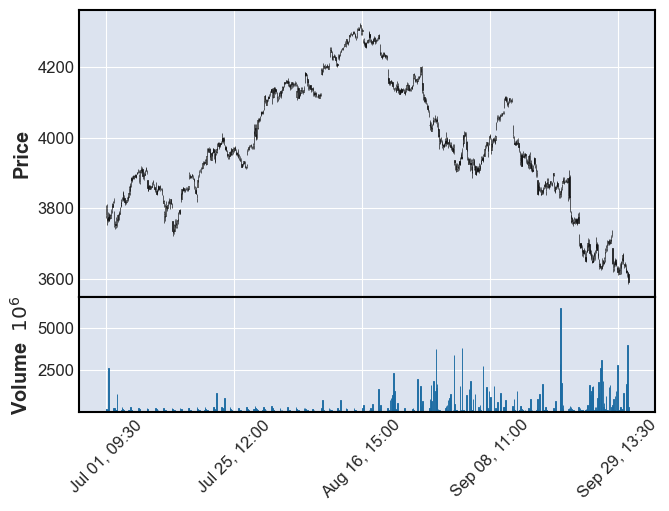

C:\Users\jaker\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


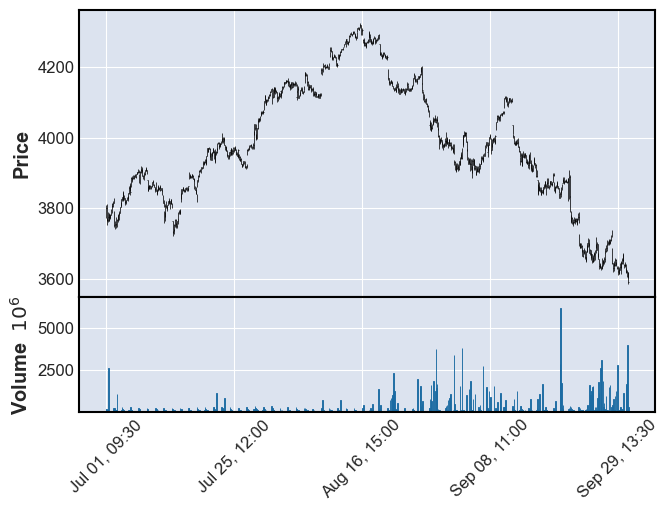

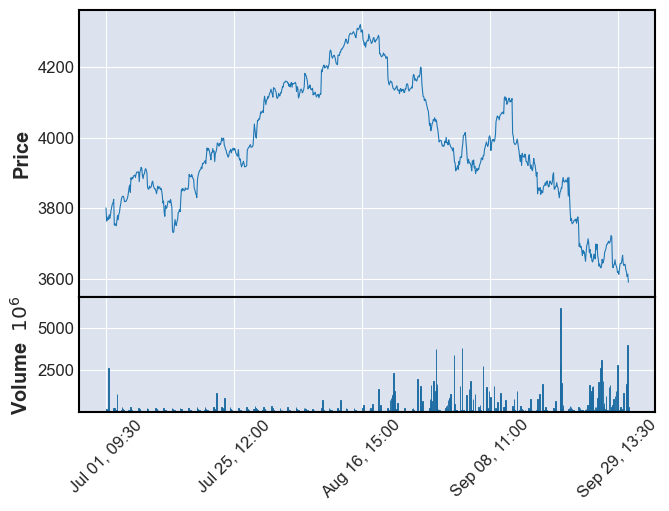

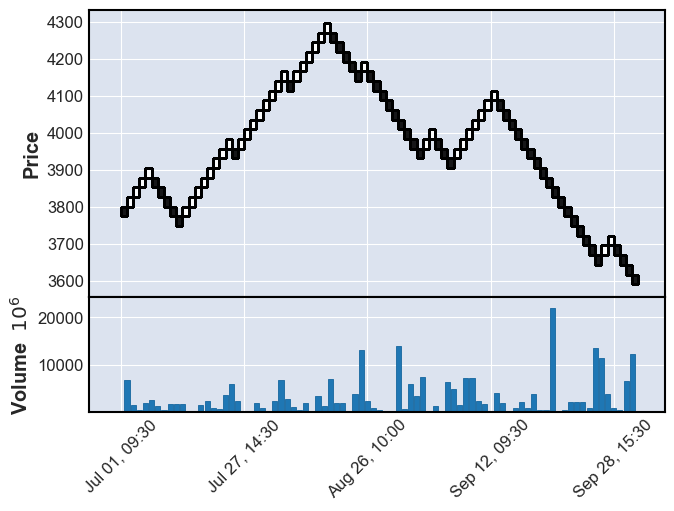

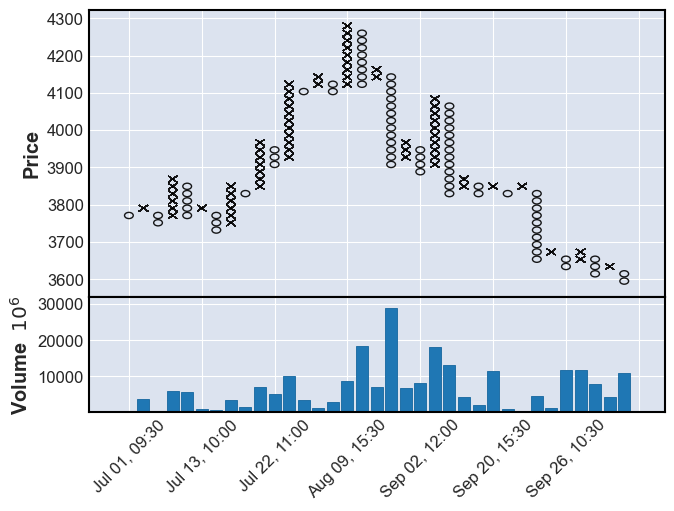

In [ ]:
# SPY Data for two months
iday = SPY_Data.loc['2022-07-01 08:30:00':'2022-9-30 17:30:00',:]

# Candlestick
mpf.plot(iday, type='candle',volume=True)

# Open High Low Close (OHLC)
mpf.plot(iday, type = 'ohlc',volume=True)

# Line
mpf.plot(iday, type = 'line',volume=True)

# Renko
mpf.plot(iday, type='renko',renko_params=dict(brick_size='atr', atr_length=2), volume=True)

# Point & Figure (P&F)
mpf.plot(iday, type = 'pnf',volume=True)

Here there is a warning for too much data, so we may want to find some way to aggregate the data if we want to show longer time intervals.

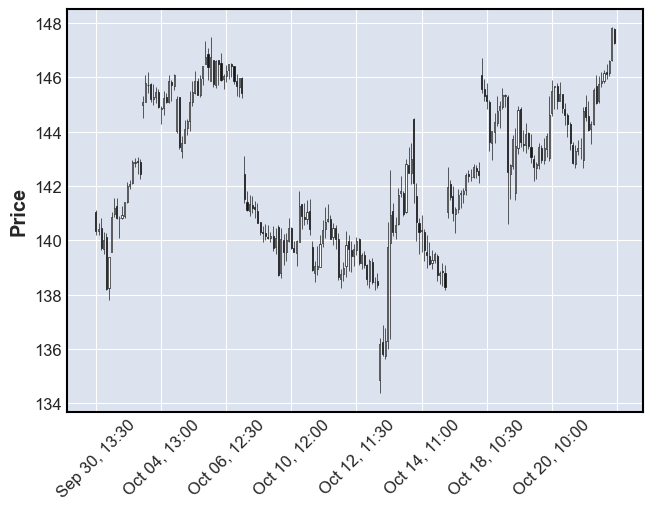

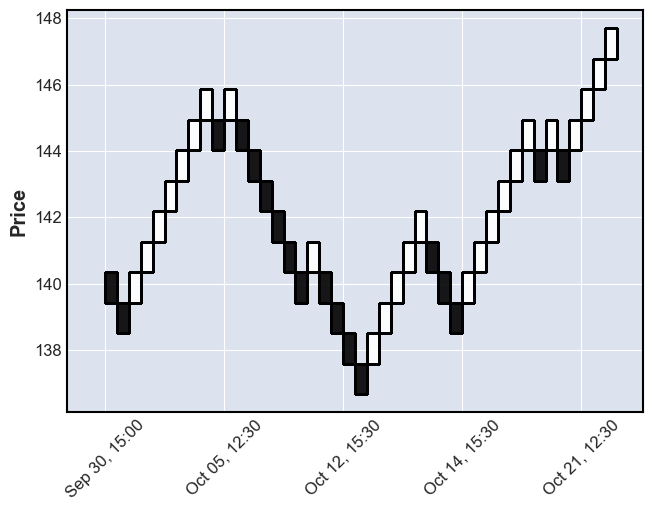

In [ ]:
# APPL data for original time interval
iday2 = appl.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]

# Candlestick
mpf.plot(iday2, type='candle')

# Renko
mpf.plot(iday2, type='renko',renko_params=dict(brick_size='atr', atr_length=2))

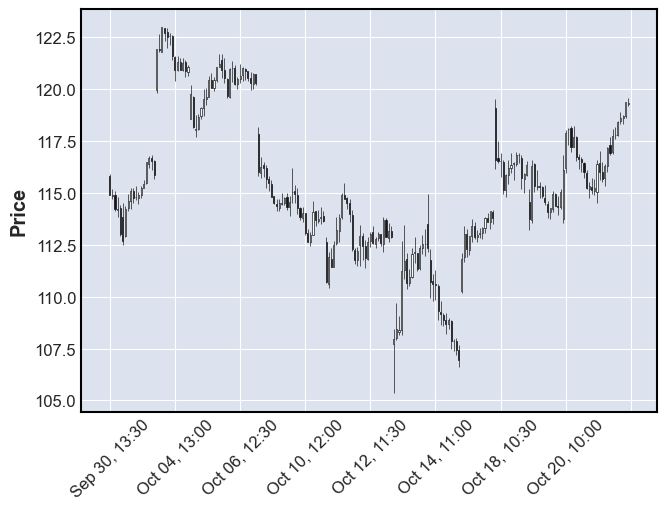

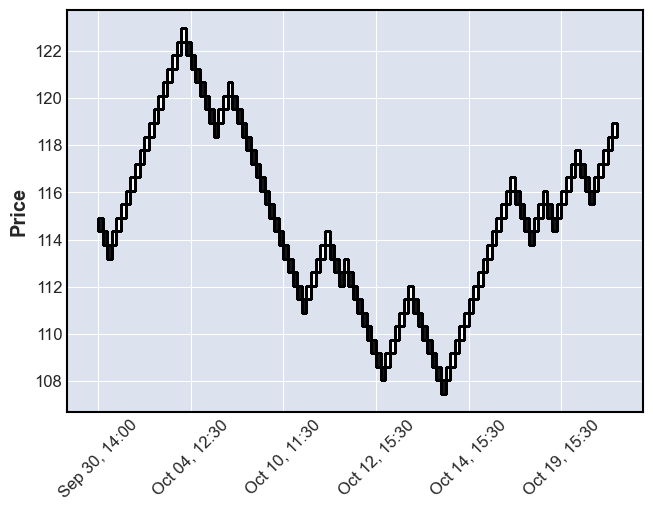

In [ ]:
# AMZN
iday3 = amzn.loc['2022-09-30 13:30:00':'2022-10-21 15:30:00',:]

# Candlestick
mpf.plot(iday3, type='candle')

# Renko
mpf.plot(iday3, type='renko',renko_params=dict(brick_size='atr', atr_length=2))

Try various methods of combining plots to compare data.

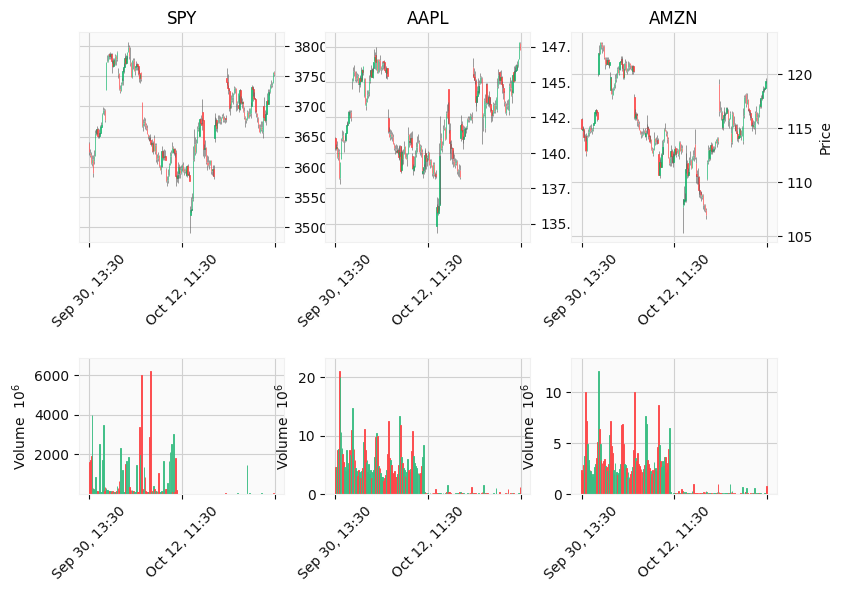

In [ ]:
# Side by side plots
fig = mpf.figure(figsize=(9,6),style='yahoo')
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
av1 = fig.add_subplot(3,3,7,sharex=ax1)
av2 = fig.add_subplot(3,3,8,sharex=ax1)
av3 = fig.add_subplot(3,3,9,sharex=ax3)
mpf.plot(iday1,type='candle',ax=ax1,volume=av1,axtitle='SPY')
mpf.plot(iday2,type='candle',ax=ax2,volume=av2,axtitle='AAPL')
mpf.plot(iday3,type='candle',ax=ax3,volume=av3,axtitle='AMZN')

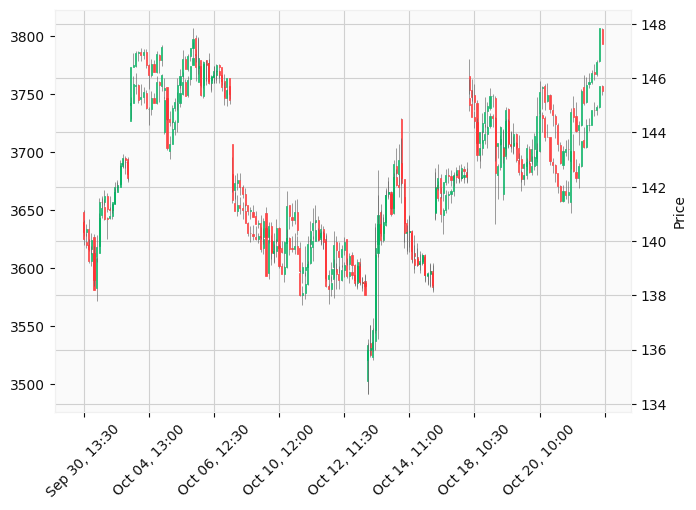

In [ ]:
# Same plot with SPY and AAPL data as candlestick
ap = mpf.make_addplot(iday1,type='candle')
mpf.plot(iday2,type='candle',style='yahoo',addplot=ap)

Both of these types of plots display major similarities and variances between the data sets, but these would probably be easier to visualize with less data points. We should do this by either using a smaller time interval or aggregating the data to reduce noise.

We can further explore the mplfinance package's capabilities, including adding trendlines and support/resistance lines, creating other types of comparative plots, and comparing different excepts of the data. We may have to reduce the amount of data included in one plot to better visualize the trends in the data.

# Conclusion

**Major (Possible) Changes :**
> There are a few major changes that we have come about in the past week after analyzing the data that our team has gathered. Our original idea was to look at just the closing times for all of the companies that we gathered data for. However, for the purposes of our project, just looking at the closing times is not sufficient to achieve our actual goal. 

> We can remove linear regression from our list of possible approaches for answering our research questions due to the fact that it doesn't provide us with enough information about isolated behaviors or trends in the data. It also doesn't help us get any further in predicting the future behaviors of these stocks or help us beat the market.

> When clustering data, looking only at the closing data tells us next to nothing about the stock itself. We can see where each stock closed at, but there is far more depth to "beating the market". Price change happens over night, and some stocks close at much higher values than other. Disregarding underlying factors and only looking at the closing values hinders our scope of technical analysis. That being said, moving forward with clustering, we will cluster based on likeness of the stocks, i.e. - each company stock's columns can be averaged and placed into a new data frame. Said dataframe can then be used to cluster each stock based on likeness to the other stocks.  **Another idea is that we could just make a cluster for each company, showing the likness of each date/time from the obtained 30 minute intervals**

> We can utilize the mplfinance package of matplotlib to visualize the data, particularly to compare trends in the different data sets, and do a lot of the heavy lifting for us. 

# Part 3

Revised Concept

Potential research questions we plan to address:

* **Can we beat the market through technical analysis?**
* How accurately can the S&P predict the behaviors of 
other stocks (fin, tech, etc.)?
* How do shorter term and longer term moving averages help us predict stock behavior?
* What type of buyer proves more useful for predicting the market in this way?
* Can we visualize the impact of more powerful (bigger) companies over other similar companies?
* Can we visualize the weight of every stock in the S&P 500?

# Long Term MA vs. Buyer Type (Jake and Sidney)

In [ ]:
import numpy as np, mplfinance as mpf, pandas as pd

## How do shorter term and longer term moving averages help us predict stock behavior? ##

To understand this question more, we must define short and long term moving averages.

### Recap on Moving Averages
Moving averges are the average of the N-sum of all datapoints of the close price.

### Short Term Moving Averages
Short term moving averages consist of moving averages that are generally under 50 datapoints, since the average generally should be closer to the n+1 price.

### Long Term Moving Averages
Long term moving averages consist of moving averages that are generally larger 50 datapoints, since the average generally should be further away from the n+1 price.

As we discussed in Part 2 of the project, the most widely considered used moving averages are the 10 and 50, which indicate a buy signal.
However, there are two more averages widely used, are the 200 and 250.

### Short & Long Term Signals
##### Short Term Signals
10 crosses the 50
##### Long Term Signals
50 crosses the 200

**or**

200 crosses the 250


### Why use the the longer term moving averages or signals?
Shorter term signals are for **traders**, or those who only buy and hold stocks for a few minutes to a few hours. Short term signals can be extremely effective to this type of trading. 

Longer term averages are more for casual investors who don't want to check charts multiple times a day.
Longer term moving averages should be combined with larger or medium timeframes (30M, 4H, 1D) as short term should be compared short to medium timeframes (10M to 30M.)


In [ ]:
SPY = [pd.read_csv("SPX_Data2.csv", index_col=0, parse_dates=True)[::-1],
       pd.read_csv("SPX_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

AAPL = [pd.read_csv("AAPL_Data2.csv", index_col=0, parse_dates=True)[::-1],
        pd.read_csv("AAPL_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

QQQ = [pd.read_csv("QQQ_Data2.csv", index_col=0, parse_dates=True)[::-1],
       pd.read_csv("QQQ_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

TSLA = [pd.read_csv("TSLA_Data2.csv", index_col=0, parse_dates=True)[::-1],
        pd.read_csv("TSLA_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

NVDA = [pd.read_csv("NVDA_Data2.csv", index_col=0, parse_dates=True)[::-1],
        pd.read_csv("NVDA_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

GOOG = [pd.read_csv("GOOG_Data2.csv", index_col=0, parse_dates=True)[::-1],
        pd.read_csv("GOOG_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

MSFT = [pd.read_csv("MSFT_Data2.csv", index_col=0, parse_dates=True)[::-1],
        pd.read_csv("MSFT_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

AMZN = [pd.read_csv("AMZN_Data2.csv", index_col=0, parse_dates=True)[::-1],
        pd.read_csv("AMZN_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

NFLX = [pd.read_csv("NFLX_Data2.csv", index_col=0, parse_dates=True)[::-1],
        pd.read_csv("NFLX_Data_4H.csv", index_col=0, parse_dates=True)[::-1]]

### Short Term Signals (10MA and 50MA) | 30M Chart

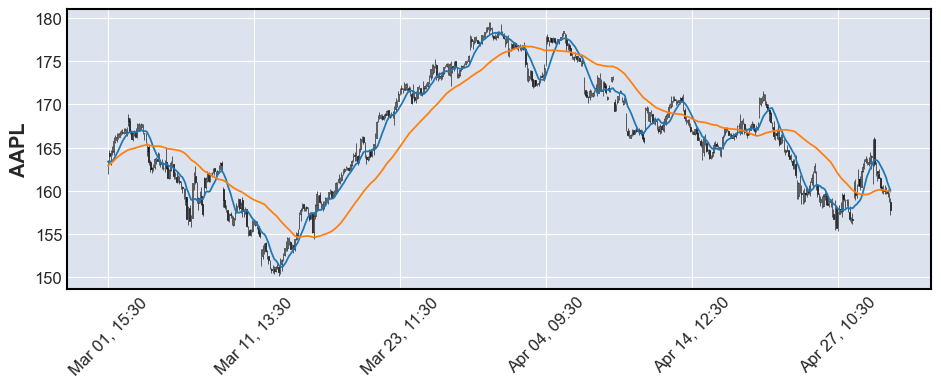

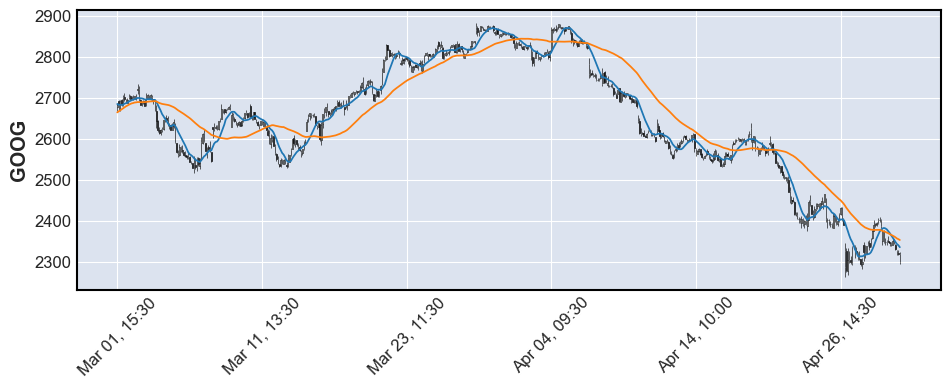

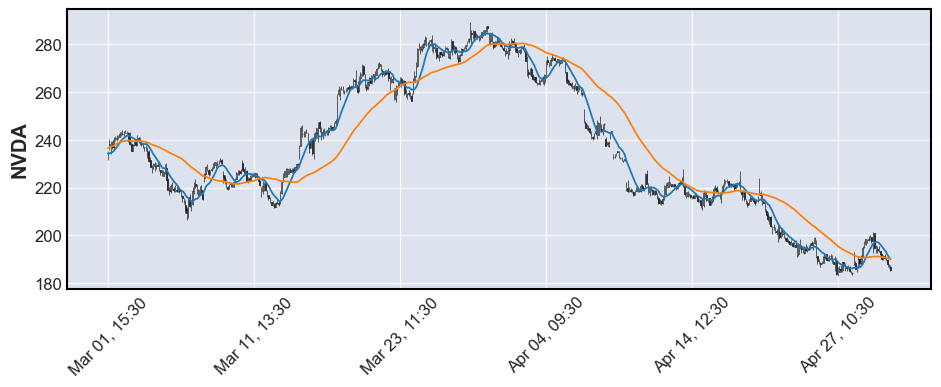

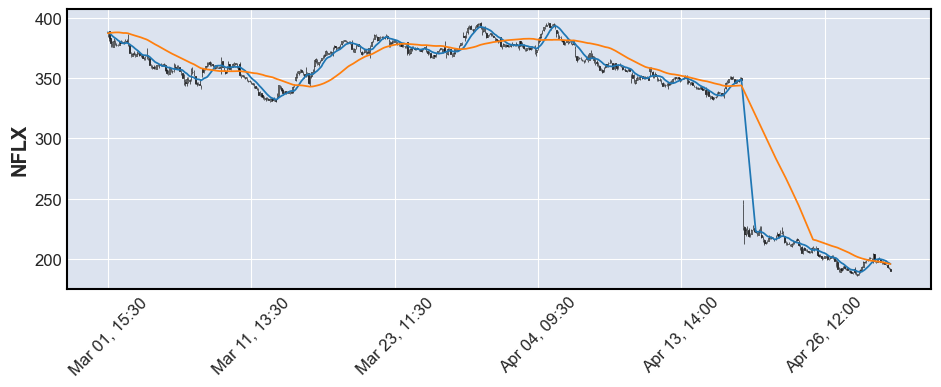

In [ ]:
start = '2022-03-01 15:30:00'
end = '2022-5-01 15:30:00'

GOOG_m = GOOG[0].loc[start:end,:]
AAPL_m = AAPL[0].loc[start:end,:]
AMZN_m = AMZN[0].loc[start:end,:]
TSLA_m = TSLA[0].loc[start:end,:]
NVDA_m = NVDA[0].loc[start:end,:]
NFLX_m = NFLX[0].loc[start:end,:]

p1 = mpf.plot(AAPL_m, type='candle', figsize=(12,4), ylabel="AAPL", returnfig=True,
                    addplot=[mpf.make_addplot(AAPL_m[['MA10','MA50']], panel= 0)])

p2 = mpf.plot(GOOG_m, type='candle', figsize=(12,4), ylabel="GOOG", returnfig=True,
                    addplot=[mpf.make_addplot(GOOG_m[['MA10','MA50']], panel= 0)])


p3 = mpf.plot(NVDA_m, type='candle', figsize=(12,4), ylabel="NVDA", returnfig=True,
                    addplot=[mpf.make_addplot(NVDA_m[['MA10','MA50']], panel= 0)])

p4 = mpf.plot(NFLX_m, type='candle', figsize=(12,4), ylabel="NFLX", returnfig=True,
                    addplot=[mpf.make_addplot(NFLX_m[['MA10','MA50']], panel= 0)])

### Long Term Signals (50MA and 200MA) | 30M Chart

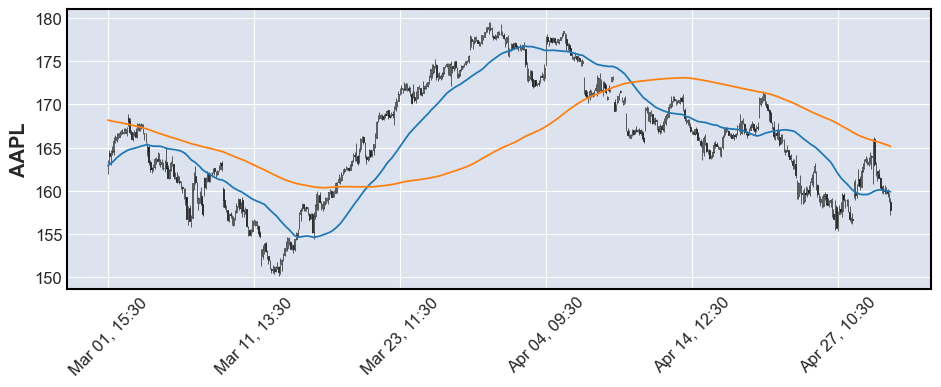

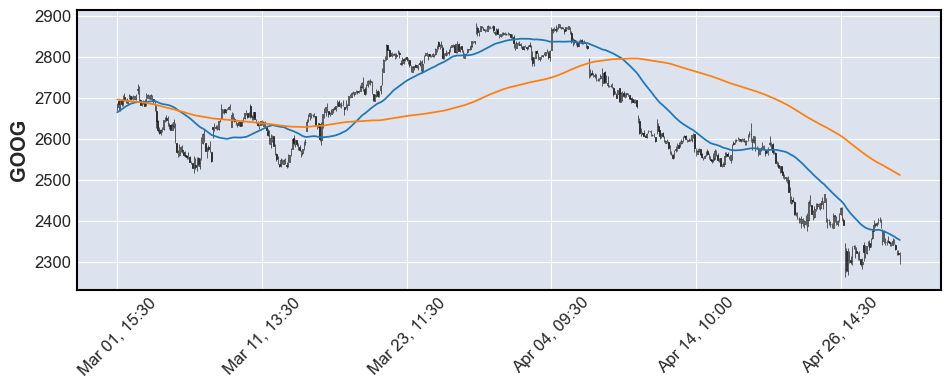

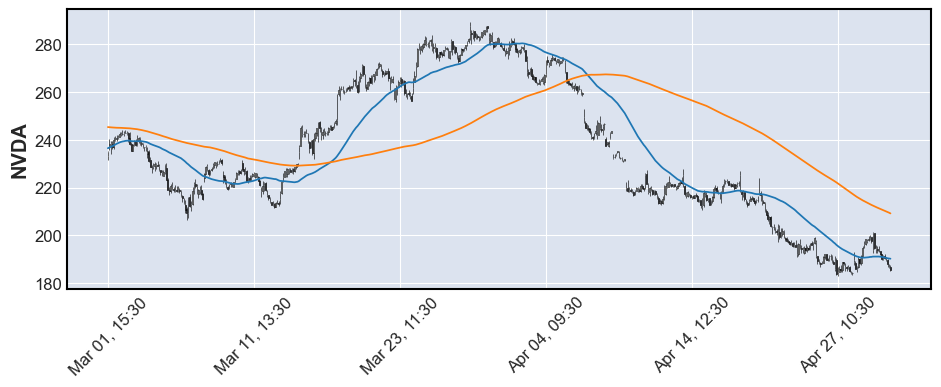

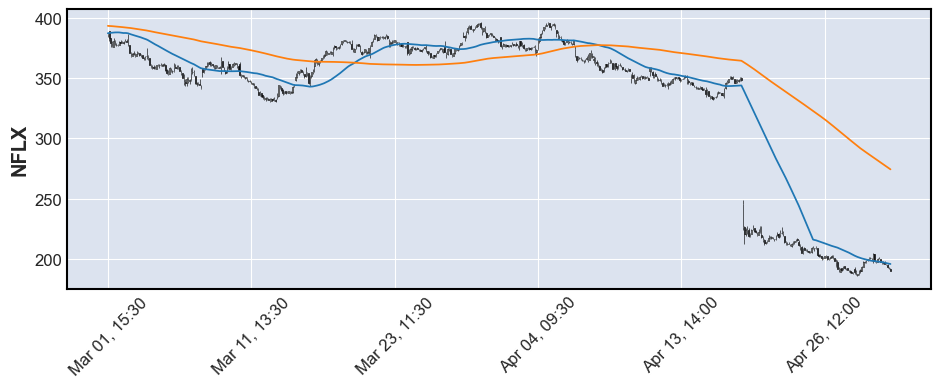

In [ ]:
start = '2022-03-01 15:30:00'
end = '2022-5-01 15:30:00'

GOOG_m = GOOG[0].loc[start:end,:]
AAPL_m = AAPL[0].loc[start:end,:]
AMZN_m = AMZN[0].loc[start:end,:]
TSLA_m = TSLA[0].loc[start:end,:]
NVDA_m = NVDA[0].loc[start:end,:]
NFLX_m = NFLX[0].loc[start:end,:]

p1 = mpf.plot(AAPL_m, type='candle', figsize=(12,4), ylabel="AAPL", returnfig=True,
                    addplot=[mpf.make_addplot(AAPL_m[['MA50','MA200']], panel= 0)])

p2 = mpf.plot(GOOG_m, type='candle', figsize=(12,4), ylabel="GOOG", returnfig=True,
                    addplot=[mpf.make_addplot(GOOG_m[['MA50','MA200']], panel= 0)])


p3 = mpf.plot(NVDA_m, type='candle', figsize=(12,4), ylabel="NVDA", returnfig=True,
                    addplot=[mpf.make_addplot(NVDA_m[['MA50','MA200']], panel= 0)])

p4 = mpf.plot(NFLX_m, type='candle', figsize=(12,4), ylabel="NFLX", returnfig=True,
                    addplot=[mpf.make_addplot(NFLX_m[['MA50','MA200']], panel= 0)])

### Short Term Signals (10MA and 50MA) | 4H Chart

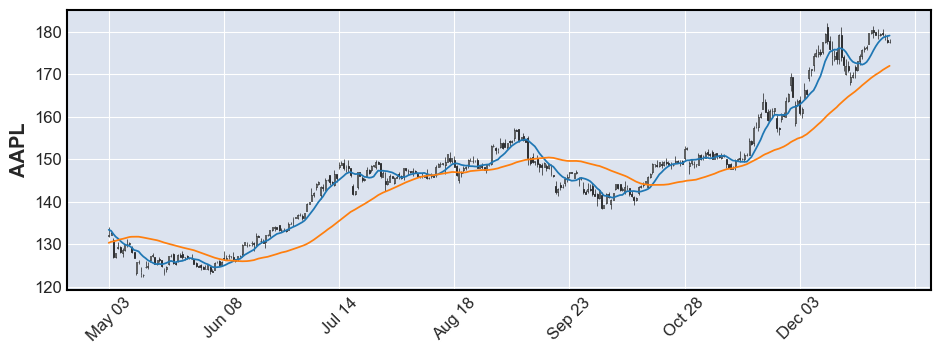

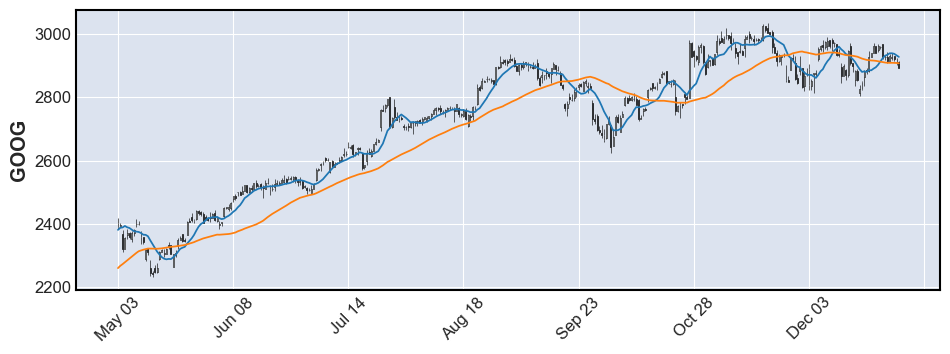

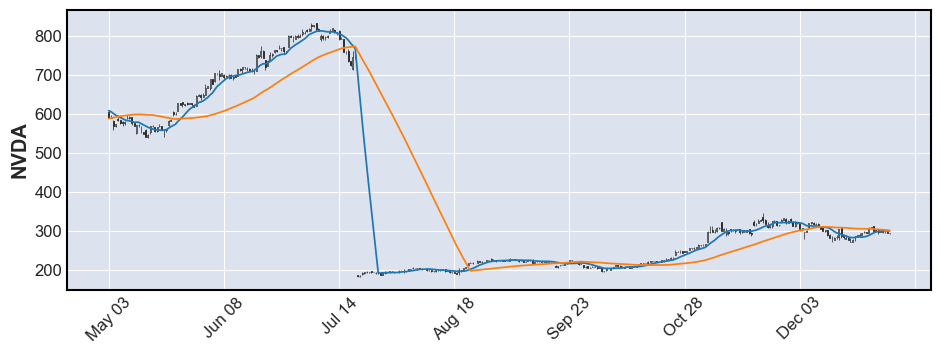

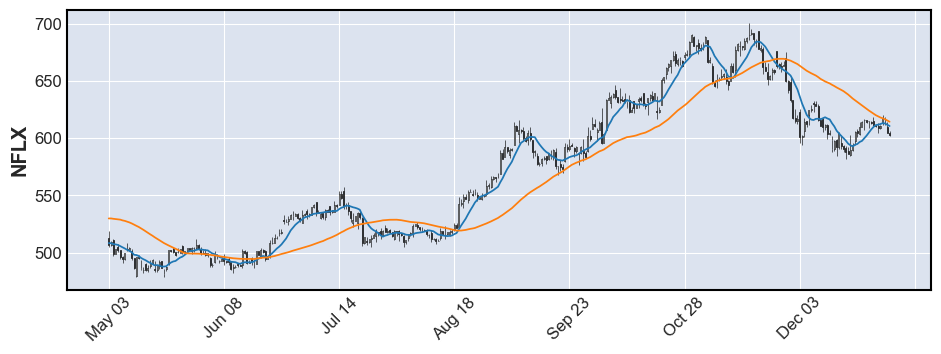

In [ ]:
start = '2021-05-01 15:30:00'
end = '2022-1-01 15:30:00'

GOOG_m = GOOG[1].loc[start:end,:]
AAPL_m = AAPL[1].loc[start:end,:]
AMZN_m = AMZN[1].loc[start:end,:]
TSLA_m = TSLA[1].loc[start:end,:]
NVDA_m = NVDA[1].loc[start:end,:]
NFLX_m = NFLX[1].loc[start:end,:]

p1 = mpf.plot(AAPL_m, type='candle', figsize=(12,4), ylabel="AAPL", returnfig=True,
                    addplot=[mpf.make_addplot(AAPL_m[['MA10','MA50']], panel= 0)])

p2 = mpf.plot(GOOG_m, type='candle', figsize=(12,4), ylabel="GOOG", returnfig=True,
                    addplot=[mpf.make_addplot(GOOG_m[['MA10','MA50']], panel= 0)])


p3 = mpf.plot(NVDA_m, type='candle', figsize=(12,4), ylabel="NVDA", returnfig=True,
                    addplot=[mpf.make_addplot(NVDA_m[['MA10','MA50']], panel= 0)])

p4 = mpf.plot(NFLX_m, type='candle', figsize=(12,4), ylabel="NFLX", returnfig=True,
                    addplot=[mpf.make_addplot(NFLX_m[['MA10','MA50']], panel= 0)])

### Long Term Signals (50MA and 200MA) | 4H Chart


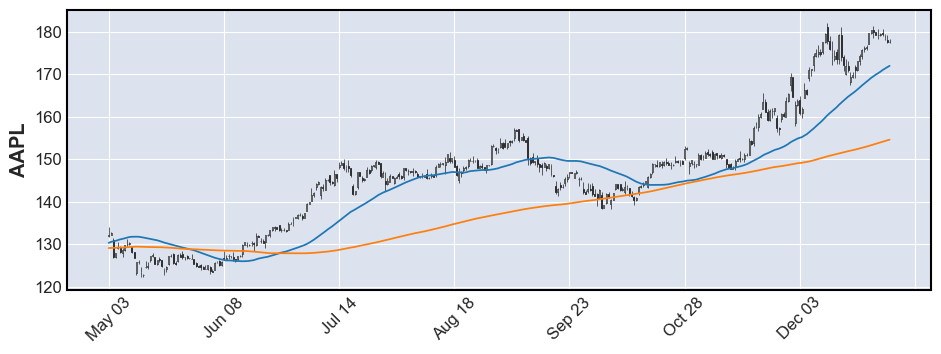

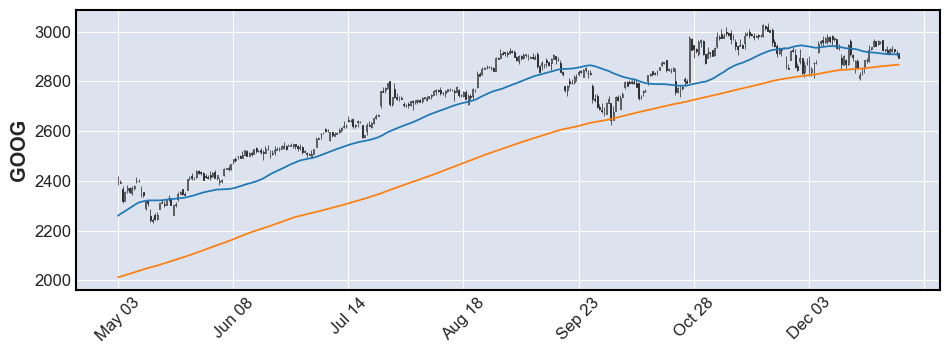

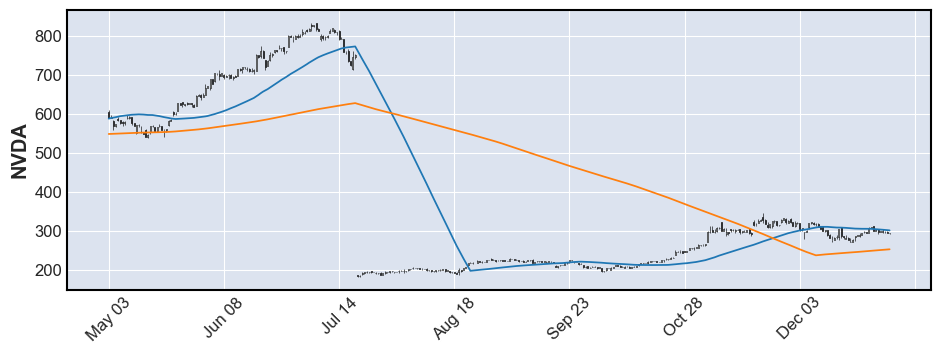

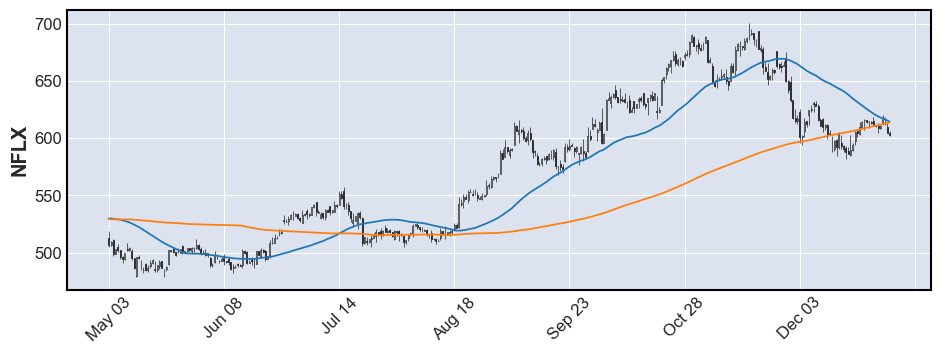

In [ ]:
start = '2021-05-01 15:30:00'
end = '2022-1-01 15:30:00'

GOOG_m = GOOG[1].loc[start:end,:]
AAPL_m = AAPL[1].loc[start:end,:]
AMZN_m = AMZN[1].loc[start:end,:]
TSLA_m = TSLA[1].loc[start:end,:]
NVDA_m = NVDA[1].loc[start:end,:]
NFLX_m = NFLX[1].loc[start:end,:]

p1 = mpf.plot(AAPL_m, type='candle', figsize=(12,4), ylabel="AAPL", returnfig=True,
                    addplot=[mpf.make_addplot(AAPL_m[['MA50','MA200']], panel= 0)])

p2 = mpf.plot(GOOG_m, type='candle', figsize=(12,4), ylabel="GOOG", returnfig=True,
                    addplot=[mpf.make_addplot(GOOG_m[['MA50','MA200']], panel= 0)])


p3 = mpf.plot(NVDA_m, type='candle', figsize=(12,4), ylabel="NVDA", returnfig=True,
                    addplot=[mpf.make_addplot(NVDA_m[['MA50','MA200']], panel= 0)])

p4 = mpf.plot(NFLX_m, type='candle', figsize=(12,4), ylabel="NFLX", returnfig=True,
                    addplot=[mpf.make_addplot(NFLX_m[['MA50','MA200']], panel= 0)])

# Impact of Larger vs. Smaller Stocks by Weighting (Gurleen and Matt)
## Clustering / MDS / Weights

## Clustering 

### Close Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise
import sklearn.cluster
import sklearn.decomposition
#%matplotlib inline
apple = pd.read_csv('AAPL_Data2.csv')
amazon = pd.read_csv('AMZN_Data2.csv')
google = pd.read_csv('GOOG_Data2.csv')
netflix = pd.read_csv('NFLX_Data2.csv')
msoft = pd.read_csv('MSFT_Data2.csv')
qqq = pd.read_csv('QQQ_Data2.csv')
snp = pd.read_csv('SPX_Data2.csv')
tesla = pd.read_csv('TSLA_Data2.csv')

snp500 = pd.read_csv('SPX_Data2.csv')

In [ ]:
# So SNP500 is sorta' like the baseline 
# ----- this is what everything is compared to and this is what we 
# ----- should be comparing all other stocks too. 
snp500[:4]

datetime        open        high         low       close  \
0  2022-11-30 14:30:00  4034.26001  4034.78003  4023.32007  4025.63989   
1  2022-11-30 14:00:00  4000.83008  4037.21997  4000.83008  4034.22998   
2  2022-11-30 13:30:00  3950.82007  4003.03003  3945.41992  4001.26001   
3  2022-11-30 13:00:00  3944.90991  3952.72998  3944.51001  3950.79004   

    volume        MA10       MA50       MA200       MA250  
0        0  3969.74500  3983.0658  3949.96305  3914.19004  
1  8297538  3962.58401  3982.6022  3948.87170  3913.41660  
2  6509690  3954.89602  3982.1714  3947.75175  3912.61556  
3  2399210  3950.14802  3982.3098  3946.75410  3912.03308

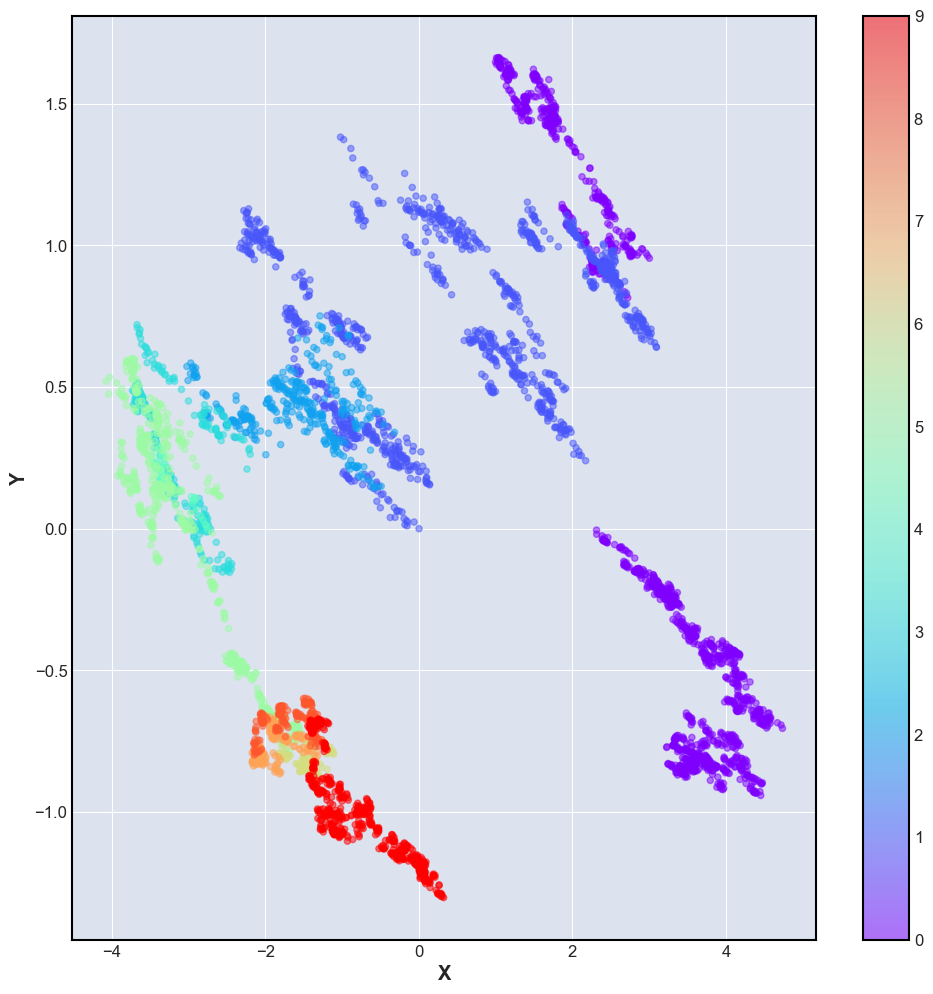

In [ ]:
# To Start, just re-do what we have done before. Clustering based on close value

#Narrow datasets
apple.rename(columns = {'close':'AAPLclose'}, inplace = True)
amazon.rename(columns = {'close':'AMZNclose'}, inplace = True)
google.rename(columns = {'close':'GOOGclose'}, inplace = True)
netflix.rename(columns = {'close':'NFLXclose'}, inplace = True)
msoft.rename(columns = {'close':'MSFTclose'}, inplace = True)
qqq.rename(columns = {'close':'QQQclose'}, inplace = True)
snp.rename(columns = {'close':'SPYclose'}, inplace = True)
tesla.rename(columns = {'close':'TSLAclose'}, inplace = True)

aapl = apple[['datetime','AAPLclose']]
amzn = amazon[['datetime','AMZNclose']]
goog = google[['datetime','GOOGclose']]
nflx = netflix[['datetime','NFLXclose']]
msft = msoft[['datetime','MSFTclose']]
qqq = qqq[['datetime','QQQclose']]
spy = snp[['datetime','SPYclose']]
tsla = tesla[['datetime','TSLAclose']]

#Merge all on datetime
result = pd.merge(aapl, amzn, on = 'datetime')
result = pd.merge(result, goog, on = 'datetime')
result = pd.merge(result, nflx, on = 'datetime')
result = pd.merge(result, msft, on = 'datetime')
result = pd.merge(result, qqq, on = 'datetime')
result = pd.merge(result, spy, on = 'datetime')
result = pd.merge(result, tsla, on = 'datetime')


result_copy = result.copy()
quant = result_copy.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

# calculate the Euclidean Distance Matrix that will be 
# used to sort in likeness based on datetime
import sklearn.metrics.pairwise
# Calculate the distance matrix - EUCLIDEAN BITCHES
e_mat = sklearn.metrics.pairwise.euclidean_distances(norm)
e_mat = pd.DataFrame(e_mat, index = norm.index, columns = norm.index)
# create a new row in the data frame to sort with
e_mat['mean'] = e_mat.mean()
# add the index back
#e_mat["datetime"] =  norm.datetime
# Finish the Euclidean MUTHAFUCKing matrix
e_mat = e_mat.sort_values(by='mean')
e_mat = e_mat.drop(columns=['mean'])

import sklearn.cluster as cluster

intertia = list()

for i in range(1, 52):
    km = cluster.KMeans(n_clusters=i, max_iter = 10, n_init=1)
    km.init = norm.iloc[:i,:]
    km.n_clusters = i
    km.fit(norm)
    intertia.append([i, km.inertia_])

intertia_pd = pd.DataFrame(intertia, columns=["K","Inertia"])

new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

import sklearn.cluster

km = sklearn.cluster.KMeans(n_clusters=10, max_iter = 10, n_init=1)
km.init=norm.iloc[:10,:]
labels = km.fit_predict(norm)
labels = pd.DataFrame(labels, columns = ['Cluster'], index=norm.index)
labels = labels.sort_values("Cluster", ascending = True)


new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant / quant.mean()) / quant.std()
norm["Cluster"] = labels.Cluster
norm.sort_values(by='Cluster')

clusters = norm.Cluster.value_counts().index
counts = norm.Cluster.value_counts().values
new_norm = norm.groupby("Cluster")
md = new_norm.apply(lambda x: sklearn.metrics.pairwise.euclidean_distances(x.iloc[:,:-1]).max())

# Sort by distance
df = pd.DataFrame()
df["Cluster"] = clusters
df["Size"] = counts
df = df.sort_values(by="Cluster")
df["MaxDistance"] = md

new_result = result.copy()
quant = new_result.iloc[:,2:]
norm = (quant - quant.mean())/quant.std()

import sklearn.decomposition
PCA = sklearn.decomposition.PCA(svd_solver='full')
tablePCA = PCA.fit_transform(norm)
tablePCA = pd.DataFrame(tablePCA, index = norm.index)
tablePCA
Answer5 = pd.DataFrame()
Answer5["DateTime"] = new_result.datetime
Answer5["X"] = tablePCA[0]
Answer5["Y"] = tablePCA[1]

ax = Answer5.plot.scatter(x="X",y="Y", c=labels.Cluster,colormap = plt.cm.rainbow, 
                          sharex=False, alpha=.5, figsize = (12, 12))


### Open Clustering

In [ ]:
# Re-read in all of the daata
apple = pd.read_csv('AAPL_Data2.csv')
amazon = pd.read_csv('AMZN_Data2.csv')
google = pd.read_csv('GOOG_Data2.csv')
netflix = pd.read_csv('NFLX_Data2.csv')
msoft = pd.read_csv('MSFT_Data2.csv')
qqq = pd.read_csv('QQQ_Data2.csv')
snp = pd.read_csv('SPX_Data2.csv')
tesla = pd.read_csv('TSLA_Data2.csv')

snp500 = pd.read_csv('SPX_Data2.csv')

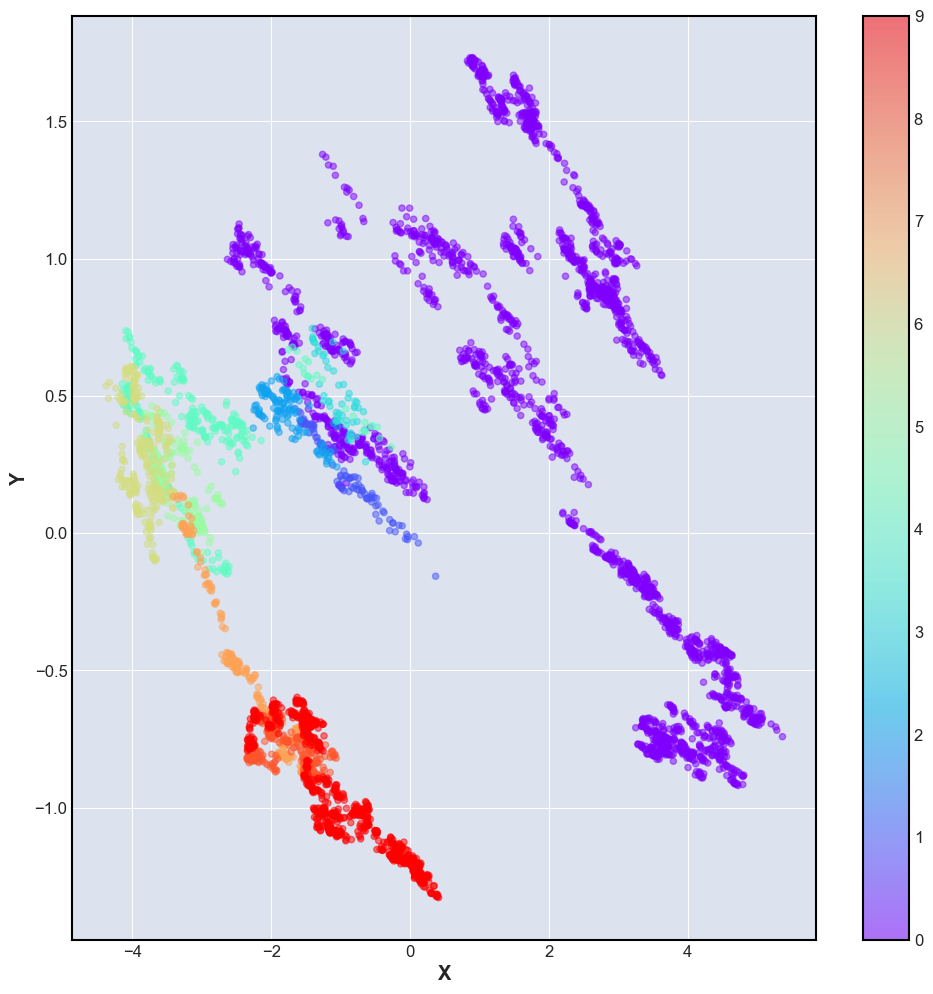

In [ ]:
apple.rename(columns = {'open':'AAPLopen'}, inplace = True)
amazon.rename(columns = {'open':'AMZNopen'}, inplace = True)
google.rename(columns = {'open':'GOOGopen'}, inplace = True)
netflix.rename(columns = {'open':'NFLXopen'}, inplace = True)
msoft.rename(columns = {'open':'MSFTopen'}, inplace = True)
qqq.rename(columns = {'open':'QQQopen'}, inplace = True)
snp.rename(columns = {'open':'SPYopen'}, inplace = True)
tesla.rename(columns = {'open':'TSLAopen'}, inplace = True)
snp500.rename(columns = {'open':'SNP500open'}, inplace = True)

## Create new data frames
aapl = apple[['datetime','AAPLopen']]
amzn = amazon[['datetime','AMZNopen']]
goog = google[['datetime','GOOGopen']]
nflx = netflix[['datetime','NFLXopen']]
msft = msoft[['datetime','MSFTopen']]
qqq = qqq[['datetime','QQQopen']]
spy = snp[['datetime','SPYopen']]
tsla = tesla[['datetime','TSLAopen']]
s500 = snp500[['datetime', 'SNP500open']]

result = pd.merge(aapl, amzn, on = 'datetime')
result = pd.merge(result, goog, on = 'datetime')
result = pd.merge(result, nflx, on = 'datetime')
result = pd.merge(result, msft, on = 'datetime')
result = pd.merge(result, qqq, on = 'datetime')
result = pd.merge(result, spy, on = 'datetime')
result = pd.merge(result, tsla, on = 'datetime')
result = pd.merge(result, s500, on = 'datetime')


result_copy = result.copy()
quant = result_copy.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

# calculate the Euclidean Distance Matrix that will be 
# used to sort in likeness based on datetime
import sklearn.metrics.pairwise
# Calculate the distance matrix - EUCLIDEAN BITCHES
e_mat = sklearn.metrics.pairwise.euclidean_distances(norm)
e_mat = pd.DataFrame(e_mat, index = norm.index, columns = norm.index)
# create a new row in the data frame to sort with
e_mat['mean'] = e_mat.mean()
# add the index back
#e_mat["datetime"] =  norm.datetime
# Finish the Euclidean MUTHAFUCKing matrix
e_mat = e_mat.sort_values(by='mean')
e_mat = e_mat.drop(columns=['mean'])

import sklearn.cluster as cluster

intertia = list()

for i in range(1, 52):
    km = cluster.KMeans(n_clusters=i, max_iter = 10, n_init=1)
    km.init = norm.iloc[:i,:]
    km.n_clusters = i
    km.fit(norm)
    intertia.append([i, km.inertia_])

intertia_pd = pd.DataFrame(intertia, columns=["K","Inertia"])

new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

import sklearn.cluster

km = sklearn.cluster.KMeans(n_clusters=10, max_iter = 10, n_init=1)
km.init=norm.iloc[:10,:]
labels = km.fit_predict(norm)
labels = pd.DataFrame(labels, columns = ['Cluster'], index=norm.index)
labels = labels.sort_values("Cluster", ascending = True)


new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant / quant.mean()) / quant.std()
norm["Cluster"] = labels.Cluster
norm.sort_values(by='Cluster')

clusters = norm.Cluster.value_counts().index
counts = norm.Cluster.value_counts().values
new_norm = norm.groupby("Cluster")
md = new_norm.apply(lambda x: sklearn.metrics.pairwise.euclidean_distances(x.iloc[:,:-1]).max())

# Sort by distance
df = pd.DataFrame()
df["Cluster"] = clusters
df["Size"] = counts
df = df.sort_values(by="Cluster")
df["MaxDistance"] = md

new_result = result.copy()
quant = new_result.iloc[:,2:]
norm = (quant - quant.mean())/quant.std()

import sklearn.decomposition
PCA = sklearn.decomposition.PCA(svd_solver='full')
tablePCA = PCA.fit_transform(norm)
tablePCA = pd.DataFrame(tablePCA, index = norm.index)
tablePCA
Answer5 = pd.DataFrame()
Answer5["DateTime"] = new_result.datetime
Answer5["X"] = tablePCA[0]
Answer5["Y"] = tablePCA[1]

ax = Answer5.plot.scatter(x="X",y="Y", c=labels.Cluster,colormap = plt.cm.rainbow, 
                          sharex=False, alpha=.5, figsize = (12, 12))


### High Clustering

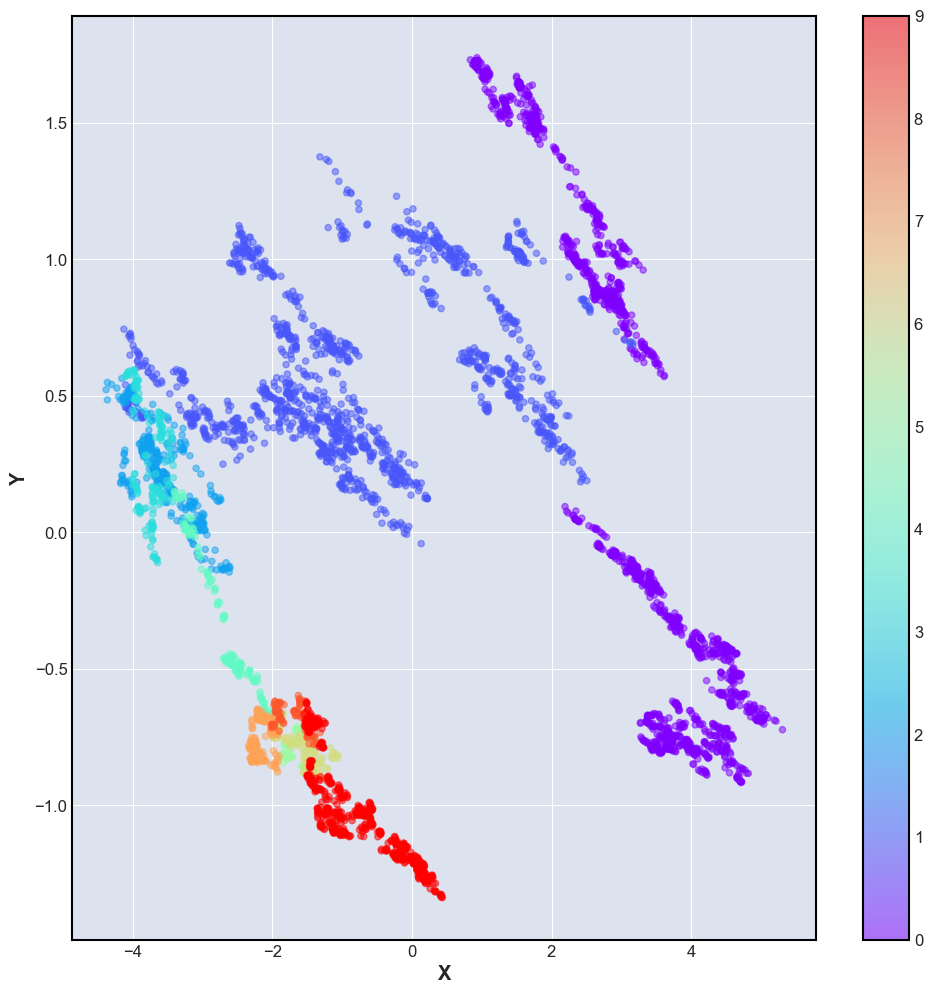

In [ ]:
# Re-read in all of the data
apple = pd.read_csv('AAPL_Data2.csv')
amazon = pd.read_csv('AMZN_Data2.csv')
google = pd.read_csv('GOOG_Data2.csv')
netflix = pd.read_csv('NFLX_Data2.csv')
msoft = pd.read_csv('MSFT_Data2.csv')
qqq = pd.read_csv('QQQ_Data2.csv')
snp = pd.read_csv('SPX_Data2.csv')
tesla = pd.read_csv('TSLA_Data2.csv')

snp500 = pd.read_csv('SPX_Data2.csv')

apple.rename(columns = {'high':'AAPLhigh'}, inplace = True)
amazon.rename(columns = {'high':'AMZNhigh'}, inplace = True)
google.rename(columns = {'high':'GOOGhigh'}, inplace = True)
netflix.rename(columns = {'high':'NFLXhigh'}, inplace = True)
msoft.rename(columns = {'high':'MSFThigh'}, inplace = True)
qqq.rename(columns = {'high':'QQQhigh'}, inplace = True)
snp.rename(columns = {'high':'SPYhigh'}, inplace = True)
tesla.rename(columns = {'high':'TSLAhigh'}, inplace = True)
snp500.rename(columns = {'high':'SNP500high'}, inplace = True)

## Create new data frames
aapl = apple[['datetime','AAPLhigh']]
amzn = amazon[['datetime','AMZNhigh']]
goog = google[['datetime','GOOGhigh']]
nflx = netflix[['datetime','NFLXhigh']]
msft = msoft[['datetime','MSFThigh']]
qqq = qqq[['datetime','QQQhigh']]
spy = snp[['datetime','SPYhigh']]
tsla = tesla[['datetime','TSLAhigh']]
s500 = snp500[['datetime', 'SNP500high']]

result = pd.merge(aapl, amzn, on = 'datetime')
result = pd.merge(result, goog, on = 'datetime')
result = pd.merge(result, nflx, on = 'datetime')
result = pd.merge(result, msft, on = 'datetime')
result = pd.merge(result, qqq, on = 'datetime')
result = pd.merge(result, spy, on = 'datetime')
result = pd.merge(result, tsla, on = 'datetime')
result = pd.merge(result, s500, on = 'datetime')


result_copy = result.copy()
quant = result_copy.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

# calculate the Euclidean Distance Matrix that will be 
# used to sort in likeness based on datetime
import sklearn.metrics.pairwise
# Calculate the distance matrix - EUCLIDEAN BITCHES
e_mat = sklearn.metrics.pairwise.euclidean_distances(norm)
e_mat = pd.DataFrame(e_mat, index = norm.index, columns = norm.index)
# create a new row in the data frame to sort with
e_mat['mean'] = e_mat.mean()
# add the index back
#e_mat["datetime"] =  norm.datetime
# Finish the Euclidean MUTHAFUCKing matrix
e_mat = e_mat.sort_values(by='mean')
e_mat = e_mat.drop(columns=['mean'])

import sklearn.cluster as cluster

intertia = list()

for i in range(1, 52):
    km = cluster.KMeans(n_clusters=i, max_iter = 10, n_init=1)
    km.init = norm.iloc[:i,:]
    km.n_clusters = i
    km.fit(norm)
    intertia.append([i, km.inertia_])

intertia_pd = pd.DataFrame(intertia, columns=["K","Inertia"])

new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

import sklearn.cluster

km = sklearn.cluster.KMeans(n_clusters=10, max_iter = 10, n_init=1)
km.init=norm.iloc[:10,:]
labels = km.fit_predict(norm)
labels = pd.DataFrame(labels, columns = ['Cluster'], index=norm.index)
labels = labels.sort_values("Cluster", ascending = True)


new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant / quant.mean()) / quant.std()
norm["Cluster"] = labels.Cluster
norm.sort_values(by='Cluster')

clusters = norm.Cluster.value_counts().index
counts = norm.Cluster.value_counts().values
new_norm = norm.groupby("Cluster")
md = new_norm.apply(lambda x: sklearn.metrics.pairwise.euclidean_distances(x.iloc[:,:-1]).max())

# Sort by distance
df = pd.DataFrame()
df["Cluster"] = clusters
df["Size"] = counts
df = df.sort_values(by="Cluster")
df["MaxDistance"] = md

new_result = result.copy()
quant = new_result.iloc[:,2:]
norm = (quant - quant.mean())/quant.std()

import sklearn.decomposition
PCA = sklearn.decomposition.PCA(svd_solver='full')
tablePCA = PCA.fit_transform(norm)
tablePCA = pd.DataFrame(tablePCA, index = norm.index)
tablePCA
Answer5 = pd.DataFrame()
Answer5["DateTime"] = new_result.datetime
Answer5["X"] = tablePCA[0]
Answer5["Y"] = tablePCA[1]

ax = Answer5.plot.scatter(x="X",y="Y", c=labels.Cluster,colormap = plt.cm.rainbow, 
                          sharex=False, alpha=.5, figsize = (12, 12))


### Low Clustering

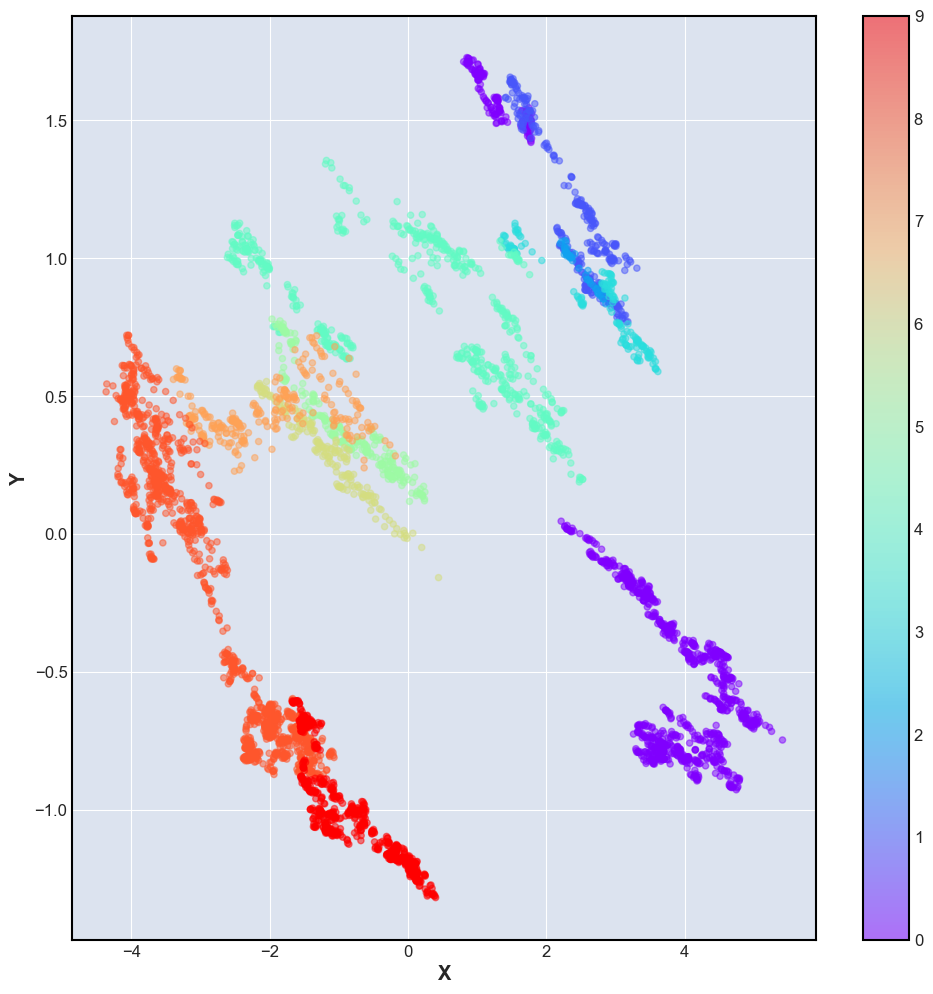

In [ ]:
# Re-read in all of the data
apple = pd.read_csv('AAPL_Data2.csv')
amazon = pd.read_csv('AMZN_Data2.csv')
google = pd.read_csv('GOOG_Data2.csv')
netflix = pd.read_csv('NFLX_Data2.csv')
msoft = pd.read_csv('MSFT_Data2.csv')
qqq = pd.read_csv('QQQ_Data2.csv')
snp = pd.read_csv('SPX_Data2.csv')
tesla = pd.read_csv('TSLA_Data2.csv')

snp500 = pd.read_csv('SPX_Data2.csv')

apple.rename(columns = {'low':'AAPLlow'}, inplace = True)
amazon.rename(columns = {'low':'AMZNlow'}, inplace = True)
google.rename(columns = {'low':'GOOGlow'}, inplace = True)
netflix.rename(columns = {'low':'NFLXlow'}, inplace = True)
msoft.rename(columns = {'low':'MSFTlow'}, inplace = True)
qqq.rename(columns = {'low':'QQQlow'}, inplace = True)
snp.rename(columns = {'low':'SPYlow'}, inplace = True)
tesla.rename(columns = {'low':'TSLAlow'}, inplace = True)
snp500.rename(columns = {'low':'SNP500low'}, inplace = True)

## Create new data frames
aapl = apple[['datetime','AAPLlow']]
amzn = amazon[['datetime','AMZNlow']]
goog = google[['datetime','GOOGlow']]
nflx = netflix[['datetime','NFLXlow']]
msft = msoft[['datetime','MSFTlow']]
qqq = qqq[['datetime','QQQlow']]
spy = snp[['datetime','SPYlow']]
tsla = tesla[['datetime','TSLAlow']]
s500 = snp500[['datetime', 'SNP500low']]

result = pd.merge(aapl, amzn, on = 'datetime')
result = pd.merge(result, goog, on = 'datetime')
result = pd.merge(result, nflx, on = 'datetime')
result = pd.merge(result, msft, on = 'datetime')
result = pd.merge(result, qqq, on = 'datetime')
result = pd.merge(result, spy, on = 'datetime')
result = pd.merge(result, tsla, on = 'datetime')
result = pd.merge(result, s500, on = 'datetime')


result_copy = result.copy()
quant = result_copy.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

# calculate the Euclidean Distance Matrix that will be 
# used to sort in likeness based on datetime
import sklearn.metrics.pairwise
# Calculate the distance matrix - EUCLIDEAN BITCHES
e_mat = sklearn.metrics.pairwise.euclidean_distances(norm)
e_mat = pd.DataFrame(e_mat, index = norm.index, columns = norm.index)
# create a new row in the data frame to sort with
e_mat['mean'] = e_mat.mean()
# add the index back
#e_mat["datetime"] =  norm.datetime
# Finish the Euclidean MUTHAFUCKing matrix
e_mat = e_mat.sort_values(by='mean')
e_mat = e_mat.drop(columns=['mean'])

import sklearn.cluster as cluster

intertia = list()

for i in range(1, 52):
    km = cluster.KMeans(n_clusters=i, max_iter = 10, n_init=1)
    km.init = norm.iloc[:i,:]
    km.n_clusters = i
    km.fit(norm)
    intertia.append([i, km.inertia_])

intertia_pd = pd.DataFrame(intertia, columns=["K","Inertia"])

new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant - quant.mean()) / quant.std()

import sklearn.cluster

km = sklearn.cluster.KMeans(n_clusters=10, max_iter = 10, n_init=1)
km.init=norm.iloc[:10,:]
labels = km.fit_predict(norm)
labels = pd.DataFrame(labels, columns = ['Cluster'], index=norm.index)
labels = labels.sort_values("Cluster", ascending = True)


new_result = result.copy()
quant = new_result.iloc[:,1:]
norm = (quant / quant.mean()) / quant.std()
norm["Cluster"] = labels.Cluster
norm.sort_values(by='Cluster')

clusters = norm.Cluster.value_counts().index
counts = norm.Cluster.value_counts().values
new_norm = norm.groupby("Cluster")
md = new_norm.apply(lambda x: sklearn.metrics.pairwise.euclidean_distances(x.iloc[:,:-1]).max())

# Sort by distance
df = pd.DataFrame()
df["Cluster"] = clusters
df["Size"] = counts
df = df.sort_values(by="Cluster")
df["MaxDistance"] = md

new_result = result.copy()
quant = new_result.iloc[:,2:]
norm = (quant - quant.mean())/quant.std()

import sklearn.decomposition
PCA = sklearn.decomposition.PCA(svd_solver='full')
tablePCA = PCA.fit_transform(norm)
tablePCA = pd.DataFrame(tablePCA, index = norm.index)
tablePCA
Answer5 = pd.DataFrame()
Answer5["DateTime"] = new_result.datetime
Answer5["X"] = tablePCA[0]
Answer5["Y"] = tablePCA[1]

ax = Answer5.plot.scatter(x="X",y="Y", c=labels.Cluster,colormap = plt.cm.rainbow, 
                          sharex=False, alpha=.5, figsize = (12, 12))


Above can be seen that, when clustering the normalized stock data based on attribute, the cluster chart itself does not really change. However, the cluster sizes, as well as the number of data points that belong to each cluster does. This knowledge is usefull to our technical analysis. While this doesn't give us very narrow information, it does tell us stocks can be very similar or disimilar to the S&P 500, depending on which attribute (close, open, high, low) we are look at.


## Andromeda / MDS / Sliders

In [ ]:
## Re-read in all of the daata
apple = pd.read_csv('AAPL_Data2.csv')
amazon = pd.read_csv('AMZN_Data2.csv')
google = pd.read_csv('GOOG_Data2.csv')
netflix = pd.read_csv('NFLX_Data2.csv')
msoft = pd.read_csv('MSFT_Data2.csv')
qqq = pd.read_csv('QQQ_Data2.csv')
snp = pd.read_csv('SPX_Data2.csv')
tesla = pd.read_csv('TSLA_Data2.csv')

snp500 = pd.read_csv('SPX_Data2.csv')

In [ ]:
# Just supress the warnings that "df.mean()" was producing.
import warnings
warnings.filterwarnings('ignore')

# Take the mean of each data frame
# ----- taking the mean will result in  a list
appl_l = apple.mean()
amaz_l = amazon.mean()
goog_l = google.mean()
netf_l = netflix.mean()
msof_l = msoft.mean()
qqq_l = qqq.mean()
snp_l = snp.mean()
tesl_l = tesla.mean()
# place all lists into a single list
l = [appl_l, amaz_l, goog_l, netf_l, msof_l, tesl_l, qqq_l, snp_l]
# create a list of company names that will be used for the index
index = ["Apple", "Amazon", "Google", "Netflix", "Microsoft","Tesla" ,"QQQ", "SNP500"]
# create the data frame and populate it with the normalizd company data
df = pd.DataFrame(l)
df = df.set_index(pd.Index(index))
df

open         high          low        close        volume  \
Apple       153.102683   153.554132   152.646374   153.116217  5.238456e+06   
Amazon     2214.956210  2221.678225  2207.973263  2214.821197  1.413541e+06   
Google     2019.825374  2025.107248  2014.383976  2019.786762  4.357360e+05   
Netflix     402.204744   403.727822   400.648722   402.188645  4.887070e+05   
Microsoft   281.989670   282.748798   281.210981   281.992400  1.572111e+06   
Tesla       733.863664   738.002679   729.454828   733.808408  2.219054e+06   
QQQ         336.667070   337.455405   335.833332   336.669570  3.996238e+06   
SNP500     4252.699253  4259.744566  4245.184255  4252.663143  2.562730e+08   

                  MA10         MA50        MA200        MA250  
Apple       153.100919   153.031621   152.704900   152.632388  
Amazon     2217.658772  2230.257310  2277.407733  2293.649405  
Google     2021.819377  2030.726202  2064.034331  2075.372309  
Netflix     402.370557   403.214177   406.255661   407.360195  
Microsoft   281.992388   282.000141   282.049742   282.121624  
Tesla       734.164790   735.721094   742.133319   744.488245  
QQQ         336.704870   336.867262   337.483637   337.760308  
SNP500     4252.831612  4253.463771  4256.512426  4257.924833

In [ ]:
%matplotlib notebook
# interactive notebook format is required for the interactive plot

import numpy as np
import pandas as pd
import math
import random

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import sklearn.metrics.pairwise

import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [ ]:
df_numeric = df.select_dtypes(include='number')  #'int32' or 'int64' or 'float32' or 'float64'
df_category = df.select_dtypes(exclude='number') #'object'

# Z-score normalization
#normalized_df = (df_numeric - df_numeric.mean()) / df_numeric.std()
normalized_df = df_numeric  # do not normalize animal dataset, all columns are 0-100 scale

print('Data size (r,c) =', df_numeric.shape)
df_numeric.head(2)

Data size (r,c) = (8, 9)


open         high          low        close        volume  \
Apple    153.102683   153.554132   152.646374   153.116217  5.238456e+06   
Amazon  2214.956210  2221.678225  2207.973263  2214.821197  1.413541e+06   

               MA10         MA50        MA200        MA250  
Apple    153.100919   153.031621   152.704900   152.632388  
Amazon  2217.658772  2230.257310  2277.407733  2293.649405

In [ ]:
# Compute the distance matrix for the weighted high-dimensional data using L1 distance function.
#  Input HD data should already be weighted.
def distance_matrix_HD(dataHDw):  # dataHDw (pandas or numpy) -> distance matrix (numpy)
    dist_matrix = sklearn.metrics.pairwise.manhattan_distances(dataHDw)
    #m = pd.DataFrame(m, columns=dataHD.index, index=dataHD.index)  # keep as np array for performance
    return dist_matrix

# Compute the distance matrix for 2D projected data using L2 distance function.
def distance_matrix_2D(data2D):  # data2d (pandas or numpy) -> distance matrix (numpy)
    dist_matrix = sklearn.metrics.pairwise.euclidean_distances(data2D) 
    #m = pd.DataFrame(m, columns=data2D.index, index=data2D.index) # keep as np array for performance
    return dist_matrix

#def dist(x,y):
#    return np.linalg.norm(x-y, ord=2)


In [ ]:
# Calculate the MDS stress metric between HD and 2D distances.  Uses numpy for efficiency.
def stress(distHD, dist2D):  #  distHD, dist2D (numpy) -> stress (float)
    #s = np.sqrt((distHD-dist2D).pow(2).sum().sum() / distHD.pow(2).sum().sum())  # pandas
    #s = np.sqrt(((distHD-dist2D)**2).sum() / (distHD**2).sum())   # numpy
    s = ((distHD-dist2D)**2).sum() / (distHD**2).sum()   # numpy, eliminate sqrt for efficiency
    return s

def compute_mds(dataHDw):  # dataHDw -> data2D (pandas)
    distHD = distance_matrix_HD(dataHDw)
    # Adjust these parameters for performance/accuracy tradeoff
    mds = sklearn.manifold.MDS(n_components=2, dissimilarity='precomputed', n_init=10, max_iter=1000)
    # Reduction algorithm happens here:  data2D is nx2 matrix
    data2D = mds.fit_transform(distHD)
    
    # Rotate the resulting 2D projection to make it more consistent across multiple runs.
    # Set the 1st PC to the y axis, plot looks better to spread data vertically with horizontal text labels
    pca = sklearn.decomposition.PCA(n_components=2)
    data2D = pca.fit_transform(data2D)
    data2D = pd.DataFrame(data2D, columns=['y','x'], index=dataHDw.index)
    
    data2D.stress_value = stress(distHD, distance_matrix_2D(data2D))
    return data2D

def dimension_reduction(dataHD, wts): # dataHD, wts -> data2D (pandas)
    # Normalize the weights to sum to 1
    wts = wts/wts.sum()
    
    # Apply weights to the HD data 
    dataHDw = dataHD * wts
    
    # DR algorithm
    data2D = compute_mds(dataHDw)

    # Compute row relevances as:  data dot weights
    # High relevance means large values in upweighted dimensions
    data2D['relevance'] = dataHDw.sum(axis=1)
    return data2D


min_weight, max_weight = 0.00001, 0.9999
init_weight = min_weight  # 1.0/len(normalized_df.columns) # initialize to min to make the sliders easier to use.
weights = pd.Series(init_weight, index=normalized_df.columns, name="Weight")  # the current weight list

df_2D = dimension_reduction(normalized_df, weights)   # the current projected data


In [ ]:
weights.head(2)

open    0.00001
high    0.00001
Name: Weight, dtype: float64

In [ ]:
pd.DataFrame(distance_matrix_HD(normalized_df * (weights/weights.sum())), 
             columns=normalized_df.index, index=normalized_df.index).head(2)

Apple        Amazon         Google        Netflix  \
Apple        0.00000  426841.11852  535307.504105  527972.598788   
Amazon  426841.11852       0.00000  108823.573704  104387.131732   

            Microsoft          Tesla            QQQ        SNP500  
Apple   407486.374635  336007.795088  138187.721891  2.789637e+07  
Amazon   19354.743886   90833.323432  288653.396629  2.831951e+07

In [ ]:
# This method is used to propose a new weight for current column in a smart fashion
def new_proposal(current, step, direction):
    return np.clip(current + direction*step*random.random(), 0.00001, 0.9999)

# Repeatedly tries to modify each dim weight to see if it improves the stress, thus
# getting the weighted high-dim distances to more closely match the input 2D distances.
#   dataHD = high-dim data, as pandas
#   data2D = 2D data input, as pandas
#   weights = as pandas series, or None for weights[i]=1/p
def inverse_DR(dataHD, data2D, curWeights=None):  # -> new weights, as Series
    dist2D = distance_matrix_2D(data2D)  # compute 2D distances only once
    col_names = dataHD.columns
    dataHD = dataHD.to_numpy()  # use numpy for efficiency
    row, col = dataHD.shape
    
    if curWeights==None:
        curWeights = np.array([1.0/col]*col)  # default weights = 1/p
    else:
        curWeights = curWeights.to_numpy()
        curWeights = curWeights / curWeights.sum()  # Normalize weights to sum to 1
    newWeights = curWeights.copy()  # re-use this array for efficiency
    
    # Initialize state
    flag = [0]*col         # degree of success of a weight change
    direction = [1]*col  # direction to move a weight, pos or neg
    step = [1.0/col]*col   # how much to change each weight
    
    dataHDw = dataHD * curWeights   # weighted space, re-use this array for efficiency
    distHD = distance_matrix_HD(dataHDw)
    curStress = stress(distHD, dist2D)
    print('Starting stress =', curStress, 'Processing...')

    MAX = 500   # default setting of the number of iterations

    # Try to subtly adjust each weight to see if it reduces stress
    for i in range(MAX):
        for dim in range(col):            
            # Get a new weight for current column
            nw = new_proposal(curWeights[dim], step[dim], direction[dim])
            
            # Scale the weight list such that it sums to 1
            #newWeights = curWeights.copy()  # avoid extra copy op using math below
            #newWeights[dim] = nw
            #newWeights = newWeights / s
            s = 1.0 + nw - curWeights[dim]   # 1.0 == curWeights.sum()
            np.true_divide(curWeights, s, out=newWeights)  # transfers to other array, while doing /
            newWeights[dim] = nw / s
            
            # Apply new weights to HD data
            np.multiply(dataHD, newWeights, out=dataHDw)  # dataHDw = dataHD * newWeights; efficiently reuses dataHDw array
            distHD = distance_matrix_HD(dataHDw)

            # Get the new stress
            newStress = stress(distHD, dist2D)
            
            # If new stress is lower, then update weights and flag this success
            if newStress < curStress:
                temp = curWeights
                curWeights = newWeights
                newWeights = temp   # reuse the old array next iteration
                curStress = newStress
                flag[dim] = flag[dim] + 1
            else:
                flag[dim] = flag[dim] - 1
                direction[dim] = -direction[dim]  # Reverse course
    
            # If recent success, then speed up the step rate
            if flag[dim] >= 5:
                step[dim] = step[dim] * 2
                flag[dim] = 0
            elif flag[dim] <= -5:
                step[dim] = step[dim] / 2
                flag[dim] = 0
                
    print('Solution stress =', curStress, 'Done.')
    #print("weight", curWeights)
    #print("flag", flag)
    #print("dir", direction)
    #print("step", step)
    return pd.Series(curWeights, index=col_names, name="Weight")


In [ ]:
def create_sliders(wts):
    # Create sliders, one for each dimension weight
    sliders = [widgets.FloatSlider(min=min_weight, max=max_weight, step=0.01, value=value, 
                                       description=label, continuous_update=False, readout_format='.5f')
                   for (label, value) in wts.iteritems()]
    # Display sliders
    for s in sliders:
        #s.observe(sliderchange, names='value')
        display(s)
        
    create_slider_buttons(sliders)
    return sliders

def create_slider_buttons(sliders):    
    apply_button = widgets.Button(description='Apply Slider Weights')
    reset_button = widgets.Button(description='Reset Plot')

    # Callback functions
    def apply_button_clicked(change):
        # Use the slider values to recompute the DR and redraw the plot
        global weights, df_2D   # Update weights and df_2D globals
        weights = pd.Series([s.value for s in sliders], index=normalized_df.columns, name='Weight')
        df_2D = dimension_reduction(normalized_df, weights)   
        
        # Redraw the plot
        draw_plot(plot_ax, df_2D)
    apply_button.on_click(apply_button_clicked)

    def reset_button_clicked(change):
        # Reset all sliders to initial value and recompute DR and redraw the plot
        for s in sliders:
            s.value = init_weight
        apply_button_clicked(change)
    reset_button.on_click(reset_button_clicked)
    
    # Display buttons
    display(apply_button)
    display(reset_button)
    return apply_button, reset_button


In [ ]:
def create_detail_display():
    # Print selected points
    print_button = widgets.Button(description='Print selected points')
    print_output = widgets.Output()

    def print_button_clicked(change):
        print_output.clear_output()
        # Get list of selected points and print their source data values
        selset = [c.index for c in plot_ax.circles if c.selected]
        with print_output:
            if len(selset) > 0:
                print(df.iloc[selset, :].transpose())
            else:
                print('Select points in the plot to see details here')
    print_button.on_click(print_button_clicked)

    display(print_button)
    display(print_output)
    return print_button, print_output


In [ ]:
def create_inverse_button():
    inverse_button = widgets.Button(description='Learn New Weights')
    copy_button = widgets.Button(description='Copy to Sliders')

    def inverse_button_clicked(change):
        ax.clear()

        # Check minimum number of points moved
        n = len([1 for c in plot_ax.circles if c.selected])
        if n < 2:
            print('Need to select or move at least 2 points in the plot first.')
            return

        # Get selected data points
        data2Dnew = pd.DataFrame([c.center for c in plot_ax.circles if c.selected], columns=['x','y'], 
                                index=[c.label for c in plot_ax.circles if c.selected])
        dataHDpart = normalized_df.loc[data2Dnew.index]

        # Learn new weights
        global weights
        weights = inverse_DR(dataHDpart, data2Dnew)
        
        # Display new weights as a bar chart
        weights.sort_index(ascending=False).plot.barh(ax=ax)
        ax.set_xlabel("Weight")
        fig.tight_layout()
    inverse_button.on_click(inverse_button_clicked)

    def copy_button_clicked(change):
        # Set sliders to reflect the learned weights and update the DR and plot accordingly
        global df_2D
        for i,s in enumerate(sliders):
            s.value = weights[i]
        df_2D = dimension_reduction(normalized_df, weights)   
        draw_plot(plot_ax, df_2D)
    copy_button.on_click(copy_button_clicked)

    display(inverse_button)
    display(copy_button)
    fig, ax = plt.subplots(figsize=(5,7))   # reserve a fig for the weights bar chart
    return inverse_button, copy_button, ax


In [ ]:
# Handles mouse drag interaction events in the plot, users can select and drag points.
class DraggablePoints(object):
    def __init__(self, ax, artists):
        self.ax = ax
        self.artists = artists
        self.current_artist = None
        self.last_selected = None
        ax.selected_text.set_text('Selected: none')
        self.offset = (0, 0)
        # Set up mouse listeners
        ax.figure.canvas.mpl_connect('pick_event', self.on_pick)
        ax.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)
        ax.figure.canvas.mpl_connect('button_release_event', self.on_release)

    def on_pick(self, event):
        # When point is clicked on (mouse down), select it and start the drag
        if self.current_artist is None:  # clicking on overlapped points sends multiple events
            self.last_selected = event.artist.index  # event.ind
            self.current_artist = event.artist
            event.artist.selected = True
            event.artist.savecolor = event.artist.get_facecolor()
            event.artist.set_facecolor('green')
            #event.artist.set_alpha(1.0)
            self.ax.selected_text.set_text("Selected: " + event.artist.label)
            x0, y0 = event.artist.center
            self.offset = (x0 - event.mouseevent.xdata), (y0 - event.mouseevent.ydata)

    def on_motion(self, event):
        # When dragging, check if point is selected and valid mouse coordinates
        if (self.current_artist is not None) and (event.xdata is not None) and (event.ydata is not None):
            # Drag the point and its text label
            dx, dy = self.offset
            self.current_artist.center = x0, y0 = event.xdata + dx, event.ydata + dy
            self.current_artist.text.set_position((x0 - self.current_artist.radius/2, 
                                                   y0 - self.current_artist.radius/2))
            #self.ax.figure.canvas.draw()  # slow
        
    def on_release(self, event):
        # When mouse is released, stop the drag
        self.current_artist = None
        #self.ax.figure.canvas.draw()

In [ ]:
def create_plot(data2D):
    # Initialize DR plot figure
    fig, ax = plt.subplots(figsize= (8,7))
    ax.selected_text = ax.figure.text(0,0.005, 'Selected: none', wrap=True, color='green')
    fig.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(), cmap=plt.cm.plasma), ax=ax, label="Relevance", ticks=[], shrink=0.5, aspect=40, fraction=0.05)
    # ax = data2D.plot.scatter(x="x", y="y", alpha=0.5, c="relevance", s=75, ax=ax
    #                   colormap=plt.cm.plasma, sharex=False, figsize=(8, 6), picker=True)
    # ax.collections[0].get_offsets());   set_offsets(data2D[['y','x']]);   .get_facecolors()
    
    # Clean up the plot
    ax.set_xticks([])
    ax.set_yticks([])
    ax.figure.tight_layout()
    #plt.show()
    
    # Store state data:
    ax.circles = None
    ax.dragpoint = None
    
    draw_plot(ax, data2D)
    return ax

def draw_plot(ax, data2D):
    # Redraws the DR plot in the axes with the updated data2D
    ax.clear()
    # Map data to circles, with x, y, and relevance->color
    wid = max(data2D.x.max() - data2D.x.min(), data2D.y.max() - data2D.y.min())  # max range of x,y axes
    cnorm = matplotlib.colors.Normalize(vmin=data2D.relevance.min(), vmax=data2D.relevance.max())
    ax.circles = data2D.apply(axis=1, func=lambda row: 
        matplotlib.patches.Circle(xy=(row.x, row.y), radius=wid/70, alpha=0.5, 
                                  color=plt.cm.plasma(cnorm(row.relevance)), picker=True))
    for i,c in enumerate(ax.circles):
        # Store state data:
        c.index, c.label, c.selected = i, data2D.index[i], False
        # Draw circles and text labels in plot
        ax.add_patch(c)
        c.text = ax.text(c.center[0]-c.radius/2, c.center[1]-c.radius/2, c.label)
    # Make plot circles draggable
    ax.dragpoint = DraggablePoints(ax, ax.circles)
    
    # Clean up the plot
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('equal')
    #plt.show()


In [ ]:
sliders = create_sliders(weights)

FloatSlider(value=1e-05, continuous_update=False, description='open', max=0.9999, min=1e-05, readout_format='.…

FloatSlider(value=1e-05, continuous_update=False, description='high', max=0.9999, min=1e-05, readout_format='.…

FloatSlider(value=1e-05, continuous_update=False, description='low', max=0.9999, min=1e-05, readout_format='.5…

FloatSlider(value=1e-05, continuous_update=False, description='close', max=0.9999, min=1e-05, readout_format='…

FloatSlider(value=1e-05, continuous_update=False, description='volume', max=0.9999, min=1e-05, readout_format=…

FloatSlider(value=1e-05, continuous_update=False, description='MA10', max=0.9999, min=1e-05, readout_format='.…

FloatSlider(value=1e-05, continuous_update=False, description='MA50', max=0.9999, min=1e-05, readout_format='.…

FloatSlider(value=1e-05, continuous_update=False, description='MA200', max=0.9999, min=1e-05, readout_format='…

FloatSlider(value=1e-05, continuous_update=False, description='MA250', max=0.9999, min=1e-05, readout_format='…

Button(description='Apply Slider Weights', style=ButtonStyle())

Button(description='Reset Plot', style=ButtonStyle())

In [ ]:
plot_ax = create_plot(df_2D)

<IPython.core.display.Javascript object>

In [ ]:
dod = create_detail_display()

Button(description='Print selected points', style=ButtonStyle())

Output()

In [ ]:
inverse = create_inverse_button()

Button(description='Learn New Weights', style=ButtonStyle())

Button(description='Copy to Sliders', style=ButtonStyle())

<IPython.core.display.Javascript object>

In the above plot, we can change the weight of each attribute in order to "sort by likeness" to the S&P 500. For example, we can weight the open attribute more heavily and that will inturn change our graph. Seen below:
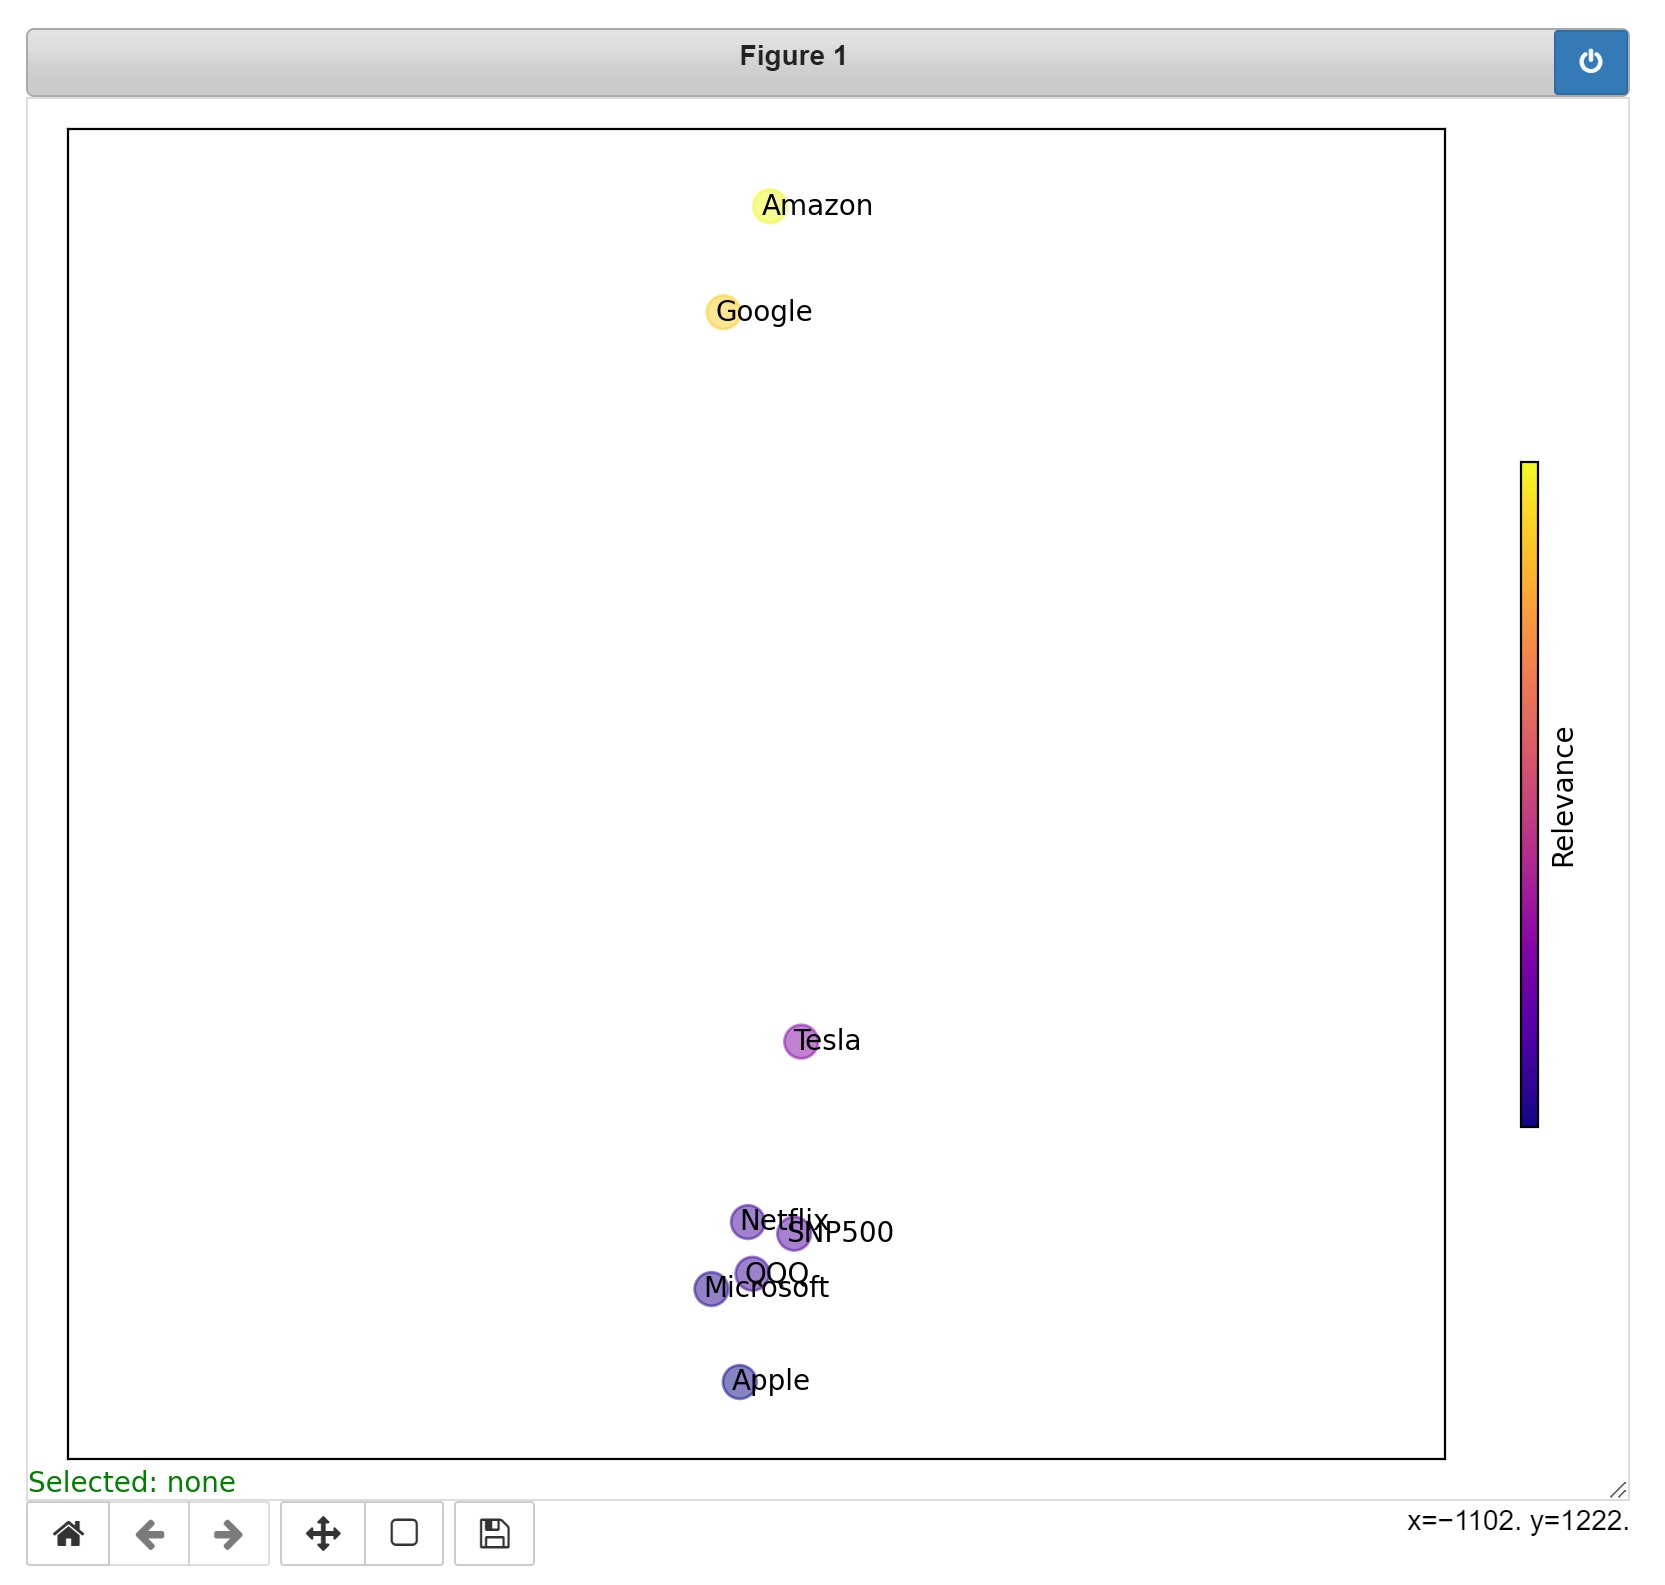

Looking at the above graph, we can see that, when looking at close values, S&P500 is less like Amazon and Google, and more like Netflix, Apple, and Microsoft. This information is important because, we can see exactly which stocks are more like the S&P500 and which stocks seem to be the outliers. The more outliers, the more skewed the S&P500 will become.

## Weights

In [ ]:
import plotly.express as px
import pandas as pd

ModuleNotFoundError: No module named 'plotly'

In [ ]:
weights = pd.read_csv('SPX_Weights.csv')
fig = px.treemap(weights, path=[px.Constant("SPY"), 'Symbol'], values = 'Weight')
fig.show()

This treemap helps us visualize the weights of all of the stocks in the S&P 500 to determine which influence its value the most. We can see that the top contributers to the S&P 500 are APPL (Apple) and MSFT (Microsoft), which we also saw in the clustering, as well as AMZN (Amazon), but less so, which we see in the clustering results to a greater degree. NFLX (Netflix) was the only strange result, since it was found to have a heavier weight in the S&P 500 through clustering but not in the treemap. (There was no data on QQQ (Nasdaq) weights since this is a different fund).

The weights can tell us which stocks will be best represented by the S&P 500, and we would expect these to be better predicted by the S&P stock than other stocks may be. We can further explore the weighted relationship between the individual stocks and the S&P 500 by determining the percent change in stock price for given intervals, such as one trading day to the next, or the market cap, which can be calculated from the outstanding shares and closing price for a given interval, but this data was not available.

# Conclusion

To determine if one is able to beat the market through technical analysis, there are a number of other research questions we need to first ask. Among those, the most important being which components of this technical analysis allow us to predict future behavior of stocks in order to manipulate them to our advantage? One of these factors is Moving Average (MA). As explained above, a moving average gives us information about the short or long term behavior of a stock using its past datapoints. Another factor being a stocks impact on other stocks of smaller size or market share. Its possible that we are able to use information gathered from these factors in order to determine what will change about a stocks behavior in the future. In this report, we used different types of signals (short term, long term, etc.) as well as different types of clusters (high, low, etc.) in order to answer our overarching research question of whether or not its possible to beat the market.

Visualizing the comparison of moving averages in the short and the long term, as well as differentiating between 30 minute and 4 hour interval data gives us valuable information about what will change about a stocks current value. For example, when analying short term data (comparing MA10 to MA50), when the MA10 line crosses the MA50 line, we know this is an indicator that the overall value of a stock will most probably rise. Similarly, when analyzing the long term data (comparing MA50 to MA200), when the MA50 line crosses the MA200 line, we know this is an indicator that the overall value of a stock will most probably rise as well. Conversely, when the latter crosses the former, we know this is an indicator that the overall value of the same stock will most probably drop. Knowing this, we ask, is a long term or a short term investment more impactful for a buyer? Answering this we take a look at the graphs analyzed above. We can see from the difference between 30 minute and 4 hour interval data that there are sometimes false signals, or instances where each of the MA lines cross each other too frequently to make a decision from. Because of this, it is almost always more fruitful to invest in the long term to ensure that you are not making buying or selling decisions based upon a Type I or Type II error.

To visualize which countries are more powerful in influencing the S&P 500, we tried to use clustering for the four attributes we have been analyzing: Open, Close, High, and Low prices. While the different clustering didn't give us very different results, we can determine that the lack of variation between these four attributes means that any or all of them can help us in our predictions. MDS analysis and the treemap helped us visualize the relative impact of each of the key stocks we have been analyzing on the S&P 500, and the treemap went even further to show us how much larger the weight of the few top stocks is compared to the rest of 500 stocks. As such, we can expect that since APPL and MSFT have the largest weight in the S&P 500 and are most powerful in influencing it, they can also be best predicted by the S&P 500.